## Problem Statement:

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year.

Dependent variable - No need to create any new variable, as the 'Default' variable is already provided in the dataset, which can be considered as the dependent variable.

Test Train Split - Split the data into train and test datasets in the ratio of 67:33 and use a random state of 42 (random_state=42). Model building is to be done on the train dataset and model validation is to be done on the test dataset.

### Dataset: Credit Risk Dataset

### Data Dictionary: Data Dictionary

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
!pip install imblearn

### Importing the dataset

In [3]:
Businesses = pd.read_excel("CompData-1.xlsx")

In [4]:
Businesses.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [5]:
for column_name in Businesses.columns:
    print(column_name)

Co_Code
Co_Name
_Operating_Expense_Rate
_Research_and_development_expense_rate
_Cash_flow_rate
_Interest_bearing_debt_interest_rate
_Tax_rate_A
_Cash_Flow_Per_Share
_Per_Share_Net_profit_before_tax_Yuan_
_Realized_Sales_Gross_Profit_Growth_Rate
_Operating_Profit_Growth_Rate
_Continuous_Net_Profit_Growth_Rate
_Total_Asset_Growth_Rate
_Net_Value_Growth_Rate
_Total_Asset_Return_Growth_Rate_Ratio
_Cash_Reinvestment_perc
_Current_Ratio
_Quick_Ratio
_Interest_Expense_Ratio
_Total_debt_to_Total_net_worth
_Long_term_fund_suitability_ratio_A
_Net_profit_before_tax_to_Paid_in_capital
_Total_Asset_Turnover
_Accounts_Receivable_Turnover
_Average_Collection_Days
_Inventory_Turnover_Rate_times
_Fixed_Assets_Turnover_Frequency
_Net_Worth_Turnover_Rate_times
_Operating_profit_per_person
_Allocation_rate_per_person
_Quick_Assets_to_Total_Assets
_Cash_to_Total_Assets
_Quick_Assets_to_Current_Liability
_Cash_to_Current_Liability
_Operating_Funds_to_Liability
_Inventory_to_Working_Capital
_Inventory_to_Cu

### Fixing messy column names(Containing extra _) for ease of use

In [6]:
Businesses.columns = Businesses.columns.str.strip('_')
print(Businesses.columns)

Index(['Co_Code', 'Co_Name', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate', 'Tax_rate_A',
       'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate',
       'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc',
       'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio',
       'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A',
       'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover',
       'Accounts_Receivable_Turnover', 'Average_Collection_Days',
       'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency',
       'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person',
       'Allocation_rate_per_person', 'Quick_Assets_to_Total_A

In [7]:
for column_name in Businesses.columns:
    print(column_name)

Co_Code
Co_Name
Operating_Expense_Rate
Research_and_development_expense_rate
Cash_flow_rate
Interest_bearing_debt_interest_rate
Tax_rate_A
Cash_Flow_Per_Share
Per_Share_Net_profit_before_tax_Yuan
Realized_Sales_Gross_Profit_Growth_Rate
Operating_Profit_Growth_Rate
Continuous_Net_Profit_Growth_Rate
Total_Asset_Growth_Rate
Net_Value_Growth_Rate
Total_Asset_Return_Growth_Rate_Ratio
Cash_Reinvestment_perc
Current_Ratio
Quick_Ratio
Interest_Expense_Ratio
Total_debt_to_Total_net_worth
Long_term_fund_suitability_ratio_A
Net_profit_before_tax_to_Paid_in_capital
Total_Asset_Turnover
Accounts_Receivable_Turnover
Average_Collection_Days
Inventory_Turnover_Rate_times
Fixed_Assets_Turnover_Frequency
Net_Worth_Turnover_Rate_times
Operating_profit_per_person
Allocation_rate_per_person
Quick_Assets_to_Total_Assets
Cash_to_Total_Assets
Quick_Assets_to_Current_Liability
Cash_to_Current_Liability
Operating_Funds_to_Liability
Inventory_to_Working_Capital
Inventory_to_Current_Liability
Long_term_Liability_

In [8]:
Businesses.head()

Co_Code          Co_Name  Operating_Expense_Rate  \
0    16974      Hind.Cables            8.820000e+09   
1    21214  Tata Tele. Mah.            9.380000e+09   
2    14852     ABG Shipyard            3.800000e+09   
3     2439              GTL            6.440000e+09   
4    23505  Bharati Defence            3.680000e+09   

   Research_and_development_expense_rate  Cash_flow_rate  \
0                           0.000000e+00        0.462045   
1                           4.230000e+09        0.460116   
2                           8.150000e+08        0.449893   
3                           0.000000e+00        0.462731   
4                           0.000000e+00        0.463117   

   Interest_bearing_debt_interest_rate  Tax_rate_A  Cash_Flow_Per_Share  \
0                             0.000352    0.001417             0.322558   
1                             0.000716    0.000000             0.315520   
2                             0.000496    0.000000             0.299851   
3                             0.000592    0.009313             0.319834   
4                             0.000782    0.400243             0.325104   

   Per_Share_Net_profit_before_tax_Yuan  \
0                              0.194472   
1                              0.161633   
2                              0.172554   
3                              0.174738   
4                              0.176546   

   Realized_Sales_Gross_Profit_Growth_Rate  ...  Cash_Flow_to_Equity  \
0                                 0.022074  ...             0.310901   
1                                 0.021902  ...             0.314572   
2                                 0.022186  ...             0.314777   
3                                 0.027638  ...             0.316974   
4                                 0.022072  ...             0.317729   

   Current_Liability_to_Current_Assets  Liability_Assets_Flag  \
0                             0.034913                      0   
1                             0.041653                      0   
2                             0.033560                      0   
3                             0.016527                      0   
4                             0.034497                      0   

   Total_assets_to_GNP_price  No_credit_Interval  \
0                   0.028801            0.620927   
1                   0.006191            0.622513   
2                   0.001095            0.623749   
3                   0.003749            0.622963   
4                   0.006595            0.624419   

   Degree_of_Financial_Leverage_DFL  \
0                          0.026930   
1                          0.026297   
2                          0.027276   
3                          0.026988   
4                          0.027498   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Net_Income_Flag  \
0                                          0.565744                1   
1                                          0.560741                1   
2                                          0.566744                1   
3                                          0.565950                1   
4                                          0.567177                1   

   Equity_to_Liability  Default  
0             0.015338        0  
1             0.029445        1  
2             0.041718        0  
3             0.026956        0  
4             0.019900        0  

[5 rows x 58 columns]

In [9]:
Businesses.tail()

Co_Code           Co_Name  Operating_Expense_Rate  \
2053     2743  Kothari Ferment.            3.021580e-04   
2054    21216    Firstobj.Tech.            1.371450e-04   
2055      142  Diamines & Chem.            2.114990e-04   
2056    18014       IL&FS Engg.            3.750000e+09   
2057    43229      Channel Nine            2.981110e-04   

      Research_and_development_expense_rate  Cash_flow_rate  \
2053                           6.490000e+09        0.477066   
2054                           0.000000e+00        0.465211   
2055                           8.370000e+09        0.480248   
2056                           0.000000e+00        0.474670   
2057                           0.000000e+00        0.467203   

      Interest_bearing_debt_interest_rate  Tax_rate_A  Cash_Flow_Per_Share  \
2053                             0.000000    0.183014             0.322063   
2054                             0.000658    0.000000             0.319764   
2055                             0.000502    0.000000             0.327828   
2056                             0.000578    0.306205             0.322027   
2057                             0.000826    0.000000             0.330021   

      Per_Share_Net_profit_before_tax_Yuan  \
2053                              0.192739   
2054                              0.169391   
2055                              0.155005   
2056                              0.173834   
2057                              0.180236   

      Realized_Sales_Gross_Profit_Growth_Rate  ...  Cash_Flow_to_Equity  \
2053                                 0.022127  ...             0.320387   
2054                                 0.022072  ...             0.312324   
2055                                 0.021861  ...             0.313122   
2056                                 0.022167  ...             0.315632   
2057                                 0.022418  ...             0.316734   

      Current_Liability_to_Current_Assets  Liability_Assets_Flag  \
2053                             0.004430                      0   
2054                             0.032284                      0   
2055                             0.040998                      0   
2056                             0.020275                      0   
2057                             0.031368                      0   

      Total_assets_to_GNP_price  No_credit_Interval  \
2053                   0.000420            0.624567   
2054                   0.000882            0.624008   
2055                   0.009579            0.623718   
2056                   0.004958            0.623443   
2057                   0.000186            0.623588   

      Degree_of_Financial_Leverage_DFL  \
2053                          0.026791   
2054                          0.024201   
2055                          0.026702   
2056                          0.026943   
2057                          0.026871   

      Interest_Coverage_Ratio_Interest_expense_to_EBIT  Net_Income_Flag  \
2053                                          0.565158                1   
2054                                          0.573670                1   
2055                                          0.564697                1   
2056                                          0.565792                1   
2057                                          0.565512                1   

      Equity_to_Liability  Default  
2053             0.171662        0  
2054             0.053740        0  
2055             0.054984        0  
2056             0.057553        0  
2057             0.020266        0  

[5 rows x 58 columns]

### First, let us check the number of rows (observations) and the number of columns (variables)

In [10]:
print('The number of rows (observations) is',Businesses.shape[0],'\n''The number of columns (variables) is',Businesses.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [11]:
Businesses.size

119364

### Checking data types of all columns

In [12]:
Businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan              2058 non-null   float64
 9   Realized_Sales_Gros

### Now, let us check the basic measures of descriptive statistics

In [13]:
Businesses.describe()

Co_Code  Operating_Expense_Rate  \
count   2058.000000            2.058000e+03   
mean   17572.113217            2.052389e+09   
std    21892.886518            3.252624e+09   
min        4.000000            1.000260e-04   
25%     3674.000000            1.578727e-04   
50%     6240.000000            3.330330e-04   
75%    24280.750000            4.110000e+09   
max    72493.000000            9.980000e+09   

       Research_and_development_expense_rate  Cash_flow_rate  \
count                           2.058000e+03     2058.000000   
mean                            1.208634e+09        0.465243   
std                             2.144568e+09        0.022663   
min                             0.000000e+00        0.000000   
25%                             0.000000e+00        0.460099   
50%                             1.994130e-04        0.463445   
75%                             1.550000e+09        0.468069   
max                             9.980000e+09        1.000000   

       Interest_bearing_debt_interest_rate   Tax_rate_A  Cash_Flow_Per_Share  \
count                         2.058000e+03  2058.000000          1891.000000   
mean                          1.113022e+07     0.114777             0.319986   
std                           9.042595e+07     0.152446             0.015300   
min                           0.000000e+00     0.000000             0.169449   
25%                           2.760280e-04     0.000000             0.314989   
50%                           4.540450e-04     0.037099             0.320648   
75%                           6.630660e-04     0.216191             0.325918   
max                           9.900000e+08     0.999696             0.462227   

       Per_Share_Net_profit_before_tax_Yuan  \
count                           2058.000000   
mean                               0.176967   
std                                0.030157   
min                                0.000000   
25%                                0.166604   
50%                                0.175642   
75%                                0.185885   
max                                0.792348   

       Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  \
count                              2058.000000                   2058.000000   
mean                                  0.022761                      0.848108   
std                                   0.021701                      0.004589   
min                                   0.004282                      0.736430   
25%                                   0.022058                      0.847974   
50%                                   0.022100                      0.848039   
75%                                   0.022152                      0.848115   
max                                   1.000000                      1.000000   

       ...  Cash_Flow_to_Equity  Current_Liability_to_Current_Assets  \
count  ...          2058.000000                          2044.000000   
mean   ...             0.314629                             0.039352   
std    ...             0.012780                             0.047978   
min    ...             0.000000                             0.000000   
25%    ...             0.312783                             0.021775   
50%    ...             0.314642                             0.032652   
75%    ...             0.316546                             0.043947   
max    ...             0.569231                             1.000000   

       Liability_Assets_Flag  Total_assets_to_GNP_price  No_credit_Interval  \
count            2058.000000               2.058000e+03         2058.000000   
mean                0.003401               2.779397e+07            0.623686   
std                 0.058236               4.717714e+08            0.011631   
min                 0.000000               0.000000e+00            0.408682   
25%                 0.000000               9.124052e-04            0.623327   
50%                 0.

### Check how many values have in Target Variable(Default) What does variable 'default' look like

In [14]:
Businesses['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [15]:
#Check Proporation of Target Variable(default)
220/(1838+220)

0.10689990281827016

In [16]:
display(Businesses['Default'].value_counts())

display(Businesses['Default'].value_counts(normalize = True))

0    1838
1     220
Name: Default, dtype: int64

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [17]:
Businesses['Default'].describe()

count    2058.000000
mean        0.106900
std         0.309061
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Default, dtype: float64

### 1: Outlier Treatment & Missing Value Treatment

### Missing Values check

In [18]:
Businesses.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan                  0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

In [19]:
Businesses.isna().sum()[Businesses.isna().sum()>0]

Cash_Flow_Per_Share                    167
Total_debt_to_Total_net_worth           21
Cash_to_Total_Assets                    96
Current_Liability_to_Current_Assets     14
dtype: int64

In [20]:
Businesses.size

119364

In [21]:
Businesses.isnull().sum().sum()

298

### Proportion of missing values

In [22]:
(298/119364)*100

0.249656512851446

* There are missing values in the dataset

### Drop the unuseful column.

In [23]:
Businesses.drop(['Co_Code', 'Co_Name'], axis=1, inplace = True)

In [24]:
Businesses.shape

(2058, 56)

### Check Outlier

### Splitting Dataset into Businesses_X and Businesses_Y(We do not apply outlier treatment to the target variable.)

In [25]:
Businesses_X = Businesses.drop('Default', axis = 1)
Businesses_Y = Businesses['Default']

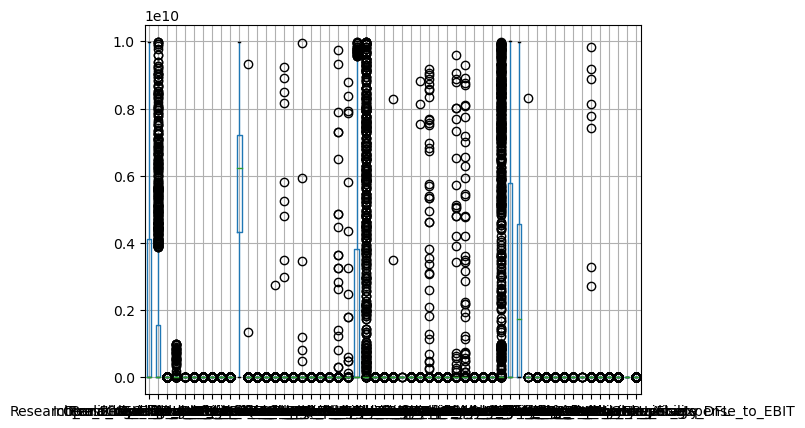

In [26]:
Businesses_X.boxplot();

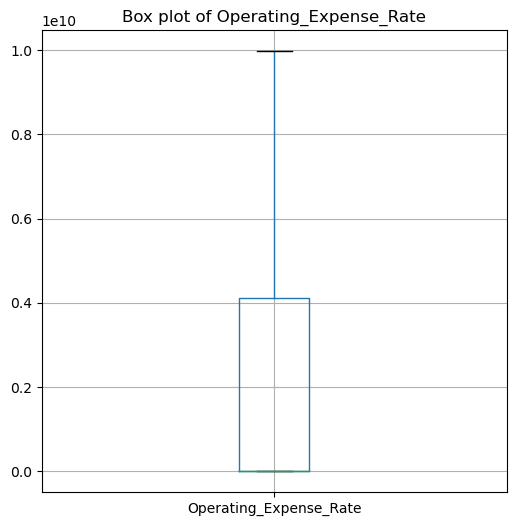

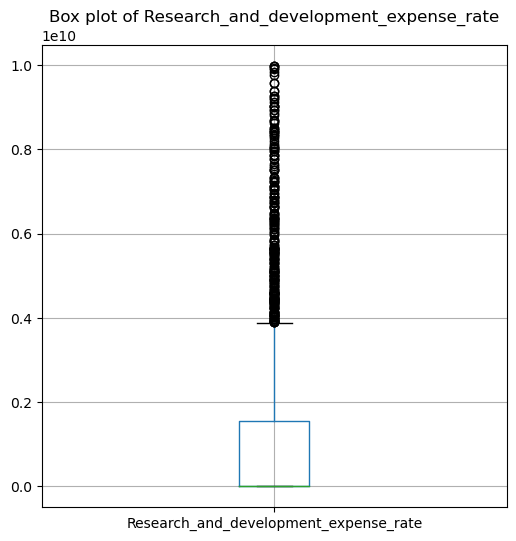

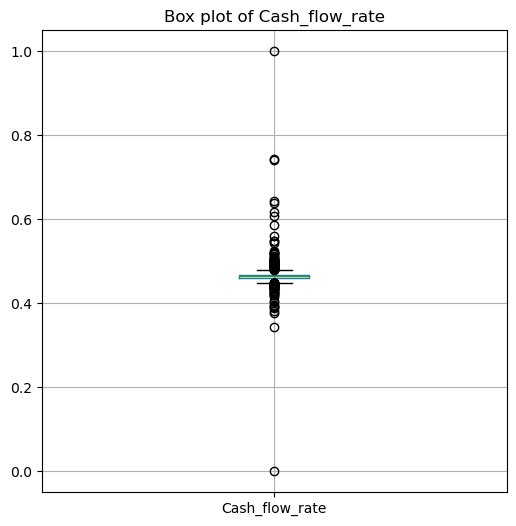

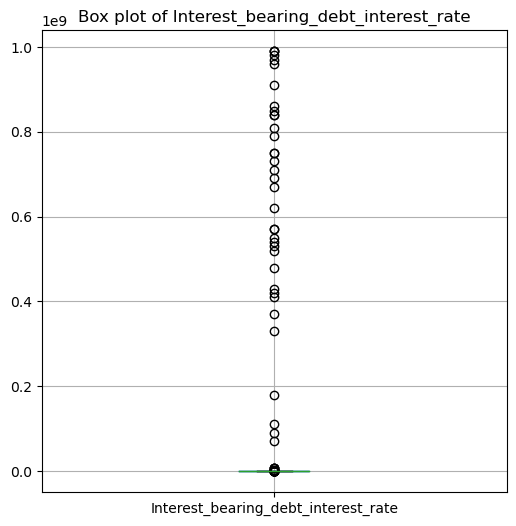

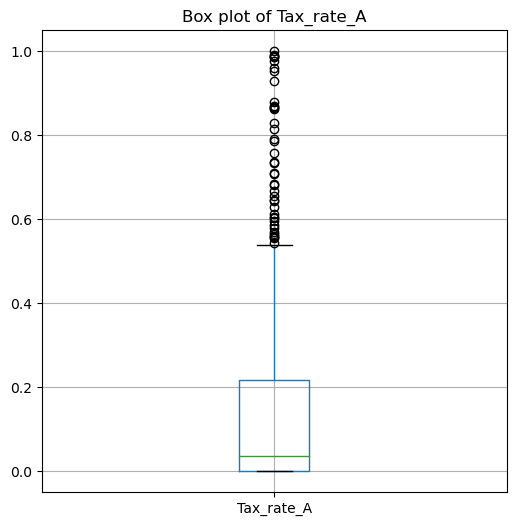

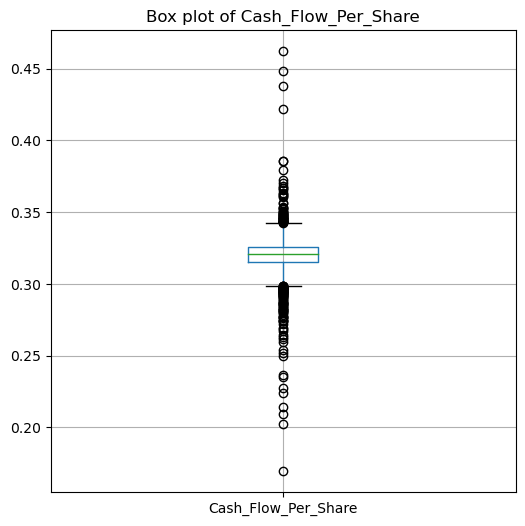

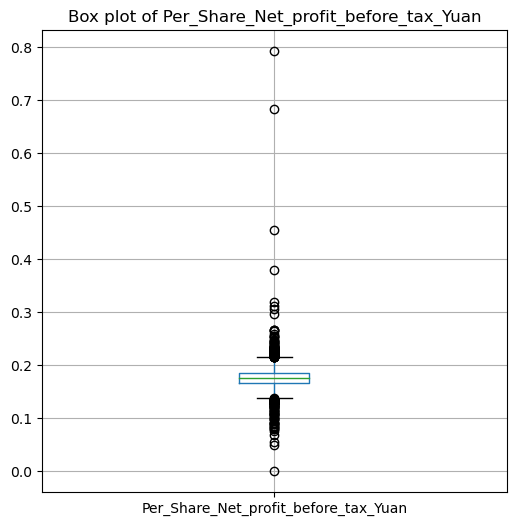

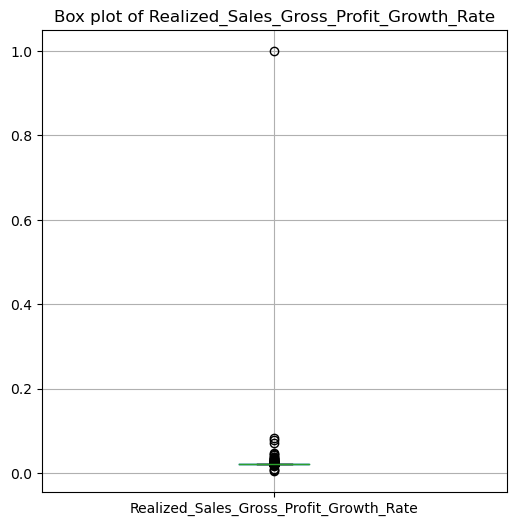

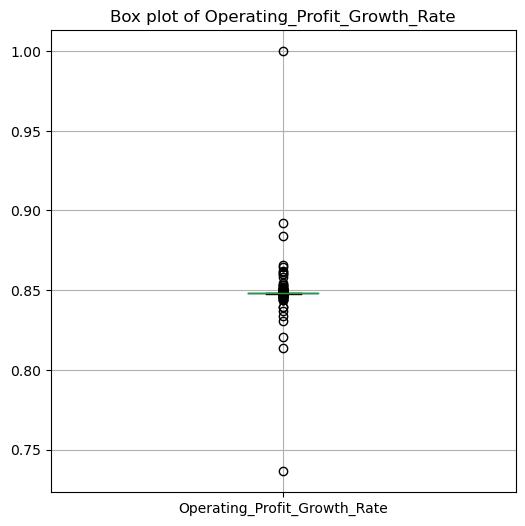

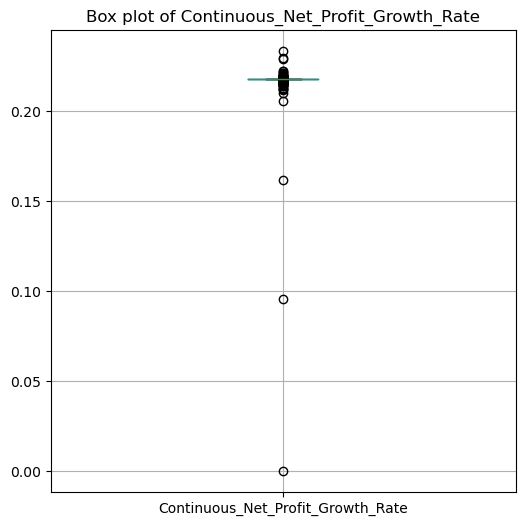

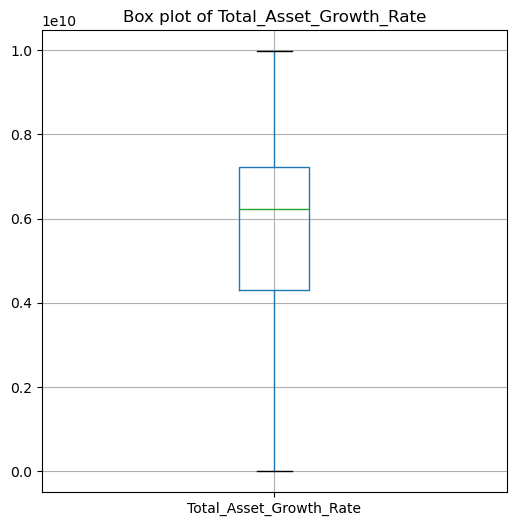

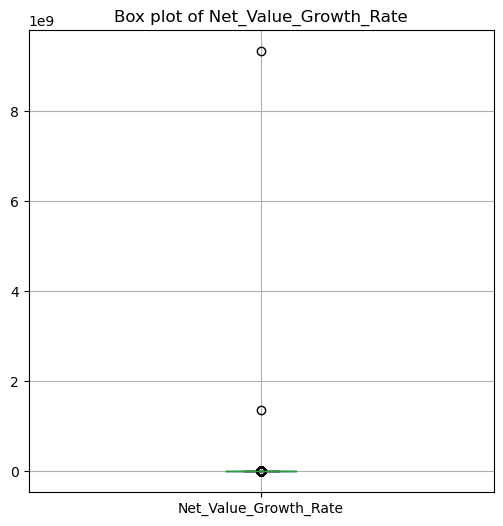

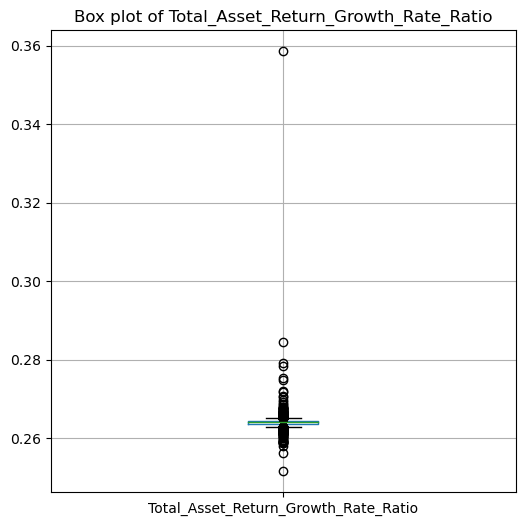

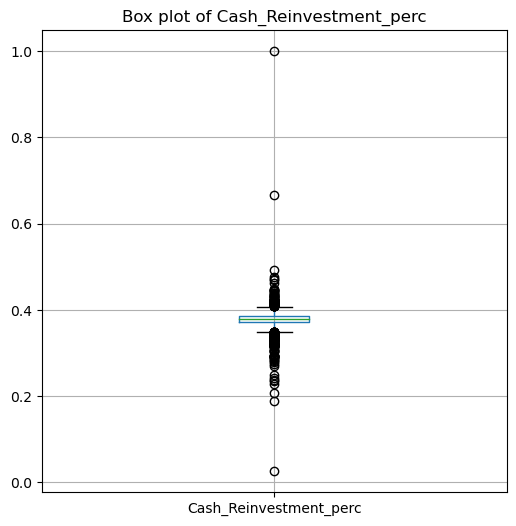

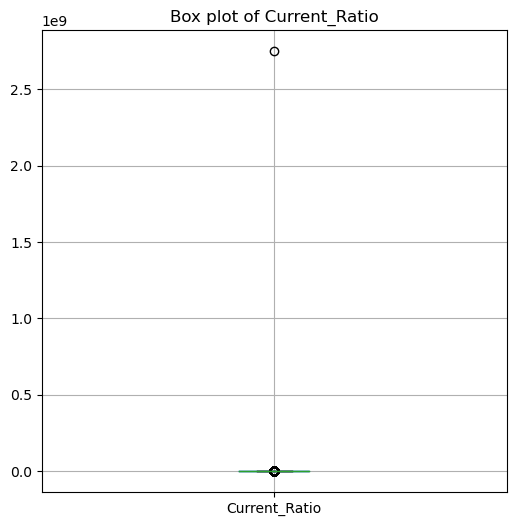

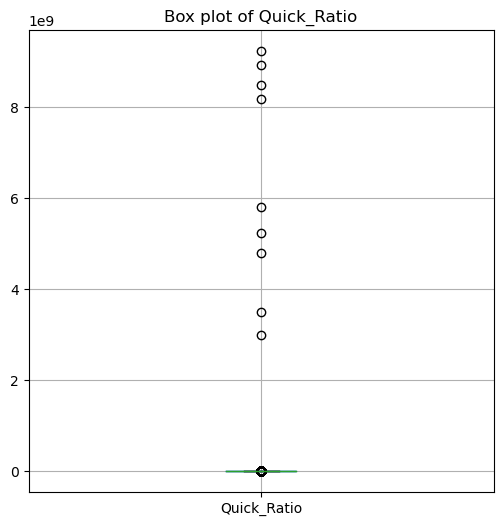

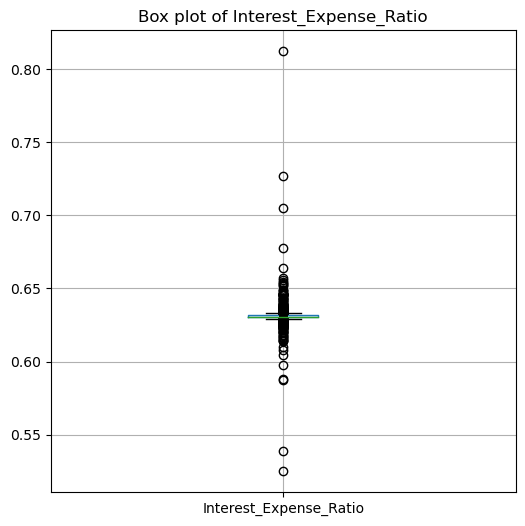

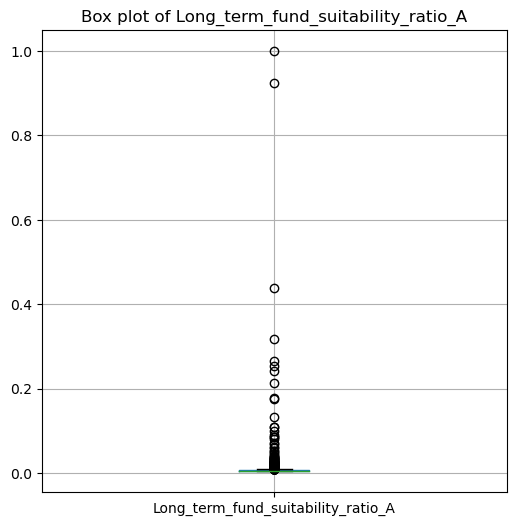

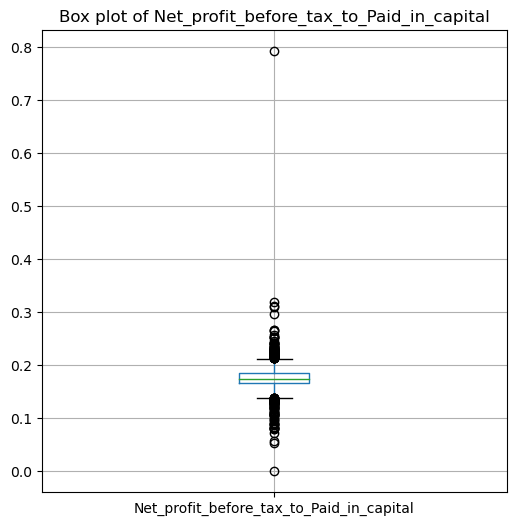

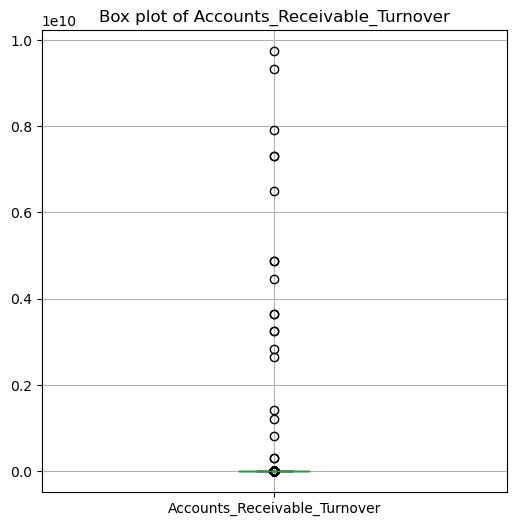

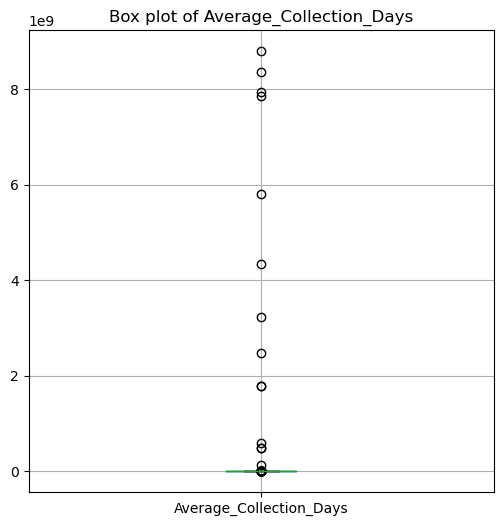

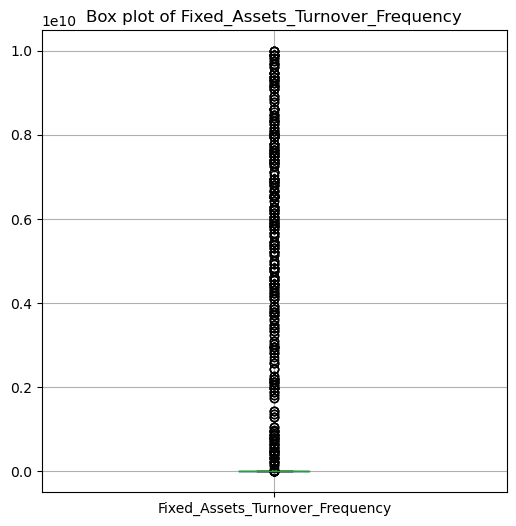

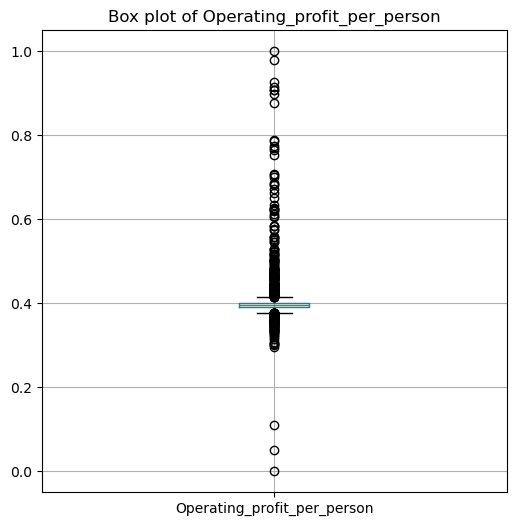

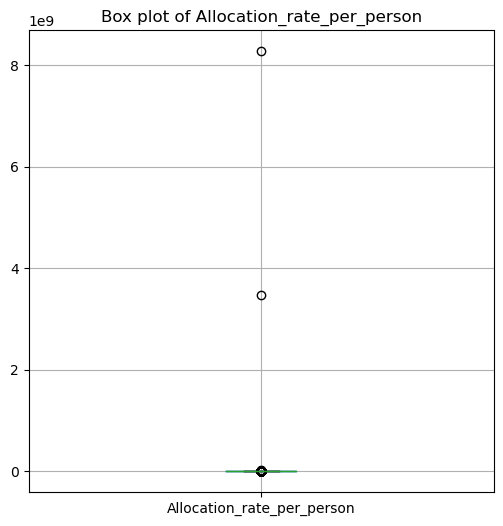

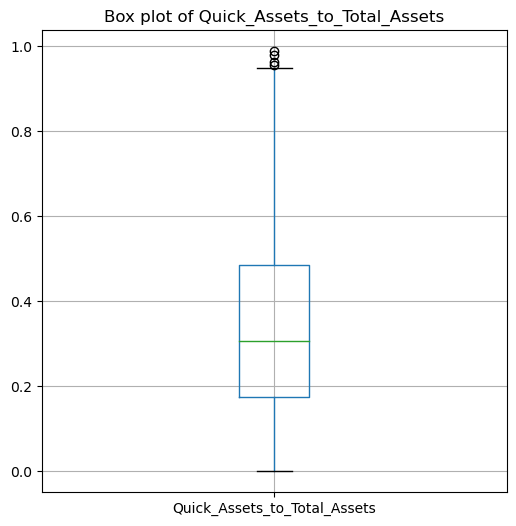

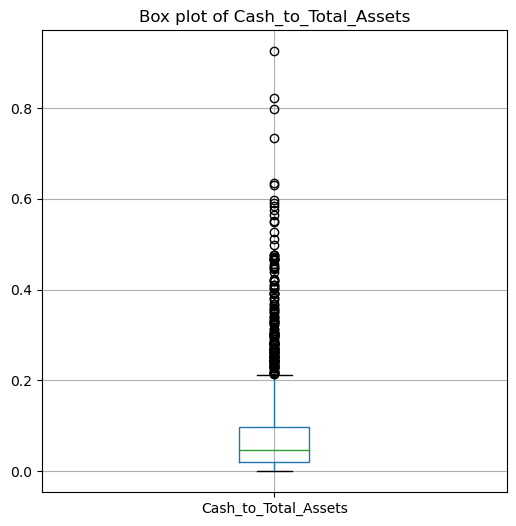

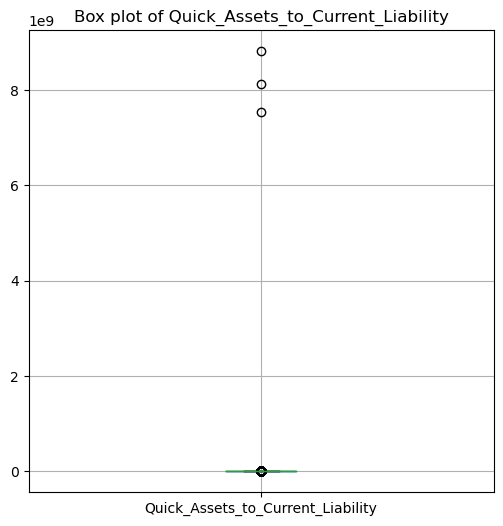

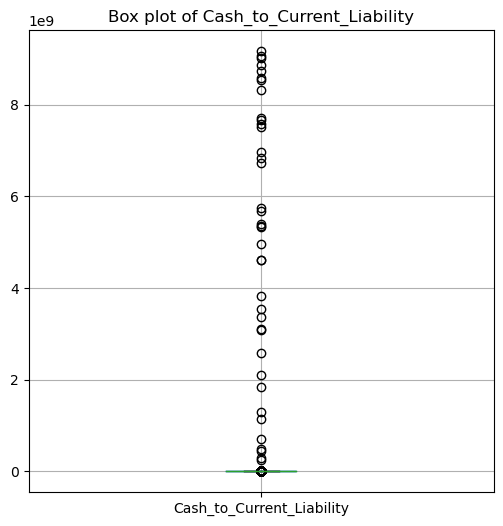

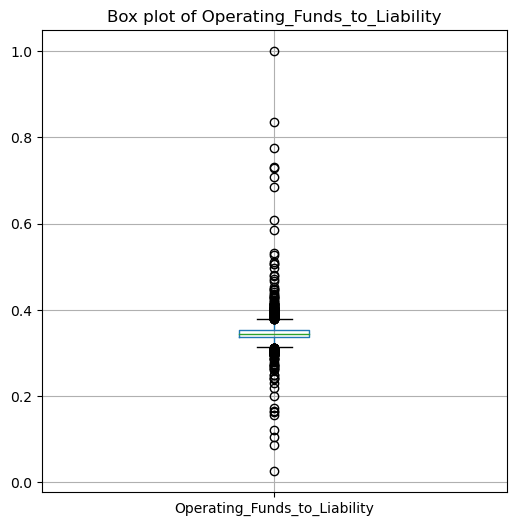

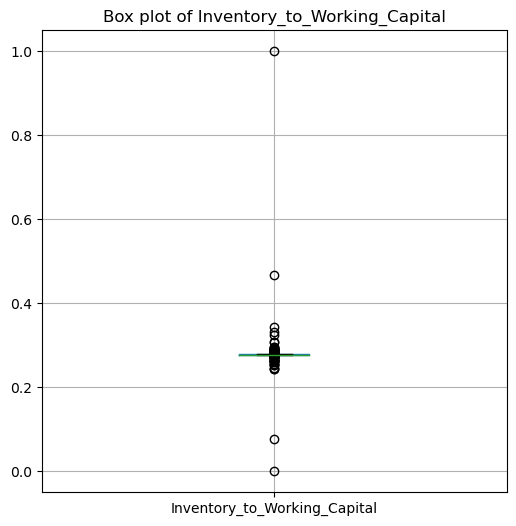

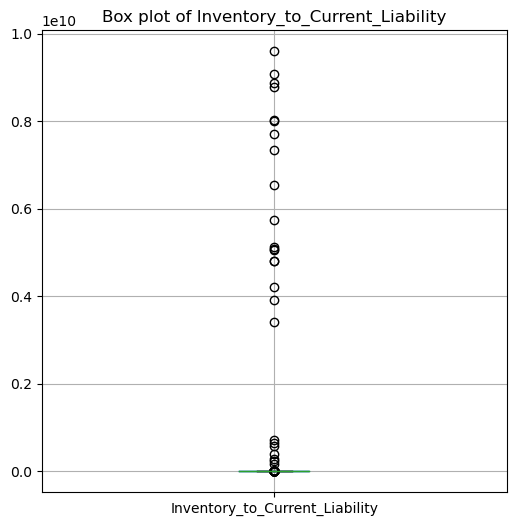

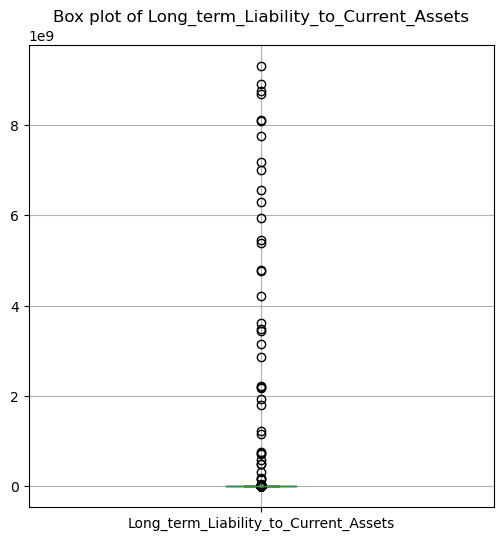

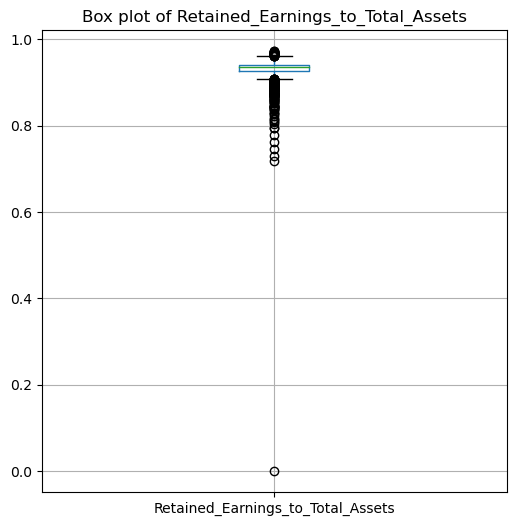

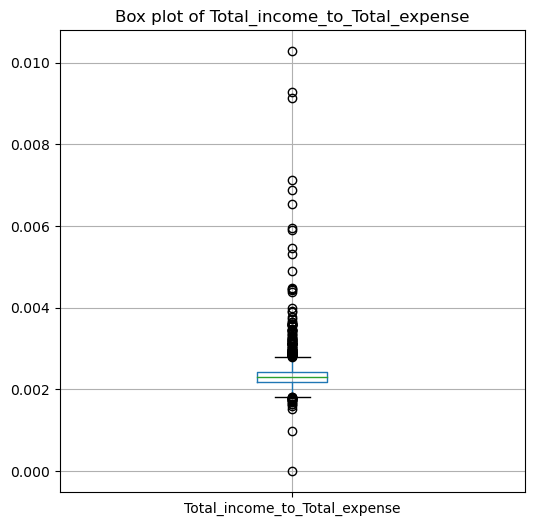

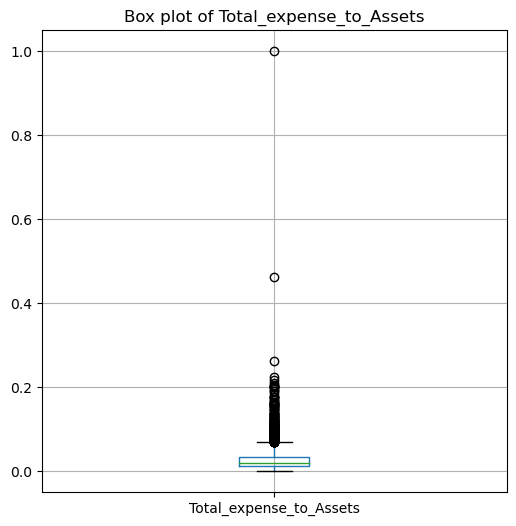

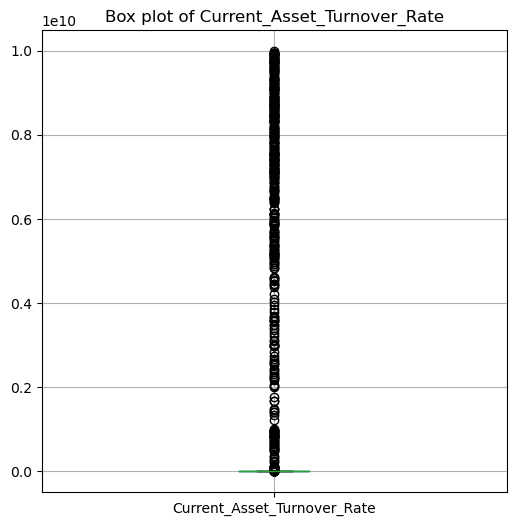

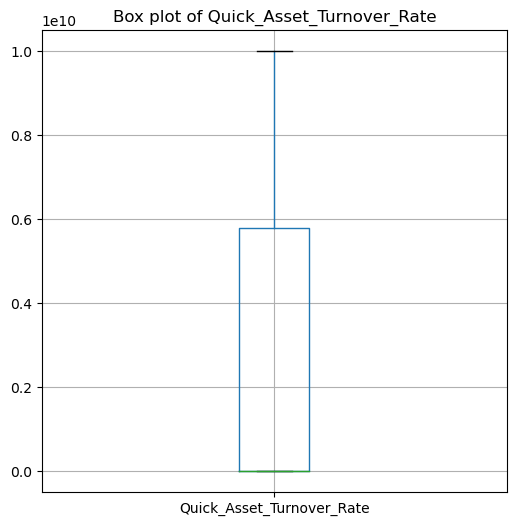

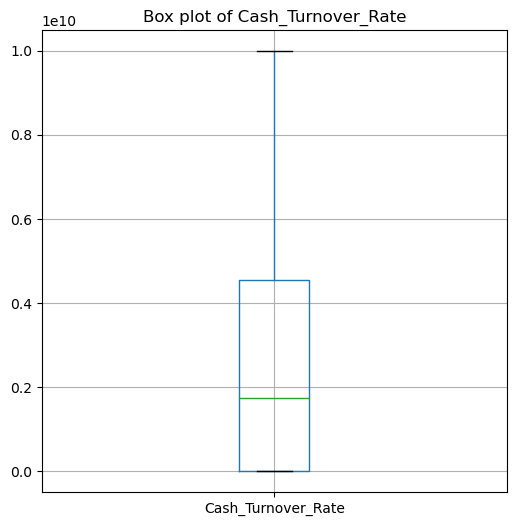

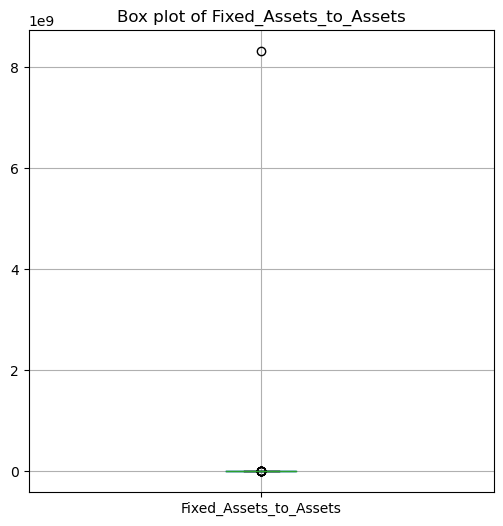

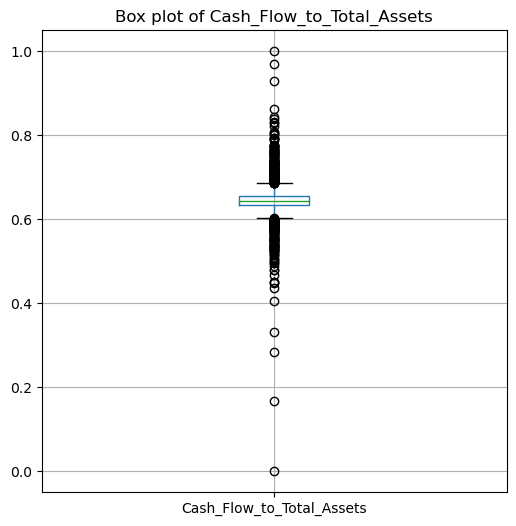

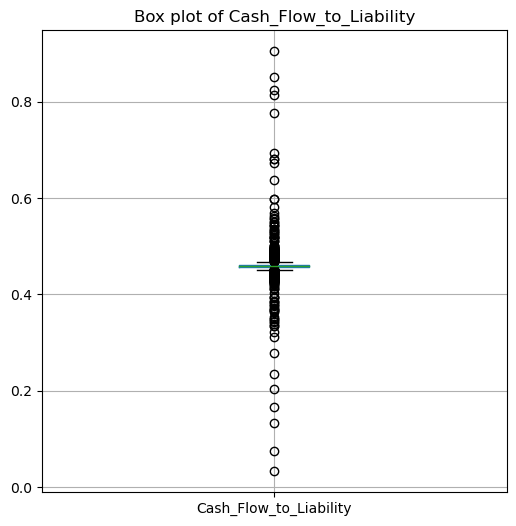

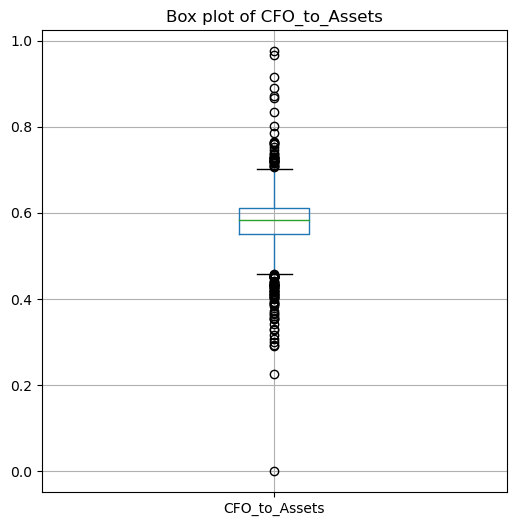

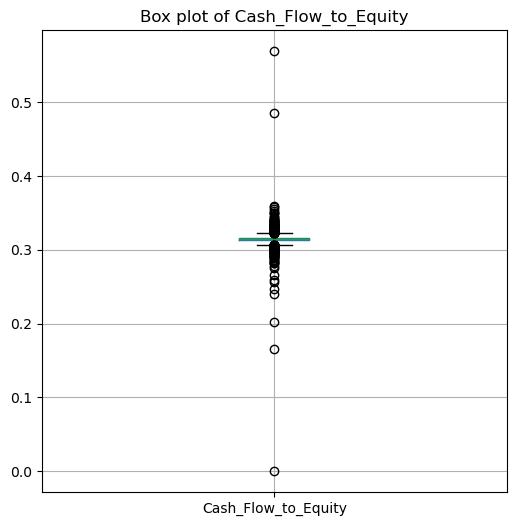

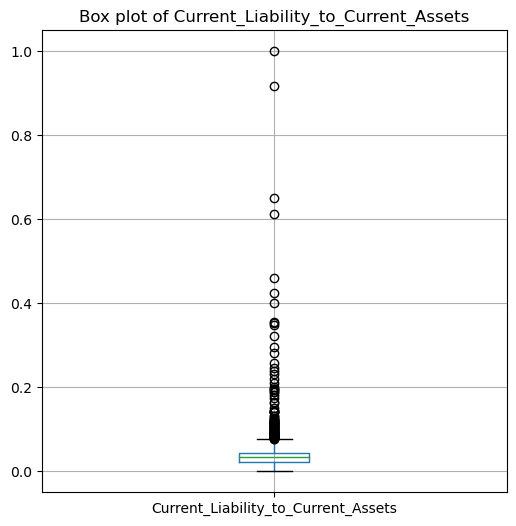

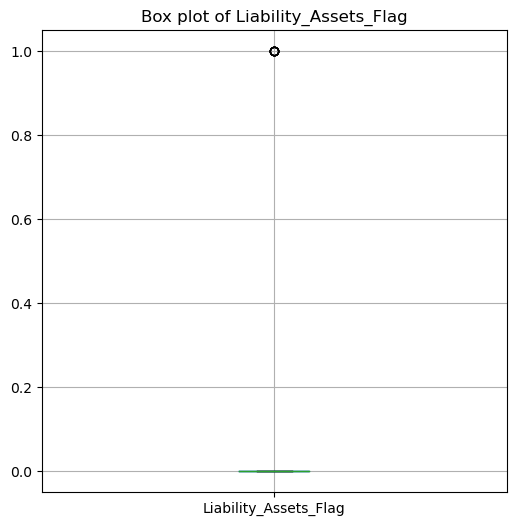

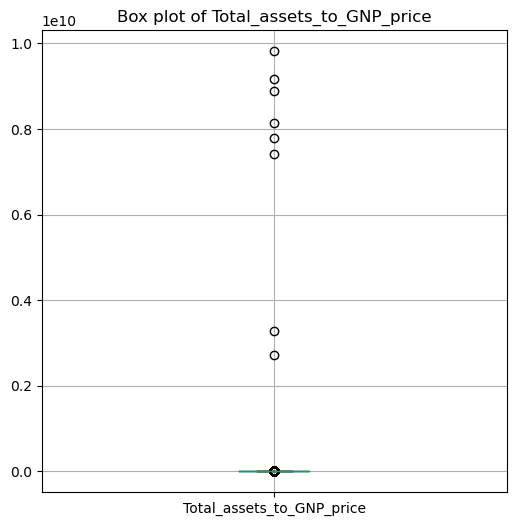

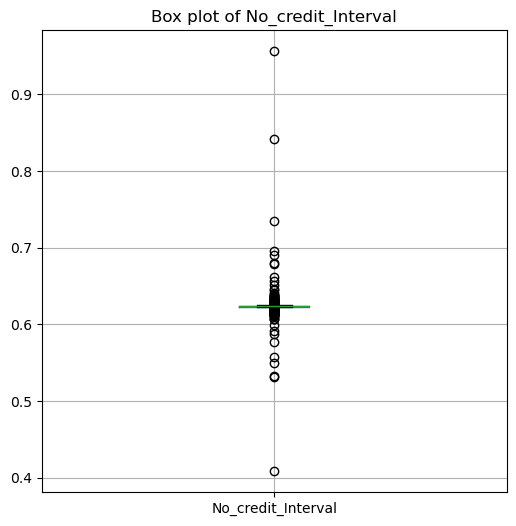

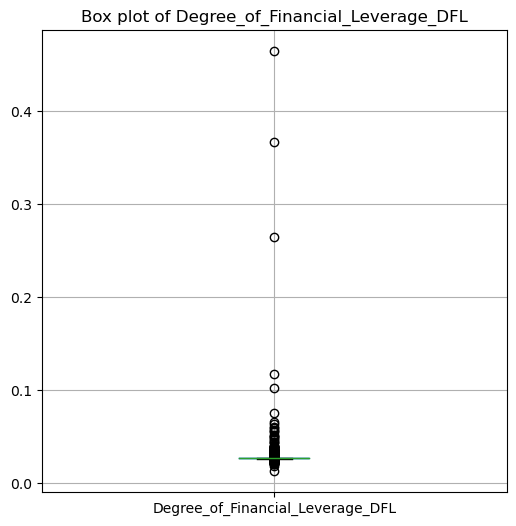

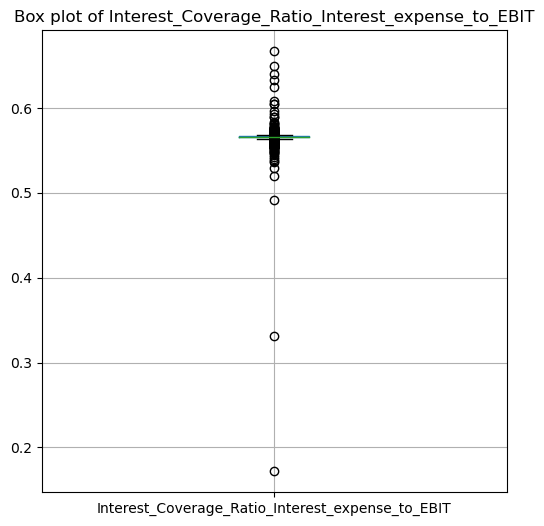

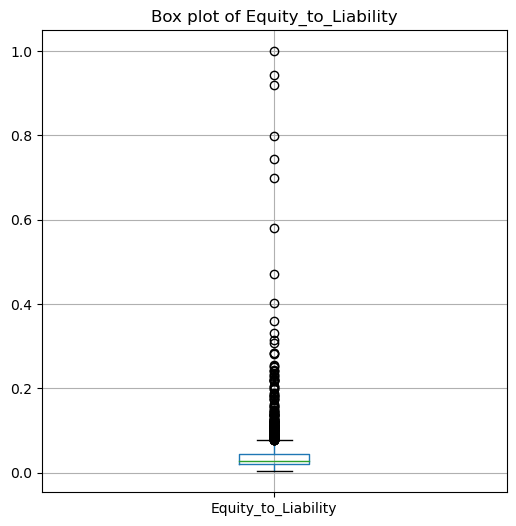

In [27]:
for column in Businesses_X.columns:
    plt.figure(figsize=(6, 6))  # Adjust figure size as needed
    Businesses_X.boxplot(column=[column])
    plt.title(f'Box plot of {column}')
    plt.show()

* There are outliers in the dataset, lets use capping method to treat them

### Let's check the number of outliers per column

In [28]:
Q1 = Businesses_X.quantile(0.25)
Q3 = Businesses_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [29]:
((Businesses_X > UL) | (Businesses_X < UL)).sum()

Operating_Expense_Rate                              2058
Research_and_development_expense_rate               2058
Cash_flow_rate                                      2058
Interest_bearing_debt_interest_rate                 2058
Tax_rate_A                                          2058
Cash_Flow_Per_Share                                 1891
Per_Share_Net_profit_before_tax_Yuan                2058
Realized_Sales_Gross_Profit_Growth_Rate             2058
Operating_Profit_Growth_Rate                        2058
Continuous_Net_Profit_Growth_Rate                   2058
Total_Asset_Growth_Rate                             2058
Net_Value_Growth_Rate                               2058
Total_Asset_Return_Growth_Rate_Ratio                2058
Cash_Reinvestment_perc                              2058
Current_Ratio                                       2058
Quick_Ratio                                         2058
Interest_Expense_Ratio                              2058
Total_debt_to_Total_net_worth  

In [30]:
((Businesses_X > UL) | (Businesses_X < LL)).sum().sum()

10864

### Outliers treatment using the Capping Method

In [31]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [32]:
for i in Businesses_X:
    Businesses_X[i]=treat_outlier(Businesses_X[i])

0.000111127 0.00015787275 4110000000.0 8971499999.999998 <built-in function min> <built-in function max>
0.0 0.0 1550000000.0 6235999999.999994 <built-in function min> <built-in function max>
0.45200791775 0.460099142 0.46806908049999996 0.48237647095 <built-in function min> <built-in function max>
0.0 0.000276028 0.000663066 0.0010774079999999998 <built-in function min> <built-in function max>
0.0 0.0 0.21619090975 0.3416236463499999 <built-in function min> <built-in function max>
nan nan nan nan <built-in function min> <built-in function max>
0.14042328805 0.166603901 0.185885366 0.21451758669999998 <built-in function min> <built-in function max>
0.0219479388 0.022058314000000002 0.022151999 0.022579723299999997 <built-in function min> <built-in function max>
0.84770057975 0.84797396475 0.848114747 0.8485231827 <built-in function min> <built-in function max>
0.21737961015 0.217574132 0.21761982075 0.21774071545 <built-in function min> <built-in function max>
0.0001133856 4315000000.0

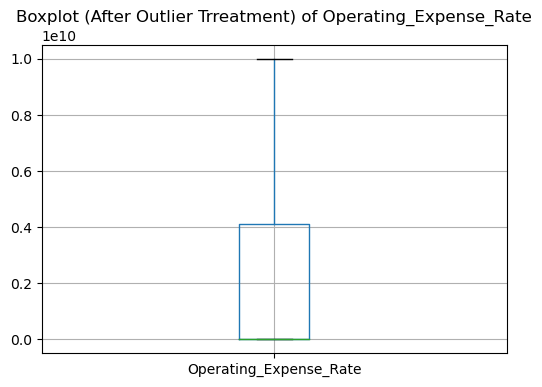

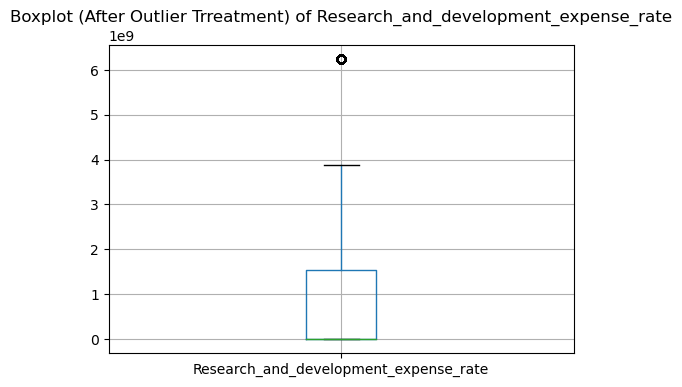

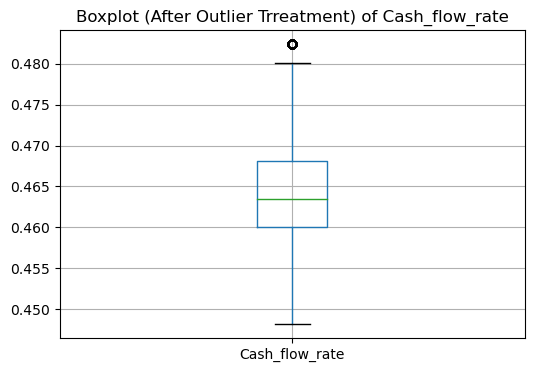

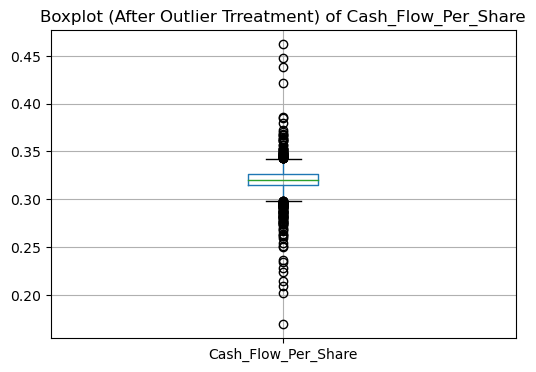

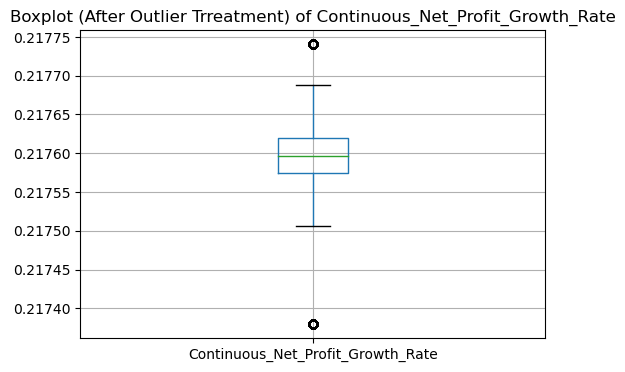

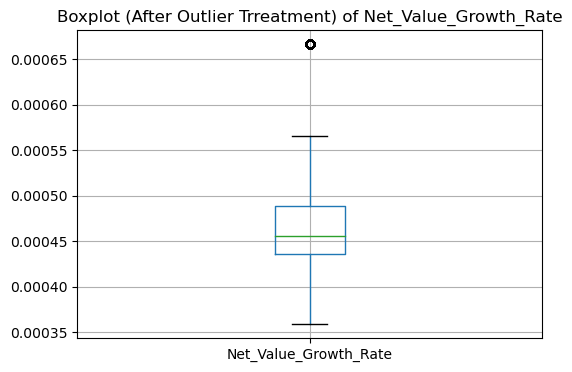

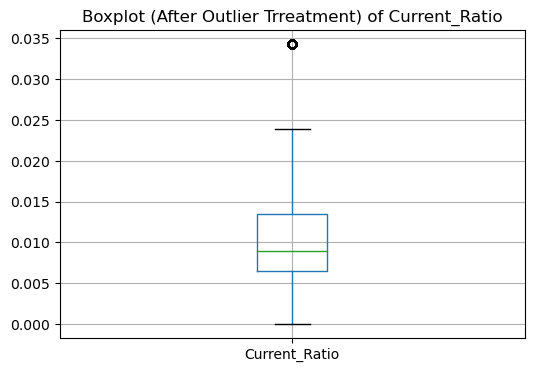

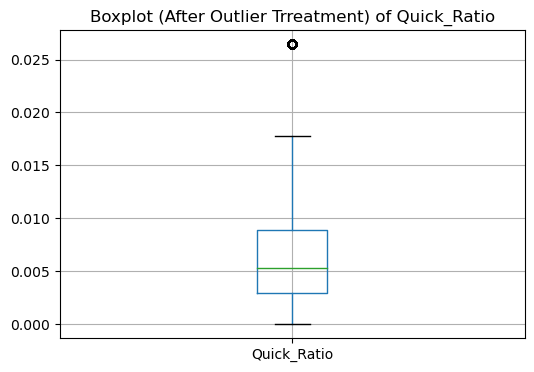

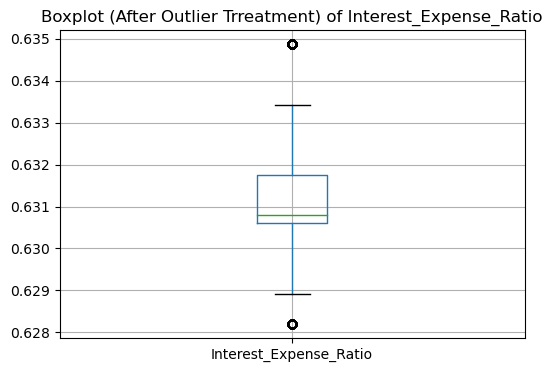

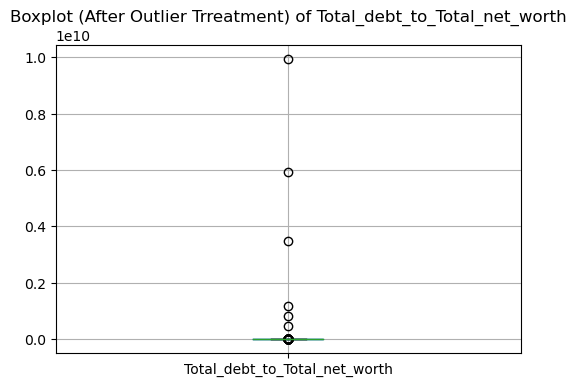

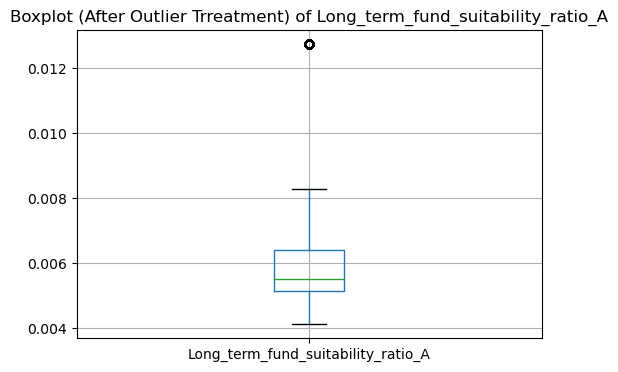

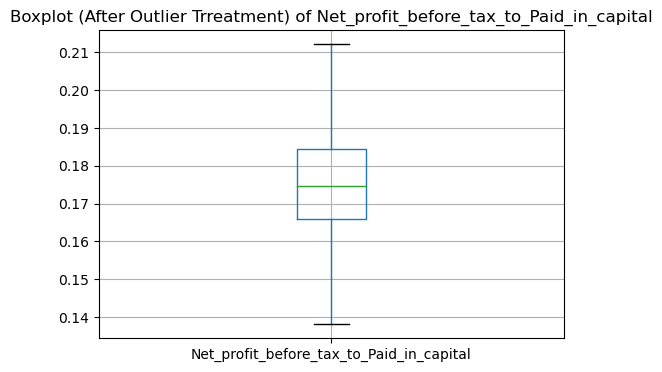

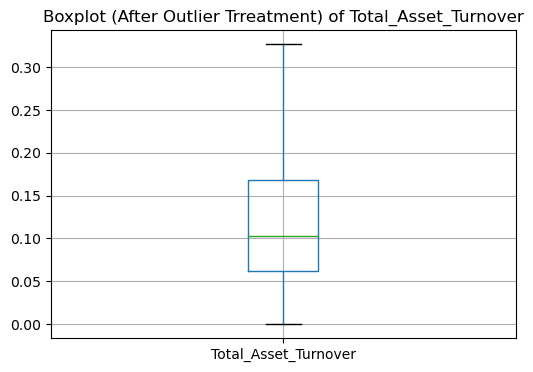

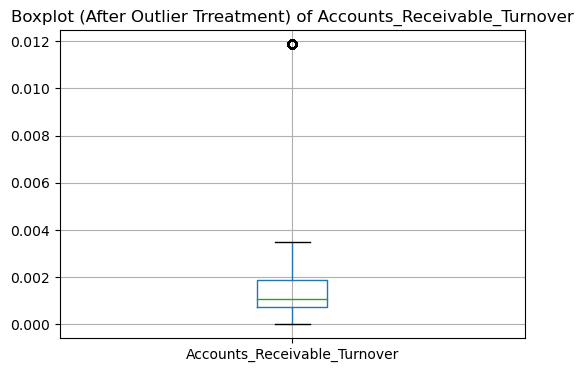

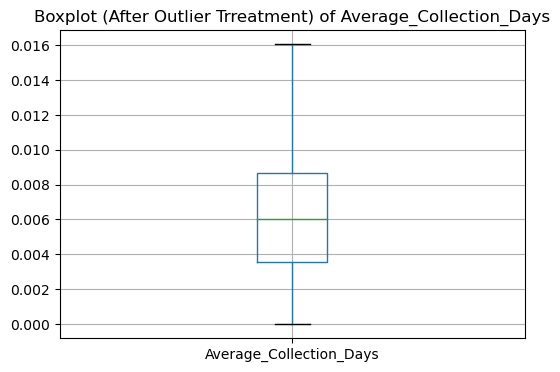

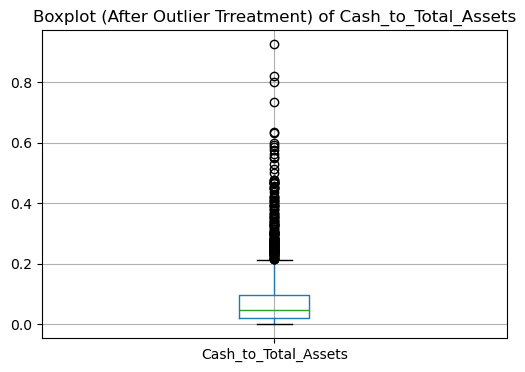

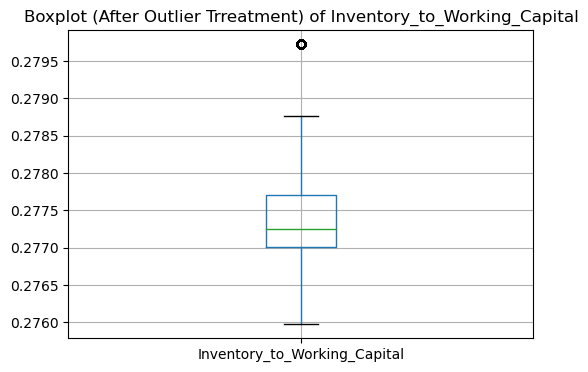

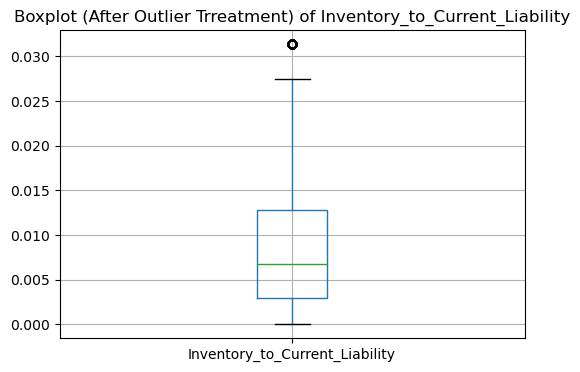

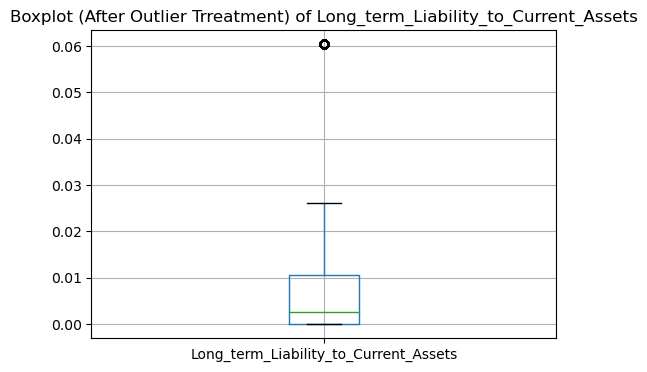

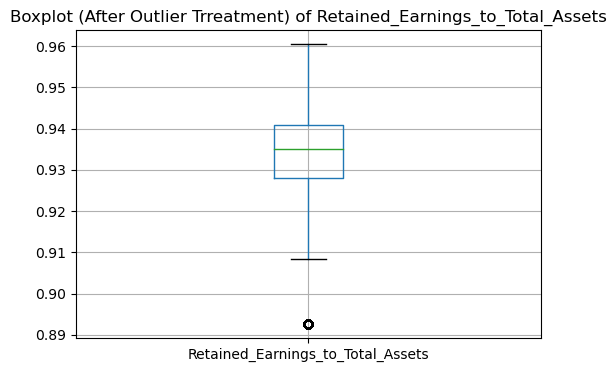

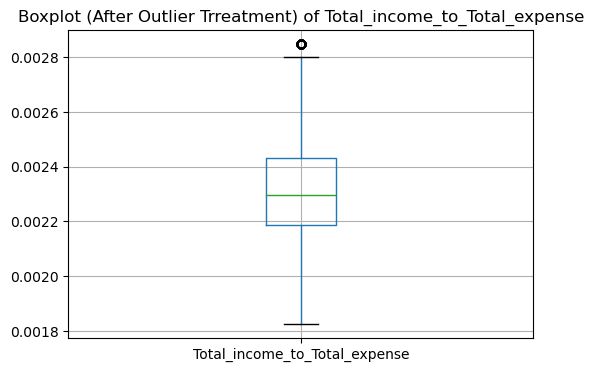

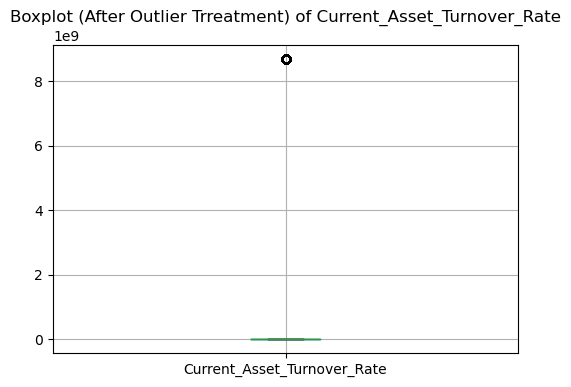

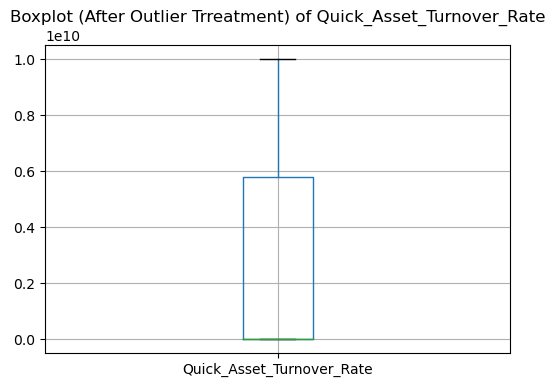

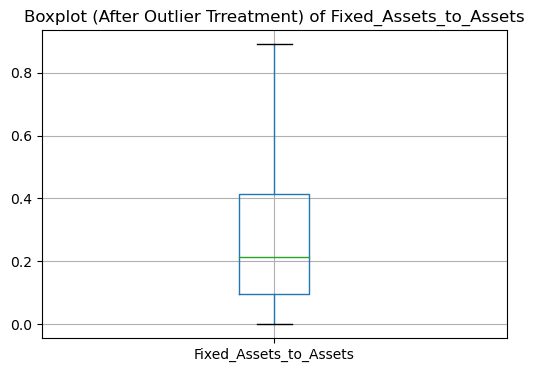

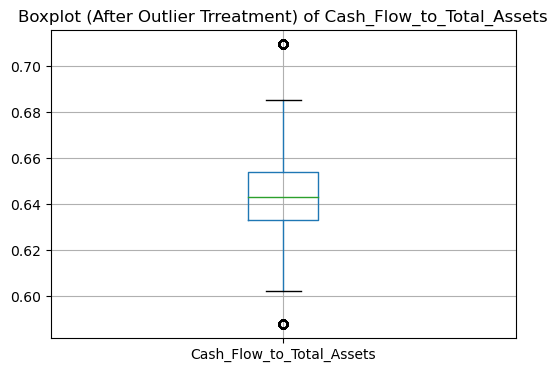

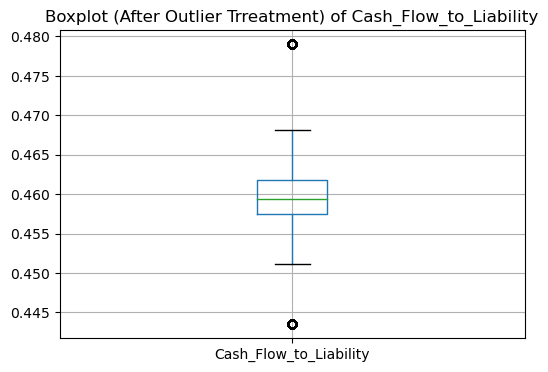

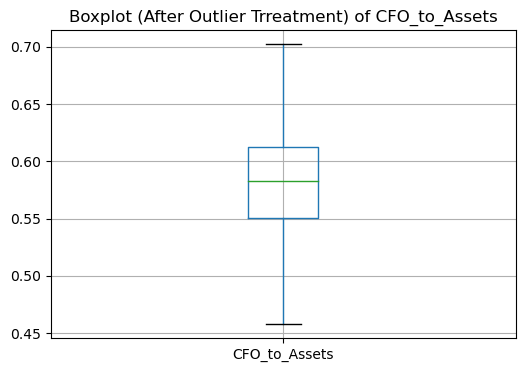

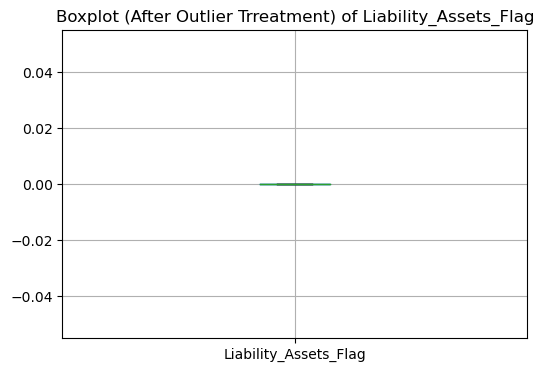

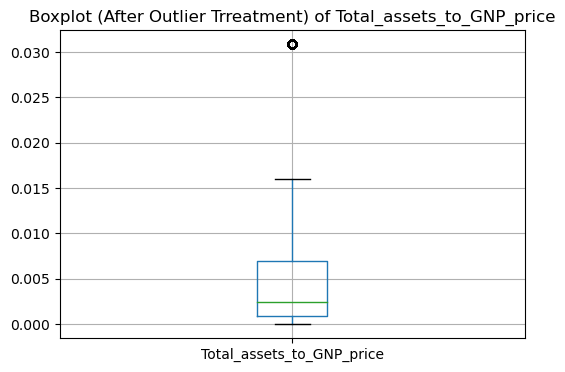

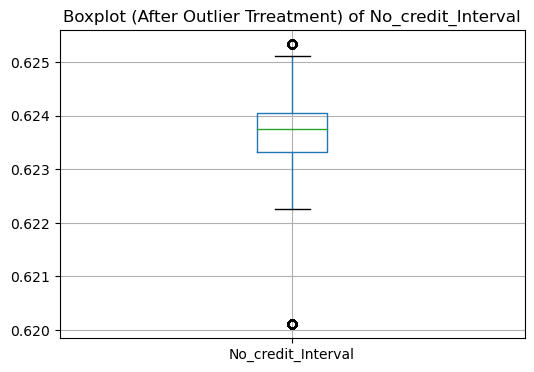

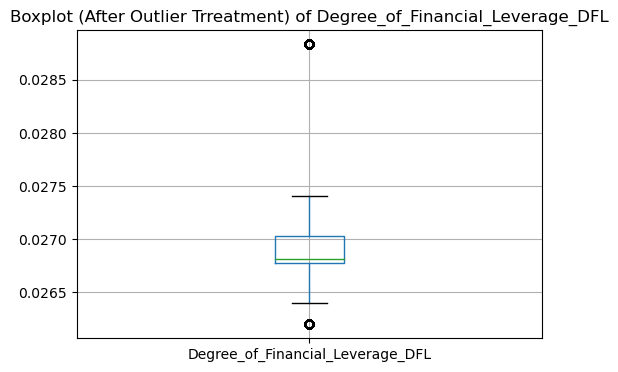

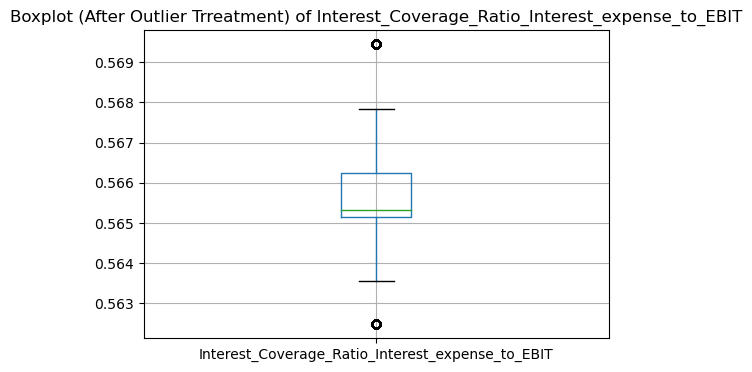

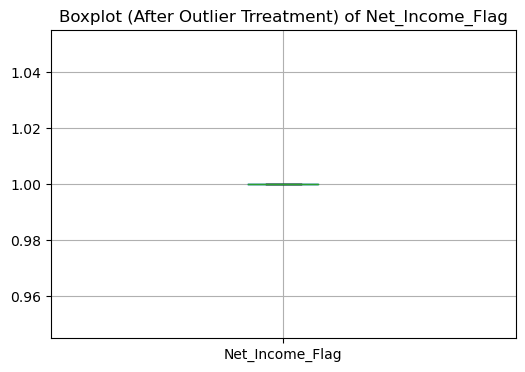

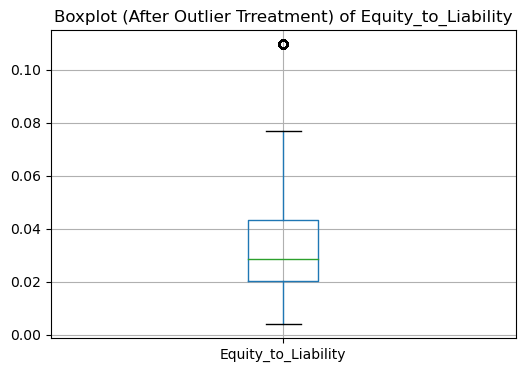

In [33]:
for column in Businesses_X.columns:
    plt.figure(figsize=(6, 4))  
    Businesses_X.boxplot(column=[column])
    plt.title(f'Boxplot (After Outlier Trreatment) of {column}')
    plt.show()

In [34]:
plt.clf()  # Clear the current figure
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title("Boxplot (After Outlier Treatment) for all Columns", fontsize=15)
Businesses_X.boxplot()
plt.show()

<Figure size 640x480 with 0 Axes>

### Scale the predictors

In [35]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(Businesses_X), columns = Businesses_X.columns)

In [36]:
# Concatinating the datasets as Stats Model will be used for model building

Businesses_sc=pd.concat([scaled_predictors,Businesses_Y],axis=1)

In [37]:
plt.clf();  # Clear the current figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot (After Scaling) for all Columns",fontsize=15)

Businesses_sc.boxplot();
plt.show();

<Figure size 640x480 with 0 Axes>

In [38]:
Businesses_sc.columns

Index(['Operating_Expense_Rate', 'Research_and_development_expense_rate',
       'Cash_flow_rate', 'Interest_bearing_debt_interest_rate', 'Tax_rate_A',
       'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate',
       'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc',
       'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio',
       'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A',
       'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover',
       'Accounts_Receivable_Turnover', 'Average_Collection_Days',
       'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency',
       'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person',
       'Allocation_rate_per_person', 'Quick_Assets_to_Total_Assets',
       'Cash_to_Total

### Imputing the Missing values KNN Imputer

In [39]:
Businesses_sc.isnull().sum()

Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan                  0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                           0
Interest_Expense_Ratio                                0
Total_debt_to_Total_net_worth                   

In [40]:
Businesses_sc.isna().sum()[Businesses_sc.isna().sum()>0]

Cash_Flow_Per_Share                    167
Total_debt_to_Total_net_worth           21
Cash_to_Total_Assets                    96
Current_Liability_to_Current_Assets     14
dtype: int64

In [41]:
Businesses_sc.isnull().sum().sum()

298

#### Let's visually inspect the missing values in our data

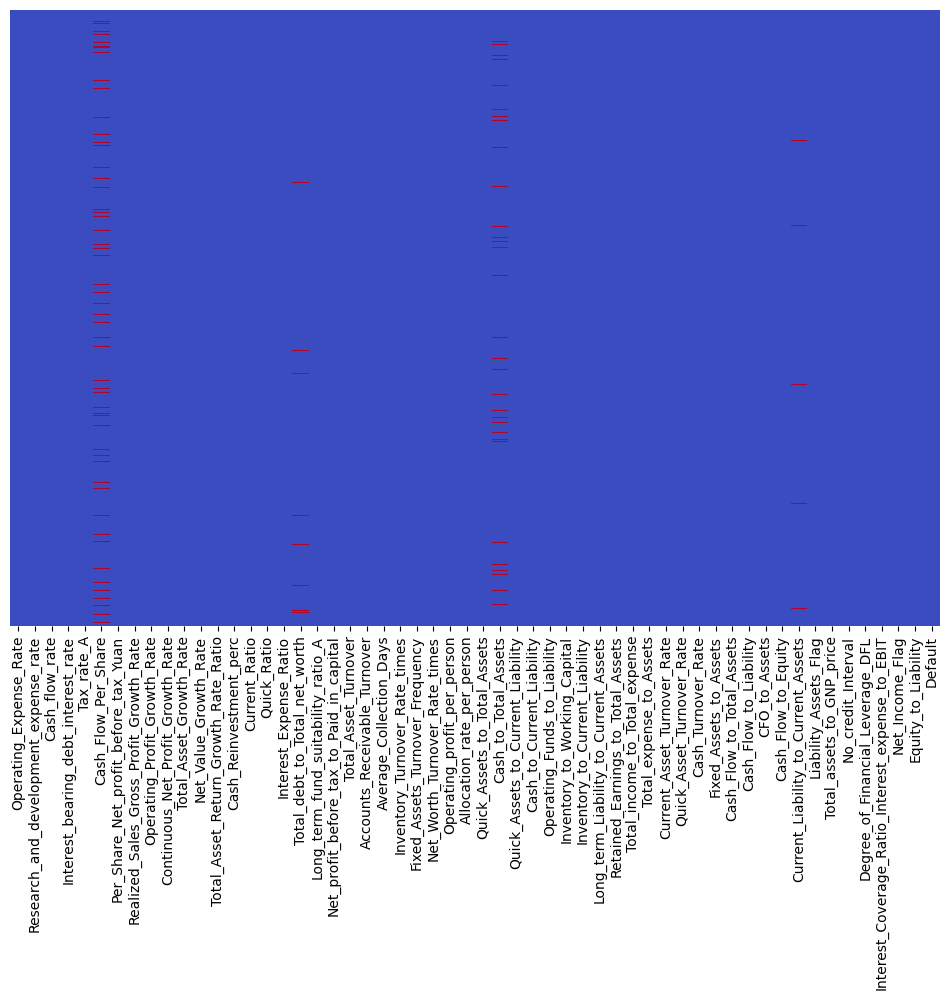

In [42]:
plt.figure(figsize = (12,8))
sns.heatmap(Businesses_sc.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

The dataset contains missing values in several variables, with "Cash_Flow_Per_Share" having 167 missing values, "Total_debt_to_Total_net_worth" with 21 missing values, "Cash_to_Total_Assets" with 96 missing values, and "Current_Liability_to_Current_Assets" with 14 missing values. In total, there are 298 missing values across the dataset.

In [43]:
from sklearn.impute import KNNImputer

In [44]:
imputer = KNNImputer(n_neighbors=5)

In [45]:
Businesses_sc_imputed=pd.DataFrame(imputer.fit_transform(Businesses_sc), columns = Businesses_sc.columns)

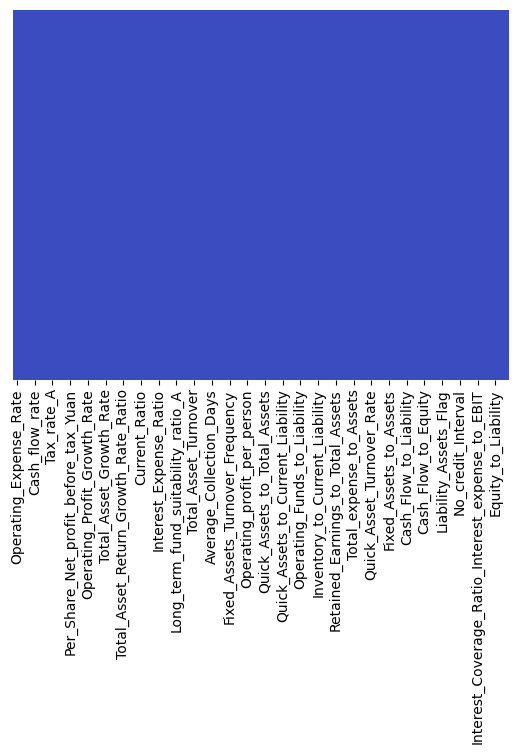

In [46]:
# Visualising missing values in dataset after imputing
sns.heatmap(Businesses_sc_imputed.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

* Missing values are imputed by the KNNImputer.

### 2: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)
We will perform EDA after VIF and feature selection using p-values because we will include only those variables that were significant in the model building.

**The Variance Inflation Factor (VIF)** is a measure used in regression analysis to quantify the severity of multicollinearity in a set of predictor variables. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other, which can lead to inaccurate and unstable estimates of the regression coefficients. 

A VIF of 1 indicates no multicollinearity, meaning that the predictor variable is not correlated with any other predictors. Generally, a VIF greater than 10 or 5 indicates high multicollinearity and suggests that the predictor variable may need to be addressed.

#### Inspect possible correlations between independent variables

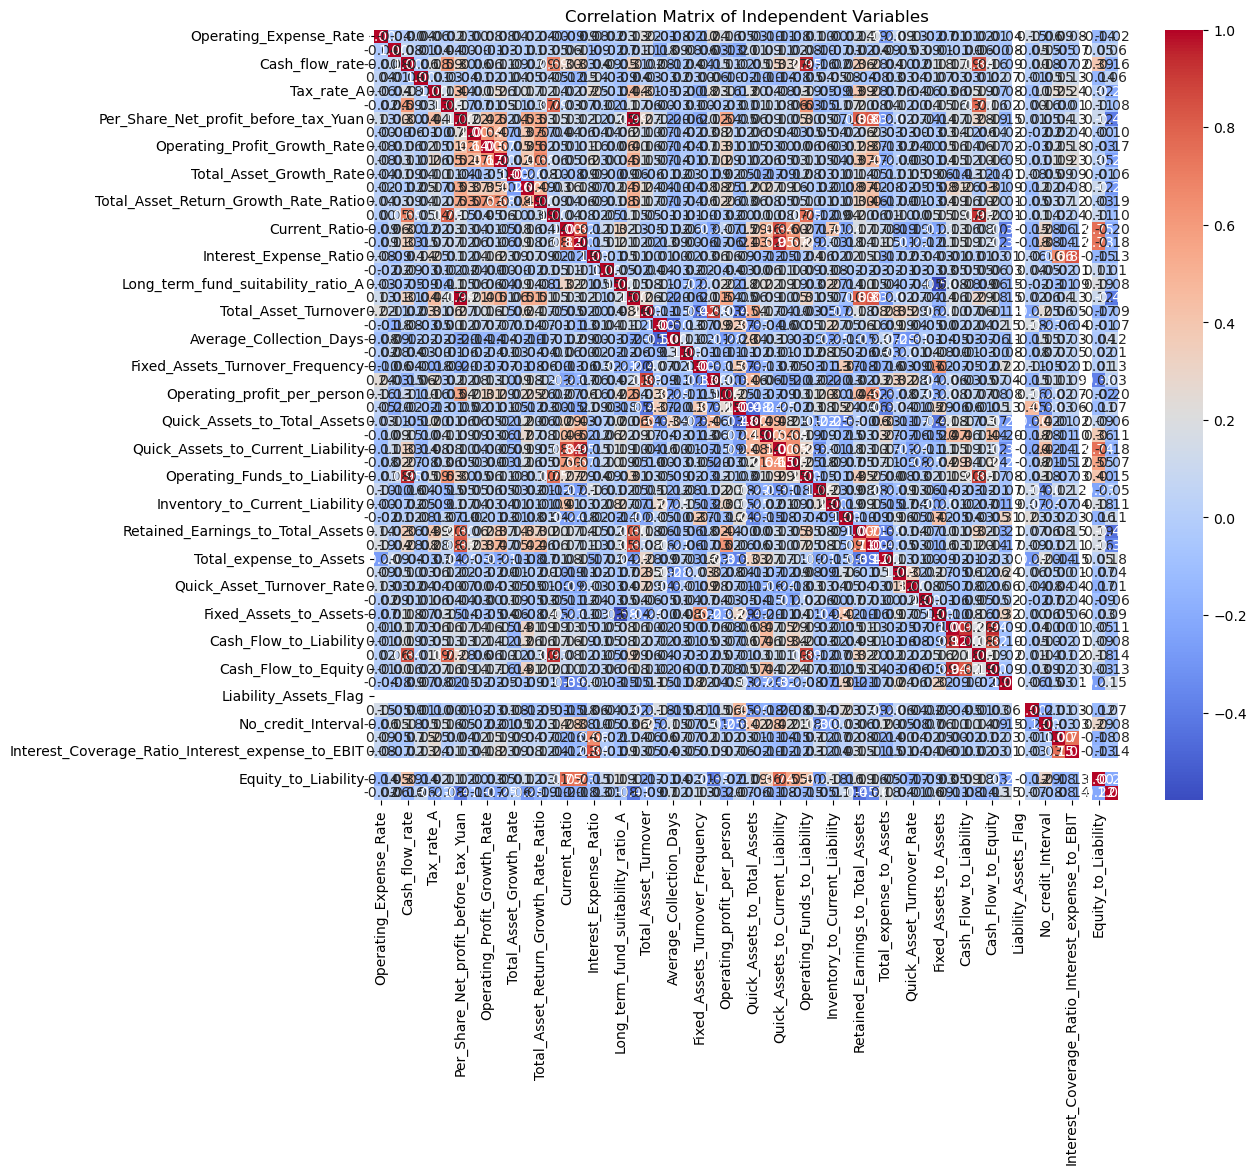

In [47]:
correlation_matrix = Businesses_sc_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Correlation Matrix of Independent Variables');
plt.show()

 * The correlation matrix shows that there are some weak relationships between the independent variables.

In [48]:
Businesses_sc_imputed.columns.value_counts().sum()

56

* In our current scenario, where we have a large number of columns (56), it's important to tidy up our data by removing any redundant columns before we start building our model. This is because having too many redundant columns can lead to multicollinearity issues, which can make our model less reliable.

In [49]:
import statsmodels.formula.api as SM

In [50]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [51]:
X = Businesses_sc_imputed.drop('Default', axis=1)  # Dropping the target column(Default).
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
6               Per_Share_Net_profit_before_tax_Yuan  96.654822
19          Net_profit_before_tax_to_Paid_in_capital  95.496114
45                                     CFO_to_Assets  24.723231
43                         Cash_Flow_to_Total_Assets  21.786366
32                      Operating_Funds_to_Liability  18.251074
30                 Quick_Assets_to_Current_Liability  16.367820
2                                     Cash_flow_rate  15.071053
13                            Cash_Reinvestment_perc  11.826439
15                                       Quick_Ratio  11.447961
46                               Cash_Flow_to_Equity  10.011606
20                              Total_Asset_Turnover   9.949434
14                                     Current_Ratio   9.060050
44                            Cash_Flow_to_Liability   8.239130
25                     Net_Worth_Turnover_Rate_times   7.856306
28                      Quick_Assets_to_Total_Assets   5.542670
37                     Total_income_to_Total_expense   4.997378
52  Interest_Coverage_Ratio_Interest_expense_to_EBIT   4.619314
54                               Equity_to_Liability   4.403964
36                 Retained_Earnings_to_Total_Assets   3.871140
16                            Interest_Expense_Ratio   3.735453
42                            Fixed_Assets_to_Assets   3.633606
29                              Cash_to_Total_Assets   2.987836
31                         Cash_to_Current_Liability   2.962098
5                                Cash_Flow_Per_Share   2.879358
34                    Inventory_to_Current_Liability   2.822783
12              Total_Asset_Return_Growth_Rate_Ratio   2.817658
8                       Operating_Profit_Growth_Rate   2.646745
9                  Continuous_Net_Profit_Growth_Rate   2.573329
51                  Degree_of_Financial_Leverage_DFL   2.513386
26                       Operating_profit_per_person   2.386816
27                        Allocation_rate_per_person   2.269274
11                             Net_Value_Growth_Rate   2.224026
7            Realized_Sales_Gross_Profit_Growth_Rate   2.157299
24                   Fixed_Assets_Turnover_Frequency   2.154165
22                           Average_Collection_Days   2.080355
38                           Total_expense_to_Assets   2.076697
18                Long_term_fund_suitability_ratio_A   1.943262
39                       Current_Asset_Turnover_Rate   1.798233
21                      Accounts_Receivable_Turnover   1.750841
50                                No_credit_Interval   1.703713
4                                         Tax_rate_A   1.657986
47               Current_Liability_to_Current_Assets   1.578840
35             Long_term_Liability_to_Current_Assets   1.568212
49                         Total_assets_to_GNP_price   1.490546
40                         Quick_Asset_Turnover_Rate   1.421552
33                      Inventory_to_Working_Capital   1.379873
0                             Operating_Expense_Rate   1.312323
10                           Total_Asset_Growth_Rate   1.223207
23                     Inventory_Turnover_Rate_times   1.212220
1              Research_and_development_expense_rate   1.164651
3                Interest_bearing_debt_interest_rate   1.145973
41                                Cash_Turnover_Rate   1.135546
17                     Total_debt_to_Total_net_worth   1.062332
48                             Liability_Assets_Flag        NaN
53                                   Net_Income_Flag        NaN

**We Dropping the highest VIF variable one by one and recalculating VIF after dropping each column.**

In [52]:
X = X.drop('Per_Share_Net_profit_before_tax_Yuan', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
44                                     CFO_to_Assets  24.720825
42                         Cash_Flow_to_Total_Assets  21.759248
31                      Operating_Funds_to_Liability  18.249853
29                 Quick_Assets_to_Current_Liability  16.367114
2                                     Cash_flow_rate  15.065931
12                            Cash_Reinvestment_perc  11.826156
14                                       Quick_Ratio  11.447288
45                               Cash_Flow_to_Equity   9.975778
19                              Total_Asset_Turnover   9.928291
13                                     Current_Ratio   9.059595
43                            Cash_Flow_to_Liability   8.239114
24                     Net_Worth_Turnover_Rate_times   7.853782
18          Net_profit_before_tax_to_Paid_in_capital   7.396530
27                      Quick_Assets_to_Total_Assets   5.541159
36                     Total_income_to_Total_expense   4.981301
51  Interest_Coverage_Ratio_Interest_expense_to_EBIT   4.616487
53                               Equity_to_Liability   4.403826
35                 Retained_Earnings_to_Total_Assets   3.795790
15                            Interest_Expense_Ratio   3.733990
41                            Fixed_Assets_to_Assets   3.633594
28                              Cash_to_Total_Assets   2.987665
30                         Cash_to_Current_Liability   2.962092
5                                Cash_Flow_Per_Share   2.878584
33                    Inventory_to_Current_Liability   2.822036
11              Total_Asset_Return_Growth_Rate_Ratio   2.799883
7                       Operating_Profit_Growth_Rate   2.631663
8                  Continuous_Net_Profit_Growth_Rate   2.573173
50                  Degree_of_Financial_Leverage_DFL   2.512933
25                       Operating_profit_per_person   2.386798
26                        Allocation_rate_per_person   2.267473
10                             Net_Value_Growth_Rate   2.167140
6            Realized_Sales_Gross_Profit_Growth_Rate   2.156626
23                   Fixed_Assets_Turnover_Frequency   2.153953
21                           Average_Collection_Days   2.079991
37                           Total_expense_to_Assets   2.072283
17                Long_term_fund_suitability_ratio_A   1.940846
38                       Current_Asset_Turnover_Rate   1.794003
20                      Accounts_Receivable_Turnover   1.750207
49                                No_credit_Interval   1.701909
4                                         Tax_rate_A   1.657884
46               Current_Liability_to_Current_Assets   1.577844
34             Long_term_Liability_to_Current_Assets   1.568210
48                         Total_assets_to_GNP_price   1.488177
39                         Quick_Asset_Turnover_Rate   1.421359
32                      Inventory_to_Working_Capital   1.379540
0                             Operating_Expense_Rate   1.311361
9                            Total_Asset_Growth_Rate   1.213796
22                     Inventory_Turnover_Rate_times   1.212167
1              Research_and_development_expense_rate   1.161309
3                Interest_bearing_debt_interest_rate   1.145964
40                                Cash_Turnover_Rate   1.132480
16                     Total_debt_to_Total_net_worth   1.062200
47                             Liability_Assets_Flag        NaN
52                                   Net_Income_Flag        NaN

In [53]:
X = X.drop('CFO_to_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
42                         Cash_Flow_to_Total_Assets  21.607142
29                 Quick_Assets_to_Current_Liability  16.366197
31                      Operating_Funds_to_Liability  16.334163
2                                     Cash_flow_rate  14.333858
14                                       Quick_Ratio  11.437605
44                               Cash_Flow_to_Equity   9.905034
19                              Total_Asset_Turnover   9.898100
13                                     Current_Ratio   9.047769
43                            Cash_Flow_to_Liability   8.228594
24                     Net_Worth_Turnover_Rate_times   7.793127
18          Net_profit_before_tax_to_Paid_in_capital   7.204413
27                      Quick_Assets_to_Total_Assets   5.526827
36                     Total_income_to_Total_expense   4.979033
50  Interest_Coverage_Ratio_Interest_expense_to_EBIT   4.616388
12                            Cash_Reinvestment_perc   4.385156
52                               Equity_to_Liability   4.349758
35                 Retained_Earnings_to_Total_Assets   3.795576
15                            Interest_Expense_Ratio   3.732071
41                            Fixed_Assets_to_Assets   3.615810
28                              Cash_to_Total_Assets   2.984983
30                         Cash_to_Current_Liability   2.953939
33                    Inventory_to_Current_Liability   2.821014
5                                Cash_Flow_Per_Share   2.805666
11              Total_Asset_Return_Growth_Rate_Ratio   2.785981
7                       Operating_Profit_Growth_Rate   2.630888
8                  Continuous_Net_Profit_Growth_Rate   2.573167
49                  Degree_of_Financial_Leverage_DFL   2.512233
25                       Operating_profit_per_person   2.386622
26                        Allocation_rate_per_person   2.267391
6            Realized_Sales_Gross_Profit_Growth_Rate   2.156624
23                   Fixed_Assets_Turnover_Frequency   2.149163
10                             Net_Value_Growth_Rate   2.142802
21                           Average_Collection_Days   2.079161
37                           Total_expense_to_Assets   2.071539
17                Long_term_fund_suitability_ratio_A   1.938544
38                       Current_Asset_Turnover_Rate   1.793671
20                      Accounts_Receivable_Turnover   1.750105
48                                No_credit_Interval   1.701906
4                                         Tax_rate_A   1.655238
45               Current_Liability_to_Current_Assets   1.572533
34             Long_term_Liability_to_Current_Assets   1.568038
47                         Total_assets_to_GNP_price   1.485398
39                         Quick_Asset_Turnover_Rate   1.421227
32                      Inventory_to_Working_Capital   1.379161
0                             Operating_Expense_Rate   1.311349
9                            Total_Asset_Growth_Rate   1.212976
22                     Inventory_Turnover_Rate_times   1.212162
1              Research_and_development_expense_rate   1.161257
3                Interest_bearing_debt_interest_rate   1.145197
40                                Cash_Turnover_Rate   1.132476
16                     Total_debt_to_Total_net_worth   1.061077
46                             Liability_Assets_Flag        NaN
51                                   Net_Income_Flag        NaN

In [54]:
X = X.drop('Cash_Flow_to_Total_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
29                 Quick_Assets_to_Current_Liability  16.363501
31                      Operating_Funds_to_Liability  16.331011
2                                     Cash_flow_rate  14.330571
14                                       Quick_Ratio  11.435176
19                              Total_Asset_Turnover   9.893010
13                                     Current_Ratio   9.046536
24                     Net_Worth_Turnover_Rate_times   7.789580
18          Net_profit_before_tax_to_Paid_in_capital   7.204246
27                      Quick_Assets_to_Total_Assets   5.525985
36                     Total_income_to_Total_expense   4.979006
49  Interest_Coverage_Ratio_Interest_expense_to_EBIT   4.616266
12                            Cash_Reinvestment_perc   4.359144
51                               Equity_to_Liability   4.342923
35                 Retained_Earnings_to_Total_Assets   3.792560
15                            Interest_Expense_Ratio   3.731878
41                            Fixed_Assets_to_Assets   3.615770
43                               Cash_Flow_to_Equity   3.580910
42                            Cash_Flow_to_Liability   3.519216
28                              Cash_to_Total_Assets   2.969839
30                         Cash_to_Current_Liability   2.952574
33                    Inventory_to_Current_Liability   2.821008
5                                Cash_Flow_Per_Share   2.791976
11              Total_Asset_Return_Growth_Rate_Ratio   2.785981
7                       Operating_Profit_Growth_Rate   2.630779
8                  Continuous_Net_Profit_Growth_Rate   2.572346
48                  Degree_of_Financial_Leverage_DFL   2.512149
25                       Operating_profit_per_person   2.384068
26                        Allocation_rate_per_person   2.267345
6            Realized_Sales_Gross_Profit_Growth_Rate   2.156267
23                   Fixed_Assets_Turnover_Frequency   2.143937
10                             Net_Value_Growth_Rate   2.136414
21                           Average_Collection_Days   2.078306
37                           Total_expense_to_Assets   2.061068
17                Long_term_fund_suitability_ratio_A   1.934267
38                       Current_Asset_Turnover_Rate   1.792051
20                      Accounts_Receivable_Turnover   1.750091
47                                No_credit_Interval   1.701629
4                                         Tax_rate_A   1.653127
44               Current_Liability_to_Current_Assets   1.571739
34             Long_term_Liability_to_Current_Assets   1.567313
46                         Total_assets_to_GNP_price   1.485336
39                         Quick_Asset_Turnover_Rate   1.421075
32                      Inventory_to_Working_Capital   1.379017
0                             Operating_Expense_Rate   1.309527
9                            Total_Asset_Growth_Rate   1.212921
22                     Inventory_Turnover_Rate_times   1.212037
1              Research_and_development_expense_rate   1.160116
3                Interest_bearing_debt_interest_rate   1.144296
40                                Cash_Turnover_Rate   1.131814
16                     Total_debt_to_Total_net_worth   1.061063
45                             Liability_Assets_Flag        NaN
50                                   Net_Income_Flag        NaN

In [55]:
X = X.drop('Quick_Assets_to_Current_Liability', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
30                      Operating_Funds_to_Liability  16.153212
2                                     Cash_flow_rate  14.145158
19                              Total_Asset_Turnover   9.891952
24                     Net_Worth_Turnover_Rate_times   7.780032
13                                     Current_Ratio   7.525639
18          Net_profit_before_tax_to_Paid_in_capital   7.175446
14                                       Quick_Ratio   6.472790
27                      Quick_Assets_to_Total_Assets   5.111264
35                     Total_income_to_Total_expense   4.959137
48  Interest_Coverage_Ratio_Interest_expense_to_EBIT   4.615930
12                            Cash_Reinvestment_perc   4.359090
50                               Equity_to_Liability   4.205419
34                 Retained_Earnings_to_Total_Assets   3.792488
15                            Interest_Expense_Ratio   3.731628
40                            Fixed_Assets_to_Assets   3.600536
42                               Cash_Flow_to_Equity   3.575869
41                            Cash_Flow_to_Liability   3.514756
28                              Cash_to_Total_Assets   2.969665
29                         Cash_to_Current_Liability   2.946913
5                                Cash_Flow_Per_Share   2.791395
11              Total_Asset_Return_Growth_Rate_Ratio   2.785299
32                    Inventory_to_Current_Liability   2.702503
7                       Operating_Profit_Growth_Rate   2.629487
8                  Continuous_Net_Profit_Growth_Rate   2.572271
47                  Degree_of_Financial_Leverage_DFL   2.510966
25                       Operating_profit_per_person   2.383030
26                        Allocation_rate_per_person   2.245313
6            Realized_Sales_Gross_Profit_Growth_Rate   2.149448
23                   Fixed_Assets_Turnover_Frequency   2.142973
10                             Net_Value_Growth_Rate   2.131660
21                           Average_Collection_Days   2.066533
36                           Total_expense_to_Assets   2.060998
17                Long_term_fund_suitability_ratio_A   1.921153
37                       Current_Asset_Turnover_Rate   1.791634
20                      Accounts_Receivable_Turnover   1.748429
46                                No_credit_Interval   1.701489
4                                         Tax_rate_A   1.652028
33             Long_term_Liability_to_Current_Assets   1.564738
43               Current_Liability_to_Current_Assets   1.559641
45                         Total_assets_to_GNP_price   1.480066
38                         Quick_Asset_Turnover_Rate   1.418804
31                      Inventory_to_Working_Capital   1.377217
0                             Operating_Expense_Rate   1.308658
9                            Total_Asset_Growth_Rate   1.212905
22                     Inventory_Turnover_Rate_times   1.212033
1              Research_and_development_expense_rate   1.160098
3                Interest_bearing_debt_interest_rate   1.141755
39                                Cash_Turnover_Rate   1.129509
16                     Total_debt_to_Total_net_worth   1.058004
44                             Liability_Assets_Flag        NaN
49                                   Net_Income_Flag        NaN

In [56]:
X = X.drop('Operating_Funds_to_Liability', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
19                              Total_Asset_Turnover  9.829256
24                     Net_Worth_Turnover_Rate_times  7.738758
13                                     Current_Ratio  7.237780
18          Net_profit_before_tax_to_Paid_in_capital  7.108412
14                                       Quick_Ratio  6.397800
27                      Quick_Assets_to_Total_Assets  5.017839
34                     Total_income_to_Total_expense  4.883504
47  Interest_Coverage_Ratio_Interest_expense_to_EBIT  4.605497
12                            Cash_Reinvestment_perc  3.822418
33                 Retained_Earnings_to_Total_Assets  3.791369
15                            Interest_Expense_Ratio  3.725857
49                               Equity_to_Liability  3.716880
39                            Fixed_Assets_to_Assets  3.598936
41                               Cash_Flow_to_Equity  3.551723
40                            Cash_Flow_to_Liability  3.498062
2                                     Cash_flow_rate  3.338257
29                         Cash_to_Current_Liability  2.946276
28                              Cash_to_Total_Assets  2.942279
5                                Cash_Flow_Per_Share  2.791326
11              Total_Asset_Return_Growth_Rate_Ratio  2.785130
31                    Inventory_to_Current_Liability  2.628585
7                       Operating_Profit_Growth_Rate  2.628030
8                  Continuous_Net_Profit_Growth_Rate  2.571516
46                  Degree_of_Financial_Leverage_DFL  2.510966
25                       Operating_profit_per_person  2.365458
26                        Allocation_rate_per_person  2.245313
6            Realized_Sales_Gross_Profit_Growth_Rate  2.149430
23                   Fixed_Assets_Turnover_Frequency  2.137150
10                             Net_Value_Growth_Rate  2.129450
21                           Average_Collection_Days  2.065638
35                           Total_expense_to_Assets  2.060267
17                Long_term_fund_suitability_ratio_A  1.920945
36                       Current_Asset_Turnover_Rate  1.787881
20                      Accounts_Receivable_Turnover  1.744433
45                                No_credit_Interval  1.699078
4                                         Tax_rate_A  1.650248
32             Long_term_Liability_to_Current_Assets  1.560730
42               Current_Liability_to_Current_Assets  1.542379
44                         Total_assets_to_GNP_price  1.479281
37                         Quick_Asset_Turnover_Rate  1.415352
30                      Inventory_to_Working_Capital  1.375311
0                             Operating_Expense_Rate  1.308175
22                     Inventory_Turnover_Rate_times  1.211351
9                            Total_Asset_Growth_Rate  1.210995
1              Research_and_development_expense_rate  1.160036
3                Interest_bearing_debt_interest_rate  1.141075
38                                Cash_Turnover_Rate  1.128615
16                     Total_debt_to_Total_net_worth  1.056770
43                             Liability_Assets_Flag       NaN
48                                   Net_Income_Flag       NaN

In [57]:
X = X.drop('Total_Asset_Turnover', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
13                                     Current_Ratio  7.217017
18          Net_profit_before_tax_to_Paid_in_capital  7.057680
14                                       Quick_Ratio  6.390041
33                     Total_income_to_Total_expense  4.872931
26                      Quick_Assets_to_Total_Assets  4.824448
46  Interest_Coverage_Ratio_Interest_expense_to_EBIT  4.592217
12                            Cash_Reinvestment_perc  3.815385
15                            Interest_Expense_Ratio  3.702949
48                               Equity_to_Liability  3.695337
32                 Retained_Earnings_to_Total_Assets  3.675802
38                            Fixed_Assets_to_Assets  3.557748
40                               Cash_Flow_to_Equity  3.550741
39                            Cash_Flow_to_Liability  3.492776
2                                     Cash_flow_rate  3.327315
23                     Net_Worth_Turnover_Rate_times  3.038603
27                              Cash_to_Total_Assets  2.942247
28                         Cash_to_Current_Liability  2.933107
5                                Cash_Flow_Per_Share  2.791153
11              Total_Asset_Return_Growth_Rate_Ratio  2.784790
7                       Operating_Profit_Growth_Rate  2.625372
30                    Inventory_to_Current_Liability  2.620353
8                  Continuous_Net_Profit_Growth_Rate  2.570873
45                  Degree_of_Financial_Leverage_DFL  2.506205
24                       Operating_profit_per_person  2.362478
25                        Allocation_rate_per_person  2.225499
6            Realized_Sales_Gross_Profit_Growth_Rate  2.144697
10                             Net_Value_Growth_Rate  2.126669
22                   Fixed_Assets_Turnover_Frequency  2.103392
34                           Total_expense_to_Assets  1.994554
20                           Average_Collection_Days  1.981247
17                Long_term_fund_suitability_ratio_A  1.915471
19                      Accounts_Receivable_Turnover  1.740846
44                                No_credit_Interval  1.672657
35                       Current_Asset_Turnover_Rate  1.658683
4                                         Tax_rate_A  1.643035
31             Long_term_Liability_to_Current_Assets  1.550848
43                         Total_assets_to_GNP_price  1.474324
41               Current_Liability_to_Current_Assets  1.465081
36                         Quick_Asset_Turnover_Rate  1.398801
29                      Inventory_to_Working_Capital  1.373310
0                             Operating_Expense_Rate  1.290175
21                     Inventory_Turnover_Rate_times  1.211331
9                            Total_Asset_Growth_Rate  1.210930
3                Interest_bearing_debt_interest_rate  1.139891
1              Research_and_development_expense_rate  1.137421
37                                Cash_Turnover_Rate  1.126694
16                     Total_debt_to_Total_net_worth  1.055369
42                             Liability_Assets_Flag       NaN
47                                   Net_Income_Flag       NaN

In [58]:
X = X.drop('Current_Ratio', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
17          Net_profit_before_tax_to_Paid_in_capital  7.048263
32                     Total_income_to_Total_expense  4.872781
25                      Quick_Assets_to_Total_Assets  4.768386
45  Interest_Coverage_Ratio_Interest_expense_to_EBIT  4.589272
13                                       Quick_Ratio  4.229048
12                            Cash_Reinvestment_perc  3.799768
14                            Interest_Expense_Ratio  3.694299
31                 Retained_Earnings_to_Total_Assets  3.673437
37                            Fixed_Assets_to_Assets  3.551927
39                               Cash_Flow_to_Equity  3.550498
38                            Cash_Flow_to_Liability  3.492230
47                               Equity_to_Liability  3.366014
2                                     Cash_flow_rate  3.293976
22                     Net_Worth_Turnover_Rate_times  3.037783
26                              Cash_to_Total_Assets  2.940402
27                         Cash_to_Current_Liability  2.932770
5                                Cash_Flow_Per_Share  2.789438
11              Total_Asset_Return_Growth_Rate_Ratio  2.784095
7                       Operating_Profit_Growth_Rate  2.625268
8                  Continuous_Net_Profit_Growth_Rate  2.570268
44                  Degree_of_Financial_Leverage_DFL  2.506125
23                       Operating_profit_per_person  2.361398
24                        Allocation_rate_per_person  2.225443
6            Realized_Sales_Gross_Profit_Growth_Rate  2.143625
10                             Net_Value_Growth_Rate  2.124456
21                   Fixed_Assets_Turnover_Frequency  2.103319
33                           Total_expense_to_Assets  1.994526
19                           Average_Collection_Days  1.973677
16                Long_term_fund_suitability_ratio_A  1.912017
18                      Accounts_Receivable_Turnover  1.740780
29                    Inventory_to_Current_Liability  1.727223
43                                No_credit_Interval  1.662515
34                       Current_Asset_Turnover_Rate  1.648805
4                                         Tax_rate_A  1.641810
30             Long_term_Liability_to_Current_Assets  1.547539
42                         Total_assets_to_GNP_price  1.472193
40               Current_Liability_to_Current_Assets  1.455806
35                         Quick_Asset_Turnover_Rate  1.398236
28                      Inventory_to_Working_Capital  1.367842
0                             Operating_Expense_Rate  1.290035
20                     Inventory_Turnover_Rate_times  1.211226
9                            Total_Asset_Growth_Rate  1.208800
3                Interest_bearing_debt_interest_rate  1.139623
1              Research_and_development_expense_rate  1.137163
36                                Cash_Turnover_Rate  1.126450
15                     Total_debt_to_Total_net_worth  1.054368
41                             Liability_Assets_Flag       NaN
46                                   Net_Income_Flag       NaN

In [59]:
X = X.drop('Net_profit_before_tax_to_Paid_in_capital', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
24                      Quick_Assets_to_Total_Assets  4.760914
44  Interest_Coverage_Ratio_Interest_expense_to_EBIT  4.537485
13                                       Quick_Ratio  4.227965
12                            Cash_Reinvestment_perc  3.798690
14                            Interest_Expense_Ratio  3.639614
31                     Total_income_to_Total_expense  3.575975
36                            Fixed_Assets_to_Assets  3.548696
38                               Cash_Flow_to_Equity  3.527479
37                            Cash_Flow_to_Liability  3.453044
46                               Equity_to_Liability  3.327461
2                                     Cash_flow_rate  3.290423
21                     Net_Worth_Turnover_Rate_times  3.037149
25                              Cash_to_Total_Assets  2.937780
26                         Cash_to_Current_Liability  2.932692
30                 Retained_Earnings_to_Total_Assets  2.836903
5                                Cash_Flow_Per_Share  2.782000
11              Total_Asset_Return_Growth_Rate_Ratio  2.638442
7                       Operating_Profit_Growth_Rate  2.624691
8                  Continuous_Net_Profit_Growth_Rate  2.568478
43                  Degree_of_Financial_Leverage_DFL  2.477193
22                       Operating_profit_per_person  2.305707
23                        Allocation_rate_per_person  2.207830
6            Realized_Sales_Gross_Profit_Growth_Rate  2.125477
20                   Fixed_Assets_Turnover_Frequency  2.101774
10                             Net_Value_Growth_Rate  2.046675
18                           Average_Collection_Days  1.973588
32                           Total_expense_to_Assets  1.961323
16                Long_term_fund_suitability_ratio_A  1.907559
17                      Accounts_Receivable_Turnover  1.736682
28                    Inventory_to_Current_Liability  1.726695
42                                No_credit_Interval  1.660560
33                       Current_Asset_Turnover_Rate  1.644940
29             Long_term_Liability_to_Current_Assets  1.547539
4                                         Tax_rate_A  1.491434
41                         Total_assets_to_GNP_price  1.470488
39               Current_Liability_to_Current_Assets  1.454694
34                         Quick_Asset_Turnover_Rate  1.395594
27                      Inventory_to_Working_Capital  1.366946
0                             Operating_Expense_Rate  1.287980
19                     Inventory_Turnover_Rate_times  1.209559
9                            Total_Asset_Growth_Rate  1.204506
3                Interest_bearing_debt_interest_rate  1.137814
1              Research_and_development_expense_rate  1.135250
35                                Cash_Turnover_Rate  1.126218
15                     Total_debt_to_Total_net_worth  1.052418
40                             Liability_Assets_Flag       NaN
45                                   Net_Income_Flag       NaN

In [60]:
X = X.drop('Quick_Assets_to_Total_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
43  Interest_Coverage_Ratio_Interest_expense_to_EBIT  4.532997
12                            Cash_Reinvestment_perc  3.798667
14                            Interest_Expense_Ratio  3.636263
13                                       Quick_Ratio  3.570248
30                     Total_income_to_Total_expense  3.528175
37                               Cash_Flow_to_Equity  3.527365
36                            Cash_Flow_to_Liability  3.451977
35                            Fixed_Assets_to_Assets  3.330867
2                                     Cash_flow_rate  3.280710
45                               Equity_to_Liability  3.260956
25                         Cash_to_Current_Liability  2.867685
29                 Retained_Earnings_to_Total_Assets  2.836835
5                                Cash_Flow_Per_Share  2.779884
11              Total_Asset_Return_Growth_Rate_Ratio  2.632425
7                       Operating_Profit_Growth_Rate  2.624476
24                              Cash_to_Total_Assets  2.610822
8                  Continuous_Net_Profit_Growth_Rate  2.563157
42                  Degree_of_Financial_Leverage_DFL  2.477124
21                     Net_Worth_Turnover_Rate_times  2.415053
22                       Operating_profit_per_person  2.296424
23                        Allocation_rate_per_person  2.207588
6            Realized_Sales_Gross_Profit_Growth_Rate  2.122103
20                   Fixed_Assets_Turnover_Frequency  2.097571
10                             Net_Value_Growth_Rate  2.045217
31                           Total_expense_to_Assets  1.959895
16                Long_term_fund_suitability_ratio_A  1.907545
18                           Average_Collection_Days  1.798523
17                      Accounts_Receivable_Turnover  1.733049
27                    Inventory_to_Current_Liability  1.658454
32                       Current_Asset_Turnover_Rate  1.607550
41                                No_credit_Interval  1.556539
28             Long_term_Liability_to_Current_Assets  1.514880
4                                         Tax_rate_A  1.479843
40                         Total_assets_to_GNP_price  1.464511
38               Current_Liability_to_Current_Assets  1.450190
33                         Quick_Asset_Turnover_Rate  1.376826
26                      Inventory_to_Working_Capital  1.341354
0                             Operating_Expense_Rate  1.286422
19                     Inventory_Turnover_Rate_times  1.209551
9                            Total_Asset_Growth_Rate  1.201899
3                Interest_bearing_debt_interest_rate  1.134669
1              Research_and_development_expense_rate  1.134408
34                                Cash_Turnover_Rate  1.126002
15                     Total_debt_to_Total_net_worth  1.050939
39                             Liability_Assets_Flag       NaN
44                                   Net_Income_Flag       NaN

In [61]:
X = X.drop('Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
12                   Cash_Reinvestment_perc  3.798356
13                              Quick_Ratio  3.570125
37                      Cash_Flow_to_Equity  3.526813
30            Total_income_to_Total_expense  3.515053
36                   Cash_Flow_to_Liability  3.451792
35                   Fixed_Assets_to_Assets  3.330766
2                            Cash_flow_rate  3.280520
44                      Equity_to_Liability  3.256994
25                Cash_to_Current_Liability  2.867382
29        Retained_Earnings_to_Total_Assets  2.833460
5                       Cash_Flow_Per_Share  2.779877
11     Total_Asset_Return_Growth_Rate_Ratio  2.629121
7              Operating_Profit_Growth_Rate  2.612923
24                     Cash_to_Total_Assets  2.610480
8         Continuous_Net_Profit_Growth_Rate  2.562678
21            Net_Worth_Turnover_Rate_times  2.409823
22              Operating_profit_per_person  2.281374
23               Allocation_rate_per_person  2.205081
6   Realized_Sales_Gross_Profit_Growth_Rate  2.115729
20          Fixed_Assets_Turnover_Frequency  2.097329
10                    Net_Value_Growth_Rate  2.045051
31                  Total_expense_to_Assets  1.959762
42         Degree_of_Financial_Leverage_DFL  1.933918
14                   Interest_Expense_Ratio  1.925695
16       Long_term_fund_suitability_ratio_A  1.906793
18                  Average_Collection_Days  1.798425
17             Accounts_Receivable_Turnover  1.731171
27           Inventory_to_Current_Liability  1.657648
32              Current_Asset_Turnover_Rate  1.605884
41                       No_credit_Interval  1.555483
28    Long_term_Liability_to_Current_Assets  1.514828
4                                Tax_rate_A  1.471498
40                Total_assets_to_GNP_price  1.464398
38      Current_Liability_to_Current_Assets  1.450180
33                Quick_Asset_Turnover_Rate  1.376803
26             Inventory_to_Working_Capital  1.341329
0                    Operating_Expense_Rate  1.285937
19            Inventory_Turnover_Rate_times  1.207055
9                   Total_Asset_Growth_Rate  1.201846
3       Interest_bearing_debt_interest_rate  1.134484
1     Research_and_development_expense_rate  1.133971
34                       Cash_Turnover_Rate  1.125843
15            Total_debt_to_Total_net_worth  1.050925
39                    Liability_Assets_Flag       NaN
43                          Net_Income_Flag       NaN

* Now our dataset having all variables with VIF <5

In [62]:
X.shape

(2058, 45)

In [63]:
X.describe().T

count          mean       std  \
Operating_Expense_Rate                   2058.0  2.157868e-17  1.000243   
Research_and_development_expense_rate    2058.0 -1.726294e-17  1.000243   
Cash_flow_rate                           2058.0  1.309394e-15  1.000243   
Interest_bearing_debt_interest_rate      2058.0 -1.139354e-16  1.000243   
Tax_rate_A                               2058.0  4.143106e-17  1.000243   
Cash_Flow_Per_Share                      2058.0 -2.022925e-03  0.971259   
Realized_Sales_Gross_Profit_Growth_Rate  2058.0 -1.535280e-14  1.000243   
Operating_Profit_Growth_Rate             2058.0  2.693986e-13  1.000243   
Continuous_Net_Profit_Growth_Rate        2058.0  5.958823e-14  1.000243   
Total_Asset_Growth_Rate                  2058.0  1.881661e-16  1.000243   
Net_Value_Growth_Rate                    2058.0 -3.452589e-18  1.000243   
Total_Asset_Return_Growth_Rate_Ratio     2058.0  1.531223e-14  1.000243   
Cash_Reinvestment_perc                   2058.0  3.193644e-16  1.000243   
Quick_Ratio                              2058.0  2.071553e-17  1.000243   
Interest_Expense_Ratio                   2058.0  1.251995e-14  1.000243   
Total_debt_to_Total_net_worth            2058.0 -4.054798e-04  0.995135   
Long_term_fund_suitability_ratio_A       2058.0 -3.694270e-16  1.000243   
Accounts_Receivable_Turnover             2058.0  6.430446e-17  1.000243   
Average_Collection_Days                  2058.0  5.869401e-17  1.000243   
Inventory_Turnover_Rate_times            2058.0  4.660995e-17  1.000243   
Fixed_Assets_Turnover_Frequency          2058.0 -6.387289e-17  1.000243   
Net_Worth_Turnover_Rate_times            2058.0 -8.976730e-17  1.000243   
Operating_profit_per_person              2058.0 -9.218412e-16  1.000243   
Allocation_rate_per_person               2058.0  1.001251e-16  1.000243   
Cash_to_Total_Assets                     2058.0 -1.656324e-03  0.994533   
Cash_to_Current_Liability                2058.0  3.797847e-17  1.000243   
Inventory_to_Working_Capital             2058.0  3.291007e-14  1.000243   
Inventory_to_Current_Liability           2058.0  1.812609e-16  1.000243   
Long_term_Liability_to_Current_Assets    2058.0  1.726294e-17  1.000243   
Retained_Earnings_to_Total_Assets        2058.0 -2.071553e-16  1.000243   
Total_income_to_Total_expense            2058.0 -1.470803e-15  1.000243   
Total_expense_to_Assets                  2058.0 -5.006253e-17  1.000243   
Current_Asset_Turnover_Rate              2058.0 -2.762071e-17  1.000243   
Quick_Asset_Turnover_Rate                2058.0 -6.905177e-18  1.000243   
Cash_Turnover_Rate                       2058.0 -6.905177e-17  1.000243   
Fixed_Assets_to_Assets                   2058.0 -4.315736e-17  1.000243   
Cash_Flow_to_Liability                   2058.0  3.818563e-15  1.000243   
Cash_Flow_to_Equity                      2058.0  1.696947e-15  1.000243   
Current_Liability_to_Current_Assets      2058.0 -7.276901e-04  0.997137   
Liability_Assets_Flag                    2058.0  0.000000e+00  0.000000   
Total_assets_to_GNP_price                2058.0 -8.631472e-18  1.000243   
No_credit_Interval                       2058.0 -2.793792e-14  1.000243   
Degree_of_Financial_Leverage_DFL         2058.0  5.023516e-15  1.000243   
Net_Income_Flag                          2058.0  0.000000e+00  0.000000   
Equity_to_Liability                      2058.0 -7.120964e-17  1.000243   

                                              min       25%       50%  \
Operating_Expense_Rate                  -0.631148 -0.631148 -0.631148   
Research_and_development_expense_rate   -0.582560 -0.582560 -0.582560   
Cash_flow_rate                          -2.181767 -0.608138 -0.165832   
Interest_bearing_debt_interest_rate     -1.712524 -0.720748 -0.081129   
Tax_rate_A                              -0.855122 -0.855122 -0.557057   
Cash_Flow_Per_Share                     -9.841737 -0.313832  0.047926   
Realized_Sales_Gross_Profit_Growth_Rate -1.360294 -0.501976 -0.244799   
Operati

#### Dropping columns having constant value

In [64]:
X = X.drop(['Liability_Assets_Flag','Net_Income_Flag'],axis=1)

### 3: Train Test Split(Split the data into train and test datasets in the ratio of 67:33 and use a random state of 42 (random_state=42))

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
Y = Businesses_sc_imputed['Default']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33, random_state=42)

### 4: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

In [68]:
# For the Statsmodel, we bring together X and Y.
train_XY = pd.concat([X_train,Y_train], axis=1)
test_XY = pd.concat([X_test,Y_test], axis=1)

### Stats Model 
For calculating p-values, according to the p-values, we select the significant feature.

In [69]:
for column_name in X.columns:
    print(column_name)

Operating_Expense_Rate
Research_and_development_expense_rate
Cash_flow_rate
Interest_bearing_debt_interest_rate
Tax_rate_A
Cash_Flow_Per_Share
Realized_Sales_Gross_Profit_Growth_Rate
Operating_Profit_Growth_Rate
Continuous_Net_Profit_Growth_Rate
Total_Asset_Growth_Rate
Net_Value_Growth_Rate
Total_Asset_Return_Growth_Rate_Ratio
Cash_Reinvestment_perc
Quick_Ratio
Interest_Expense_Ratio
Total_debt_to_Total_net_worth
Long_term_fund_suitability_ratio_A
Accounts_Receivable_Turnover
Average_Collection_Days
Inventory_Turnover_Rate_times
Fixed_Assets_Turnover_Frequency
Net_Worth_Turnover_Rate_times
Operating_profit_per_person
Allocation_rate_per_person
Cash_to_Total_Assets
Cash_to_Current_Liability
Inventory_to_Working_Capital
Inventory_to_Current_Liability
Long_term_Liability_to_Current_Assets
Retained_Earnings_to_Total_Assets
Total_income_to_Total_expense
Total_expense_to_Assets
Current_Asset_Turnover_Rate
Quick_Asset_Turnover_Rate
Cash_Turnover_Rate
Fixed_Assets_to_Assets
Cash_Flow_to_Liabil

#### Fitting the logistic regression model

In [70]:
f_1 = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + Realized_Sales_Gross_Profit_Growth_Rate + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + Interest_Expense_Ratio + ' + \
      'Total_debt_to_Total_net_worth + Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + Inventory_to_Working_Capital + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + Current_Asset_Turnover_Rate + Quick_Asset_Turnover_Rate + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability'

In [71]:
model_1=SM.logit(formula=f_1, data=test_XY).fit()

         Current function value: 0.154783
         Iterations: 35


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Studying whether this equation is significant or not

In [72]:
# model1 summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                           43
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.5191
Time:                        18:46:16   Log-Likelihood:                -105.25
converged:                      False   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 6.928e-27
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -5.4383   4963.539     -0.001      0.999   -9733.796    9722.919
Operating_Expense_Rate                      0.0196      0.225      0.087      0.931      -0.422       0.461
Research_and_development_expense_rate       0.1979      0.206      0.960      0.337      -0.206       0.602
Cash_flow_rate                             -0.4266      0.543     -0.785      0.432      -1.491       0.638
Interest_bearing_debt_interest_rate        -0.0603      0.248     -0.243      0.808      -0.547       0.426
Tax_rate_A                                 -0.2324      0.271     -0.858      0.391      -0.763       0.298
Cash_Flow_Per_Share                        -0.8220      0.501     -1.641      0.101      -1.804       0.160
Realized_Sales_Gross_Profit_Growth_Rate    -0.1853      0.251     -0.739      0.460      -0.677       0.306
Operating_Profit_Growth_Rate                0.1992      0.269      0.741      0.459      -0.328       0.727
Continuous_Net_Profit_Growth_Rate          -0.3252      0.248     -1.310      0.190      -0.812       0.161
Total_Asset_Growth_Rate                     0.2825      0.258      1.095      0.273      -0.223       0.788
Net_Value_Growth_Rate                      -0.4422      0.264     -1.673      0.094      -0.960       0.076
Total_Asset_Return_Growth_Rate_Ratio        0.1177      0.280      0.420      0.674      -0.431       0.666
Cash_Reinvestment_perc                      0.9150      0.436      2.099      0.036       0.061       1.769
Quick_Ratio                                -0.0987      0.646     -0.153      0.879      -1.366       1.168
Interest_Expense_Ratio                     -0.0041      0.214     -0.019      0.985      -0.424       0.416
Total_debt_to_Total_net_worth              -3.6193   1.25e+05   -2.9e-05      1.000   -2.45e+05    2.45e+05
Long_term_fund_suitability_ratio_A          0.7397      0.301      2.454      0.014       0.149       1.330
Accounts_Receivable_Turnover               -0.6217      0.323     -1.926      0.054      -1.254       0.011
Average_Collection_Days                     0.3030      0.284      1.067      0.286      -0.254       0.860
Inventory_Turnover_Rate_times              -0.1752      0.224     -0.783      0.434      -0.614       0.263
Fixed_Assets_Turnover_Frequency             0.0549      0.291      0.188      0.851      -0.516       0.626
Net_Worth_Turnover_Rate_times              -0.2347      0.299     -0.784      0.433      -0.821       0.352
Operating_profit_per_person                -0.2490      0.472     -0.528      0.597      -1.173       0.675
Allocation_rate_per_person                 -0.0504      0.298     -0.169      0.866      -0.635       0.535
Cash_to_Total_Assets                        0.1585      0.427      0.371      0.710      -0.678       0.995
Cash_to_Current_Liability                   0.1279      0.312      0.410      0.682      -0.483       0.739
I

* We can see that few variables are insignificant & may not be useful to discriminate cases of Deault

#### Let us look at the adjusted pseudo R-square value

In [73]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.32258807396129563


Adjusted pseudo R-square value(0.3225) seems to be lower than Pseudo R-square value(0.5191) which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

In [74]:
# Model 2 
# Removing Total_debt_to_Total_net_worth having p value = 1.000 which greater than 0.05
f_2 = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + Realized_Sales_Gross_Profit_Growth_Rate + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + Interest_Expense_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + Inventory_to_Working_Capital + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + Current_Asset_Turnover_Rate + Quick_Asset_Turnover_Rate + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability'

In [75]:
model_2 = SM.logit(formula=f_2, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.154783
         Iterations 10


In [76]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      637
Method:                           MLE   Df Model:                           42
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.5191
Time:                        18:46:16   Log-Likelihood:                -105.25
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 2.946e-27
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -5.2945      0.621     -8.527      0.000      -6.511      -4.078
Operating_Expense_Rate                      0.0196      0.225      0.087      0.931      -0.422       0.461
Research_and_development_expense_rate       0.1979      0.206      0.960      0.337      -0.206       0.602
Cash_flow_rate                             -0.4266      0.543     -0.785      0.432      -1.491       0.638
Interest_bearing_debt_interest_rate        -0.0603      0.248     -0.243      0.808      -0.547       0.426
Tax_rate_A                                 -0.2324      0.271     -0.858      0.391      -0.763       0.298
Cash_Flow_Per_Share                        -0.8220      0.501     -1.641      0.101      -1.804       0.160
Realized_Sales_Gross_Profit_Growth_Rate    -0.1854      0.251     -0.739      0.460      -0.677       0.306
Operating_Profit_Growth_Rate                0.1992      0.269      0.741      0.459      -0.328       0.727
Continuous_Net_Profit_Growth_Rate          -0.3252      0.248     -1.310      0.190      -0.812       0.161
Total_Asset_Growth_Rate                     0.2825      0.258      1.095      0.273      -0.223       0.788
Net_Value_Growth_Rate                      -0.4422      0.264     -1.673      0.094      -0.960       0.076
Total_Asset_Return_Growth_Rate_Ratio        0.1177      0.280      0.420      0.674      -0.431       0.666
Cash_Reinvestment_perc                      0.9150      0.436      2.099      0.036       0.061       1.769
Quick_Ratio                                -0.0987      0.646     -0.153      0.879      -1.366       1.168
Interest_Expense_Ratio                     -0.0041      0.214     -0.019      0.985      -0.424       0.416
Long_term_fund_suitability_ratio_A          0.7397      0.301      2.454      0.014       0.149       1.330
Accounts_Receivable_Turnover               -0.6217      0.323     -1.926      0.054      -1.254       0.011
Average_Collection_Days                     0.3030      0.284      1.067      0.286      -0.254       0.860
Inventory_Turnover_Rate_times              -0.1752      0.224     -0.783      0.434      -0.614       0.263
Fixed_Assets_Turnover_Frequency             0.0549      0.291      0.188      0.851      -0.516       0.626
Net_Worth_Turnover_Rate_times              -0.2347      0.299     -0.784      0.433      -0.821       0.352
Operating_profit_per_person                -0.2490      0.472     -0.528      0.597      -1.173       0.675
Allocation_rate_per_person                 -0.0504      0.298     -0.169      0.866      -0.635       0.535
Cash_to_Total_Assets                        0.1585      0.427      0.372      0.710      -0.678       0.995
Cash_to_Current_Liability                   0.1279      0.312      0.410      0.682      -0.483       0.739
Inventory_to_Working_Capital                0.0027      0.200      0.013      0.989      -0.389       0.394
I

In [77]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.32715723874037705


Adjusted pseudo R-square value(0.3271) seems to be lower than Pseudo R-square value(0.5191) which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

In [78]:
# Model 3
# Removing Inventory_to_Working_Capital having p value 0.989
f_3 = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + Realized_Sales_Gross_Profit_Growth_Rate + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + Interest_Expense_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + Current_Asset_Turnover_Rate + Quick_Asset_Turnover_Rate + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability'

In [79]:
model_3 = SM.logit(formula=f_3, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.154783
         Iterations 10


In [80]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      638
Method:                           MLE   Df Model:                           41
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.5191
Time:                        18:46:17   Log-Likelihood:                -105.25
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 1.237e-27
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -5.2946      0.621     -8.528      0.000      -6.511      -4.078
Operating_Expense_Rate                      0.0194      0.224      0.086      0.931      -0.420       0.459
Research_and_development_expense_rate       0.1982      0.204      0.970      0.332      -0.202       0.599
Cash_flow_rate                             -0.4261      0.542     -0.786      0.432      -1.488       0.636
Interest_bearing_debt_interest_rate        -0.0604      0.248     -0.244      0.807      -0.547       0.426
Tax_rate_A                                 -0.2325      0.270     -0.860      0.390      -0.763       0.298
Cash_Flow_Per_Share                        -0.8213      0.498     -1.648      0.099      -1.798       0.155
Realized_Sales_Gross_Profit_Growth_Rate    -0.1853      0.251     -0.739      0.460      -0.677       0.306
Operating_Profit_Growth_Rate                0.1990      0.269      0.741      0.459      -0.327       0.725
Continuous_Net_Profit_Growth_Rate          -0.3253      0.248     -1.311      0.190      -0.811       0.161
Total_Asset_Growth_Rate                     0.2826      0.258      1.096      0.273      -0.223       0.788
Net_Value_Growth_Rate                      -0.4418      0.263     -1.682      0.092      -0.956       0.073
Total_Asset_Return_Growth_Rate_Ratio        0.1179      0.280      0.421      0.673      -0.430       0.666
Cash_Reinvestment_perc                      0.9140      0.429      2.130      0.033       0.073       1.755
Quick_Ratio                                -0.0990      0.646     -0.153      0.878      -1.365       1.167
Interest_Expense_Ratio                     -0.0040      0.214     -0.019      0.985      -0.424       0.416
Long_term_fund_suitability_ratio_A          0.7393      0.300      2.467      0.014       0.152       1.327
Accounts_Receivable_Turnover               -0.6216      0.323     -1.926      0.054      -1.254       0.011
Average_Collection_Days                     0.3028      0.283      1.069      0.285      -0.253       0.858
Inventory_Turnover_Rate_times              -0.1752      0.224     -0.783      0.434      -0.614       0.263
Fixed_Assets_Turnover_Frequency             0.0548      0.291      0.188      0.851      -0.516       0.626
Net_Worth_Turnover_Rate_times              -0.2348      0.299     -0.785      0.432      -0.821       0.351
Operating_profit_per_person                -0.2484      0.470     -0.529      0.597      -1.169       0.672
Allocation_rate_per_person                 -0.0504      0.298     -0.169      0.866      -0.635       0.535
Cash_to_Total_Assets                        0.1583      0.426      0.371      0.710      -0.678       0.994
Cash_to_Current_Liability                   0.1280      0.312      0.410      0.681      -0.483       0.739
Inventory_to_Current_Liability              0.0287      0.295      0.097      0.923      -0.550       0.607
L

In [81]:
# Model4
# Removing Interest_Expense_Ratio having p value 0.985
model_4 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + Realized_Sales_Gross_Profit_Growth_Rate + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + Current_Asset_Turnover_Rate + Quick_Asset_Turnover_Rate + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_4.summary()

Optimization terminated successfully.
         Current function value: 0.197336
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1337
Method:                           MLE   Df Model:                           40
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4340
Time:                        18:46:17   Log-Likelihood:                -271.93
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.861e-64
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -4.0563      0.285    -14.219      0.000      -4.615      -3.497
Operating_Expense_Rate                      0.0820      0.132      0.620      0.535      -0.177       0.341
Research_and_development_expense_rate       0.3744      0.117      3.214      0.001       0.146       0.603
Cash_flow_rate                              0.1484      0.292      0.508      0.612      -0.425       0.722
Interest_bearing_debt_interest_rate         0.4969      0.145      3.421      0.001       0.212       0.782
Tax_rate_A                                 -0.2102      0.165     -1.274      0.203      -0.534       0.113
Cash_Flow_Per_Share                         0.2133      0.261      0.818      0.414      -0.298       0.725
Realized_Sales_Gross_Profit_Growth_Rate    -0.0106      0.140     -0.076      0.940      -0.286       0.264
Operating_Profit_Growth_Rate                0.1043      0.157      0.662      0.508      -0.204       0.413
Continuous_Net_Profit_Growth_Rate          -0.1833      0.147     -1.245      0.213      -0.472       0.105
Total_Asset_Growth_Rate                    -0.2245      0.138     -1.631      0.103      -0.494       0.045
Net_Value_Growth_Rate                      -0.3880      0.203     -1.915      0.055      -0.785       0.009
Total_Asset_Return_Growth_Rate_Ratio        0.1808      0.177      1.021      0.307      -0.166       0.528
Cash_Reinvestment_perc                     -0.4993      0.226     -2.207      0.027      -0.943      -0.056
Quick_Ratio                                -0.8457      0.299     -2.829      0.005      -1.432      -0.260
Long_term_fund_suitability_ratio_A          0.2112      0.173      1.224      0.221      -0.127       0.549
Accounts_Receivable_Turnover               -0.2517      0.162     -1.555      0.120      -0.569       0.066
Average_Collection_Days                     0.2763      0.142      1.945      0.052      -0.002       0.555
Inventory_Turnover_Rate_times               0.0316      0.124      0.255      0.799      -0.211       0.274
Fixed_Assets_Turnover_Frequency             0.2067      0.152      1.358      0.174      -0.092       0.505
Net_Worth_Turnover_Rate_times               0.1597      0.179      0.892      0.373      -0.191       0.511
Operating_profit_per_person                 0.2591      0.202      1.285      0.199      -0.136       0.654
Allocation_rate_per_person                  0.3804      0.154      2.475      0.013       0.079       0.682
Cash_to_Total_Assets                       -0.1605      0.233     -0.690      0.490      -0.616       0.295
Cash_to_Current_Liability                   0.2343      0.176      1.331      0.183      -0.111       0.579
Inventory_to_Current_Liability             -0.1645      0.183     -0.897      0.369      -0.524       0.195
Long_term_Liability_to_Current_Assets      -0.1612      0.140     -1.155      0.248      -0.435       0.112
R

In [82]:
# Model5
# Removing Realized_Sales_Gross_Profit_Growth_Rate having p value 0.940
model_5 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + Current_Asset_Turnover_Rate + Quick_Asset_Turnover_Rate + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_5.summary()

Optimization terminated successfully.
         Current function value: 0.197338
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1338
Method:                           MLE   Df Model:                           39
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4340
Time:                        18:46:17   Log-Likelihood:                -271.93
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 8.694e-65
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0565      0.285    -14.219      0.000      -4.616      -3.497
Operating_Expense_Rate                    0.0823      0.132      0.623      0.533      -0.177       0.341
Research_and_development_expense_rate     0.3737      0.116      3.218      0.001       0.146       0.601
Cash_flow_rate                            0.1495      0.292      0.512      0.609      -0.423       0.722
Interest_bearing_debt_interest_rate       0.4971      0.145      3.424      0.001       0.213       0.782
Tax_rate_A                               -0.2102      0.165     -1.275      0.202      -0.533       0.113
Cash_Flow_Per_Share                       0.2138      0.261      0.818      0.413      -0.299       0.726
Operating_Profit_Growth_Rate              0.0993      0.143      0.692      0.489      -0.182       0.380
Continuous_Net_Profit_Growth_Rate        -0.1832      0.147     -1.244      0.213      -0.472       0.105
Total_Asset_Growth_Rate                  -0.2246      0.138     -1.631      0.103      -0.494       0.045
Net_Value_Growth_Rate                    -0.3910      0.199     -1.967      0.049      -0.781      -0.001
Total_Asset_Return_Growth_Rate_Ratio      0.1786      0.175      1.023      0.306      -0.164       0.521
Cash_Reinvestment_perc                   -0.4998      0.226     -2.208      0.027      -0.943      -0.056
Quick_Ratio                              -0.8482      0.297     -2.852      0.004      -1.431      -0.265
Long_term_fund_suitability_ratio_A        0.2117      0.172      1.228      0.220      -0.126       0.550
Accounts_Receivable_Turnover             -0.2515      0.162     -1.554      0.120      -0.569       0.066
Average_Collection_Days                   0.2764      0.142      1.945      0.052      -0.002       0.555
Inventory_Turnover_Rate_times             0.0317      0.124      0.257      0.797      -0.211       0.274
Fixed_Assets_Turnover_Frequency           0.2071      0.152      1.362      0.173      -0.091       0.505
Net_Worth_Turnover_Rate_times             0.1607      0.179      0.900      0.368      -0.189       0.511
Operating_profit_per_person               0.2587      0.202      1.283      0.199      -0.136       0.654
Allocation_rate_per_person                0.3796      0.153      2.475      0.013       0.079       0.680
Cash_to_Total_Assets                     -0.1611      0.233     -0.693      0.488      -0.617       0.295
Cash_to_Current_Liability                 0.2351      0.176      1.337      0.181      -0.109       0.580
Inventory_to_Current_Liability           -0.1648      0.183     -0.899      0.369      -0.524       0.194
Long_term_Liability_to_Current_Assets    -0.1617      0.139     -1.160      0.246      -0.435       0.111
Retained_Earnings_to_Total_Assets        -0.7716      0.189     -4.093      0.000      -1.141      -0.402
Total_income_to_Total_expense            -0.7329      0.297  

In [83]:
# Model6
# Removing Quick_Asset_Turnover_Rate having p value 0.928
model_6 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + Current_Asset_Turnover_Rate + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_6.summary()

Optimization terminated successfully.
         Current function value: 0.197341
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1339
Method:                           MLE   Df Model:                           38
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4340
Time:                        18:46:18   Log-Likelihood:                -271.94
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.610e-65
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0567      0.285    -14.219      0.000      -4.616      -3.498
Operating_Expense_Rate                    0.0822      0.132      0.622      0.534      -0.177       0.341
Research_and_development_expense_rate     0.3729      0.116      3.220      0.001       0.146       0.600
Cash_flow_rate                            0.1487      0.292      0.509      0.611      -0.423       0.721
Interest_bearing_debt_interest_rate       0.4973      0.145      3.426      0.001       0.213       0.782
Tax_rate_A                               -0.2097      0.165     -1.272      0.203      -0.533       0.113
Cash_Flow_Per_Share                       0.2154      0.261      0.825      0.409      -0.296       0.727
Operating_Profit_Growth_Rate              0.0995      0.143      0.694      0.488      -0.182       0.381
Continuous_Net_Profit_Growth_Rate        -0.1821      0.147     -1.241      0.215      -0.470       0.106
Total_Asset_Growth_Rate                  -0.2246      0.138     -1.631      0.103      -0.495       0.045
Net_Value_Growth_Rate                    -0.3895      0.198     -1.967      0.049      -0.778      -0.001
Total_Asset_Return_Growth_Rate_Ratio      0.1776      0.174      1.019      0.308      -0.164       0.519
Cash_Reinvestment_perc                   -0.5009      0.226     -2.216      0.027      -0.944      -0.058
Quick_Ratio                              -0.8474      0.297     -2.850      0.004      -1.430      -0.265
Long_term_fund_suitability_ratio_A        0.2115      0.172      1.227      0.220      -0.126       0.549
Accounts_Receivable_Turnover             -0.2509      0.162     -1.551      0.121      -0.568       0.066
Average_Collection_Days                   0.2799      0.137      2.049      0.040       0.012       0.548
Inventory_Turnover_Rate_times             0.0309      0.123      0.251      0.802      -0.211       0.273
Fixed_Assets_Turnover_Frequency           0.2072      0.152      1.363      0.173      -0.091       0.505
Net_Worth_Turnover_Rate_times             0.1575      0.175      0.900      0.368      -0.185       0.500
Operating_profit_per_person               0.2574      0.201      1.280      0.200      -0.137       0.651
Allocation_rate_per_person                0.3799      0.153      2.476      0.013       0.079       0.681
Cash_to_Total_Assets                     -0.1585      0.231     -0.687      0.492      -0.611       0.294
Cash_to_Current_Liability                 0.2350      0.176      1.336      0.182      -0.110       0.580
Inventory_to_Current_Liability           -0.1650      0.183     -0.900      0.368      -0.524       0.194
Long_term_Liability_to_Current_Assets    -0.1625      0.139     -1.168      0.243      -0.435       0.110
Retained_Earnings_to_Total_Assets        -0.7709      0.188     -4.093      0.000      -1.140      -0.402
Total_income_to_Total_expense            -0.7331      0.297  

In [84]:
# Model7
# Removing Current_Asset_Turnover_Rate having p value 0.841
model_7 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + Cash_Flow_to_Equity + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_7.summary()

Optimization terminated successfully.
         Current function value: 0.197355
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1340
Method:                           MLE   Df Model:                           37
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4340
Time:                        18:46:18   Log-Likelihood:                -271.96
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.846e-66
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0584      0.285    -14.220      0.000      -4.618      -3.499
Operating_Expense_Rate                    0.0799      0.132      0.607      0.544      -0.178       0.338
Research_and_development_expense_rate     0.3732      0.116      3.224      0.001       0.146       0.600
Cash_flow_rate                            0.1453      0.291      0.498      0.618      -0.426       0.716
Interest_bearing_debt_interest_rate       0.4953      0.145      3.422      0.001       0.212       0.779
Tax_rate_A                               -0.2096      0.165     -1.271      0.204      -0.533       0.114
Cash_Flow_Per_Share                       0.2153      0.261      0.825      0.410      -0.296       0.727
Operating_Profit_Growth_Rate              0.1007      0.143      0.703      0.482      -0.180       0.381
Continuous_Net_Profit_Growth_Rate        -0.1837      0.146     -1.254      0.210      -0.471       0.103
Total_Asset_Growth_Rate                  -0.2241      0.138     -1.627      0.104      -0.494       0.046
Net_Value_Growth_Rate                    -0.3870      0.197     -1.960      0.050      -0.774    1.45e-05
Total_Asset_Return_Growth_Rate_Ratio      0.1765      0.174      1.013      0.311      -0.165       0.518
Cash_Reinvestment_perc                   -0.5019      0.226     -2.220      0.026      -0.945      -0.059
Quick_Ratio                              -0.8492      0.298     -2.849      0.004      -1.433      -0.265
Long_term_fund_suitability_ratio_A        0.2085      0.172      1.212      0.225      -0.129       0.546
Accounts_Receivable_Turnover             -0.2556      0.160     -1.597      0.110      -0.569       0.058
Average_Collection_Days                   0.2810      0.137      2.059      0.040       0.013       0.549
Inventory_Turnover_Rate_times             0.0336      0.123      0.274      0.784      -0.207       0.274
Fixed_Assets_Turnover_Frequency           0.2075      0.152      1.364      0.173      -0.091       0.506
Net_Worth_Turnover_Rate_times             0.1458      0.165      0.883      0.377      -0.178       0.469
Operating_profit_per_person               0.2588      0.201      1.288      0.198      -0.135       0.653
Allocation_rate_per_person                0.3782      0.153      2.468      0.014       0.078       0.679
Cash_to_Total_Assets                     -0.1537      0.229     -0.670      0.503      -0.603       0.296
Cash_to_Current_Liability                 0.2351      0.176      1.335      0.182      -0.110       0.580
Inventory_to_Current_Liability           -0.1649      0.183     -0.899      0.369      -0.524       0.195
Long_term_Liability_to_Current_Assets    -0.1630      0.139     -1.170      0.242      -0.436       0.110
Retained_Earnings_to_Total_Assets        -0.7708      0.188     -4.095      0.000      -1.140      -0.402
Total_income_to_Total_expense            -0.7322      0.297  

In [85]:
# Model8
# Removing Cash_Flow_to_Equity having p value 0.789
model_8 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_8.summary()

Optimization terminated successfully.
         Current function value: 0.197381
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1341
Method:                           MLE   Df Model:                           36
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4339
Time:                        18:46:18   Log-Likelihood:                -271.99
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.359e-66
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0481      0.282    -14.357      0.000      -4.601      -3.495
Operating_Expense_Rate                    0.0791      0.132      0.602      0.547      -0.179       0.337
Research_and_development_expense_rate     0.3746      0.116      3.238      0.001       0.148       0.601
Cash_flow_rate                            0.1354      0.289      0.468      0.640      -0.432       0.703
Interest_bearing_debt_interest_rate       0.4936      0.145      3.414      0.001       0.210       0.777
Tax_rate_A                               -0.2101      0.165     -1.275      0.202      -0.533       0.113
Cash_Flow_Per_Share                       0.2122      0.261      0.813      0.416      -0.299       0.724
Operating_Profit_Growth_Rate              0.1018      0.143      0.712      0.477      -0.179       0.382
Continuous_Net_Profit_Growth_Rate        -0.1827      0.146     -1.248      0.212      -0.470       0.104
Total_Asset_Growth_Rate                  -0.2253      0.138     -1.636      0.102      -0.495       0.045
Net_Value_Growth_Rate                    -0.3846      0.197     -1.949      0.051      -0.771       0.002
Total_Asset_Return_Growth_Rate_Ratio      0.1762      0.174      1.012      0.311      -0.165       0.517
Cash_Reinvestment_perc                   -0.4909      0.222     -2.206      0.027      -0.927      -0.055
Quick_Ratio                              -0.8457      0.298     -2.842      0.004      -1.429      -0.262
Long_term_fund_suitability_ratio_A        0.2075      0.172      1.207      0.227      -0.129       0.544
Accounts_Receivable_Turnover             -0.2544      0.160     -1.593      0.111      -0.567       0.059
Average_Collection_Days                   0.2779      0.136      2.044      0.041       0.011       0.544
Inventory_Turnover_Rate_times             0.0342      0.123      0.279      0.780      -0.206       0.275
Fixed_Assets_Turnover_Frequency           0.2085      0.152      1.372      0.170      -0.089       0.506
Net_Worth_Turnover_Rate_times             0.1457      0.165      0.882      0.378      -0.178       0.470
Operating_profit_per_person               0.2588      0.201      1.289      0.197      -0.135       0.652
Allocation_rate_per_person                0.3795      0.153      2.481      0.013       0.080       0.679
Cash_to_Total_Assets                     -0.1471      0.228     -0.645      0.519      -0.594       0.300
Cash_to_Current_Liability                 0.2323      0.176      1.323      0.186      -0.112       0.576
Inventory_to_Current_Liability           -0.1637      0.183     -0.893      0.372      -0.523       0.196
Long_term_Liability_to_Current_Assets    -0.1634      0.139     -1.173      0.241      -0.436       0.110
Retained_Earnings_to_Total_Assets        -0.7678      0.188     -4.085      0.000      -1.136      -0.399
Total_income_to_Total_expense            -0.7306      0.296  

In [86]:
# Model9
# Removing Inventory_Turnover_Rate_times having p value 0.780
model_9 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_9.summary()

Optimization terminated successfully.
         Current function value: 0.197409
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1342
Method:                           MLE   Df Model:                           35
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4338
Time:                        18:46:18   Log-Likelihood:                -272.03
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.015e-67
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0505      0.282    -14.358      0.000      -4.603      -3.498
Operating_Expense_Rate                    0.0808      0.131      0.615      0.538      -0.177       0.338
Research_and_development_expense_rate     0.3791      0.115      3.308      0.001       0.155       0.604
Cash_flow_rate                            0.1338      0.289      0.463      0.643      -0.433       0.700
Interest_bearing_debt_interest_rate       0.4956      0.144      3.431      0.001       0.213       0.779
Tax_rate_A                               -0.2092      0.164     -1.272      0.203      -0.532       0.113
Cash_Flow_Per_Share                       0.2147      0.262      0.821      0.412      -0.298       0.727
Operating_Profit_Growth_Rate              0.1009      0.143      0.705      0.481      -0.179       0.381
Continuous_Net_Profit_Growth_Rate        -0.1829      0.146     -1.250      0.211      -0.470       0.104
Total_Asset_Growth_Rate                  -0.2252      0.138     -1.634      0.102      -0.495       0.045
Net_Value_Growth_Rate                    -0.3835      0.197     -1.946      0.052      -0.770       0.003
Total_Asset_Return_Growth_Rate_Ratio      0.1750      0.174      1.006      0.315      -0.166       0.516
Cash_Reinvestment_perc                   -0.4935      0.222     -2.219      0.026      -0.929      -0.058
Quick_Ratio                              -0.8470      0.298     -2.839      0.005      -1.432      -0.262
Long_term_fund_suitability_ratio_A        0.2044      0.172      1.192      0.233      -0.132       0.541
Accounts_Receivable_Turnover             -0.2581      0.159     -1.620      0.105      -0.570       0.054
Average_Collection_Days                   0.2780      0.136      2.042      0.041       0.011       0.545
Fixed_Assets_Turnover_Frequency           0.2033      0.151      1.348      0.178      -0.092       0.499
Net_Worth_Turnover_Rate_times             0.1383      0.163      0.848      0.397      -0.181       0.458
Operating_profit_per_person               0.2567      0.201      1.280      0.201      -0.136       0.650
Allocation_rate_per_person                0.3750      0.152      2.466      0.014       0.077       0.673
Cash_to_Total_Assets                     -0.1474      0.228     -0.646      0.518      -0.594       0.300
Cash_to_Current_Liability                 0.2294      0.175      1.309      0.190      -0.114       0.573
Inventory_to_Current_Liability           -0.1559      0.181     -0.862      0.389      -0.511       0.199
Long_term_Liability_to_Current_Assets    -0.1645      0.139     -1.181      0.237      -0.438       0.108
Retained_Earnings_to_Total_Assets        -0.7685      0.188     -4.084      0.000      -1.137      -0.400
Total_income_to_Total_expense            -0.7291      0.296     -2.460      0.014      -1.310      -0.148
Total_expense_to_Assets                   0.1241      0.171  

In [87]:
# Model10
# Removing Cash_flow_rate having p value 0.643
model_10 = SM.logit(formula = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_10.summary()

Optimization terminated successfully.
         Current function value: 0.197486
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1343
Method:                           MLE   Df Model:                           34
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4336
Time:                        18:46:19   Log-Likelihood:                -272.14
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.187e-67
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0641      0.282    -14.405      0.000      -4.617      -3.511
Operating_Expense_Rate                    0.0834      0.131      0.635      0.525      -0.174       0.341
Research_and_development_expense_rate     0.3863      0.114      3.403      0.001       0.164       0.609
Interest_bearing_debt_interest_rate       0.4916      0.144      3.416      0.001       0.210       0.774
Tax_rate_A                               -0.2081      0.164     -1.265      0.206      -0.530       0.114
Cash_Flow_Per_Share                       0.2313      0.256      0.902      0.367      -0.271       0.734
Operating_Profit_Growth_Rate              0.0997      0.143      0.697      0.486      -0.181       0.380
Continuous_Net_Profit_Growth_Rate        -0.1774      0.146     -1.214      0.225      -0.464       0.109
Total_Asset_Growth_Rate                  -0.2271      0.138     -1.651      0.099      -0.497       0.043
Net_Value_Growth_Rate                    -0.4002      0.194     -2.063      0.039      -0.780      -0.020
Total_Asset_Return_Growth_Rate_Ratio      0.1708      0.174      0.984      0.325      -0.170       0.511
Cash_Reinvestment_perc                   -0.4443      0.194     -2.289      0.022      -0.825      -0.064
Quick_Ratio                              -0.8434      0.299     -2.823      0.005      -1.429      -0.258
Long_term_fund_suitability_ratio_A        0.2100      0.171      1.230      0.219      -0.125       0.545
Accounts_Receivable_Turnover             -0.2543      0.159     -1.600      0.110      -0.566       0.057
Average_Collection_Days                   0.2732      0.136      2.014      0.044       0.007       0.539
Fixed_Assets_Turnover_Frequency           0.2026      0.151      1.344      0.179      -0.093       0.498
Net_Worth_Turnover_Rate_times             0.1393      0.163      0.854      0.393      -0.180       0.459
Operating_profit_per_person               0.2527      0.200      1.262      0.207      -0.140       0.645
Allocation_rate_per_person                0.3763      0.152      2.478      0.013       0.079       0.674
Cash_to_Total_Assets                     -0.1576      0.228     -0.692      0.489      -0.604       0.289
Cash_to_Current_Liability                 0.2307      0.176      1.314      0.189      -0.113       0.575
Inventory_to_Current_Liability           -0.1623      0.181     -0.898      0.369      -0.517       0.192
Long_term_Liability_to_Current_Assets    -0.1648      0.139     -1.182      0.237      -0.438       0.108
Retained_Earnings_to_Total_Assets        -0.7571      0.187     -4.053      0.000      -1.123      -0.391
Total_income_to_Total_expense            -0.7054      0.292     -2.416      0.016      -1.278      -0.133
Total_expense_to_Assets                   0.1255      0.171      0.736      0.462      -0.209       0.460
Cash_Turnover_Rate                       -0.1501      0.131  

In [88]:
# Model11
# Removing Operating_Expense_Rate having p value 0.525
model_11 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Total_expense_to_Assets + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_11.summary()

Optimization terminated successfully.
         Current function value: 0.197631
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1344
Method:                           MLE   Df Model:                           33
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4332
Time:                        18:46:19   Log-Likelihood:                -272.34
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.333e-68
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0551      0.281    -14.451      0.000      -4.605      -3.505
Research_and_development_expense_rate     0.3857      0.113      3.401      0.001       0.163       0.608
Interest_bearing_debt_interest_rate       0.4936      0.144      3.437      0.001       0.212       0.775
Tax_rate_A                               -0.2125      0.164     -1.294      0.196      -0.534       0.109
Cash_Flow_Per_Share                       0.2247      0.256      0.879      0.379      -0.276       0.726
Operating_Profit_Growth_Rate              0.1047      0.143      0.734      0.463      -0.175       0.384
Continuous_Net_Profit_Growth_Rate        -0.1839      0.146     -1.263      0.207      -0.469       0.101
Total_Asset_Growth_Rate                  -0.2317      0.137     -1.687      0.092      -0.501       0.038
Net_Value_Growth_Rate                    -0.4084      0.194     -2.108      0.035      -0.788      -0.029
Total_Asset_Return_Growth_Rate_Ratio      0.1711      0.173      0.986      0.324      -0.169       0.511
Cash_Reinvestment_perc                   -0.4341      0.193     -2.248      0.025      -0.813      -0.056
Quick_Ratio                              -0.8421      0.298     -2.824      0.005      -1.427      -0.258
Long_term_fund_suitability_ratio_A        0.2146      0.170      1.261      0.207      -0.119       0.548
Accounts_Receivable_Turnover             -0.2602      0.159     -1.640      0.101      -0.571       0.051
Average_Collection_Days                   0.2632      0.135      1.956      0.050      -0.001       0.527
Fixed_Assets_Turnover_Frequency           0.2003      0.151      1.330      0.183      -0.095       0.495
Net_Worth_Turnover_Rate_times             0.1651      0.157      1.049      0.294      -0.143       0.474
Operating_profit_per_person               0.2552      0.200      1.278      0.201      -0.136       0.647
Allocation_rate_per_person                0.3742      0.152      2.468      0.014       0.077       0.671
Cash_to_Total_Assets                     -0.1683      0.227     -0.741      0.459      -0.614       0.277
Cash_to_Current_Liability                 0.2376      0.176      1.351      0.177      -0.107       0.582
Inventory_to_Current_Liability           -0.1804      0.178     -1.011      0.312      -0.530       0.169
Long_term_Liability_to_Current_Assets    -0.1679      0.139     -1.207      0.228      -0.441       0.105
Retained_Earnings_to_Total_Assets        -0.7485      0.186     -4.028      0.000      -1.113      -0.384
Total_income_to_Total_expense            -0.7064      0.292     -2.418      0.016      -1.279      -0.134
Total_expense_to_Assets                   0.1044      0.167      0.626      0.531      -0.222       0.431
Cash_Turnover_Rate                       -0.1595      0.130     -1.224      0.221      -0.415       0.096
Fixed_Assets_to_Assets                    0.1554      0.198  

In [89]:
# Model12
# Removing Total_expense_to_Assets having p value 0.531
model_12 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + No_credit_Interval + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()
model_12.summary()

Optimization terminated successfully.
         Current function value: 0.197772
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1345
Method:                           MLE   Df Model:                           32
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4328
Time:                        18:46:19   Log-Likelihood:                -272.53
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.410e-68
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0673      0.280    -14.504      0.000      -4.617      -3.518
Research_and_development_expense_rate     0.3875      0.113      3.420      0.001       0.165       0.610
Interest_bearing_debt_interest_rate       0.4986      0.144      3.475      0.001       0.217       0.780
Tax_rate_A                               -0.2109      0.164     -1.285      0.199      -0.533       0.111
Cash_Flow_Per_Share                       0.2525      0.257      0.983      0.326      -0.251       0.756
Operating_Profit_Growth_Rate              0.1116      0.142      0.785      0.432      -0.167       0.390
Continuous_Net_Profit_Growth_Rate        -0.1925      0.145     -1.329      0.184      -0.476       0.091
Total_Asset_Growth_Rate                  -0.2429      0.136     -1.783      0.075      -0.510       0.024
Net_Value_Growth_Rate                    -0.4094      0.195     -2.101      0.036      -0.791      -0.027
Total_Asset_Return_Growth_Rate_Ratio      0.1503      0.169      0.887      0.375      -0.182       0.482
Cash_Reinvestment_perc                   -0.4478      0.194     -2.309      0.021      -0.828      -0.068
Quick_Ratio                              -0.8514      0.297     -2.865      0.004      -1.434      -0.269
Long_term_fund_suitability_ratio_A        0.2151      0.170      1.266      0.205      -0.118       0.548
Accounts_Receivable_Turnover             -0.2625      0.159     -1.653      0.098      -0.574       0.049
Average_Collection_Days                   0.2565      0.134      1.910      0.056      -0.007       0.520
Fixed_Assets_Turnover_Frequency           0.1919      0.150      1.281      0.200      -0.102       0.486
Net_Worth_Turnover_Rate_times             0.1735      0.157      1.108      0.268      -0.134       0.480
Operating_profit_per_person               0.2538      0.199      1.273      0.203      -0.137       0.644
Allocation_rate_per_person                0.3676      0.151      2.430      0.015       0.071       0.664
Cash_to_Total_Assets                     -0.1426      0.223     -0.640      0.522      -0.579       0.294
Cash_to_Current_Liability                 0.2355      0.176      1.339      0.180      -0.109       0.580
Inventory_to_Current_Liability           -0.1939      0.177     -1.093      0.274      -0.542       0.154
Long_term_Liability_to_Current_Assets    -0.1708      0.140     -1.223      0.221      -0.444       0.103
Retained_Earnings_to_Total_Assets        -0.8094      0.159     -5.102      0.000      -1.120      -0.498
Total_income_to_Total_expense            -0.6891      0.289     -2.388      0.017      -1.255      -0.124
Cash_Turnover_Rate                       -0.1563      0.130     -1.200      0.230      -0.412       0.099
Fixed_Assets_to_Assets                    0.1445      0.197      0.735      0.462      -0.241       0.530
Cash_Flow_to_Liability                   -0.1573      0.194  

In [90]:
# Model13
# Removing No_credit_Interval having p value 0.545
model_13 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Current_Liability_to_Current_Assets + Total_assets_to_GNP_price + ' + \
      'Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_13.summary()

Optimization terminated successfully.
         Current function value: 0.197905
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1346
Method:                           MLE   Df Model:                           31
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4324
Time:                        18:46:19   Log-Likelihood:                -272.71
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.719e-69
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0691      0.281    -14.496      0.000      -4.619      -3.519
Research_and_development_expense_rate     0.3860      0.113      3.408      0.001       0.164       0.608
Interest_bearing_debt_interest_rate       0.5104      0.142      3.592      0.000       0.232       0.789
Tax_rate_A                               -0.2129      0.164     -1.294      0.196      -0.535       0.109
Cash_Flow_Per_Share                       0.2501      0.259      0.965      0.335      -0.258       0.758
Operating_Profit_Growth_Rate              0.1056      0.142      0.746      0.456      -0.172       0.383
Continuous_Net_Profit_Growth_Rate        -0.1858      0.144     -1.287      0.198      -0.469       0.097
Total_Asset_Growth_Rate                  -0.2406      0.136     -1.768      0.077      -0.507       0.026
Net_Value_Growth_Rate                    -0.4112      0.195     -2.108      0.035      -0.793      -0.029
Total_Asset_Return_Growth_Rate_Ratio      0.1481      0.170      0.873      0.383      -0.184       0.481
Cash_Reinvestment_perc                   -0.4432      0.195     -2.274      0.023      -0.825      -0.061
Quick_Ratio                              -0.8659      0.297     -2.913      0.004      -1.449      -0.283
Long_term_fund_suitability_ratio_A        0.2179      0.169      1.286      0.198      -0.114       0.550
Accounts_Receivable_Turnover             -0.2714      0.159     -1.712      0.087      -0.582       0.039
Average_Collection_Days                   0.2500      0.134      1.868      0.062      -0.012       0.512
Fixed_Assets_Turnover_Frequency           0.1919      0.150      1.282      0.200      -0.102       0.485
Net_Worth_Turnover_Rate_times             0.1600      0.155      1.033      0.302      -0.144       0.464
Operating_profit_per_person               0.2725      0.197      1.386      0.166      -0.113       0.658
Allocation_rate_per_person                0.3823      0.149      2.559      0.010       0.090       0.675
Cash_to_Total_Assets                     -0.1547      0.222     -0.697      0.486      -0.590       0.281
Cash_to_Current_Liability                 0.2408      0.176      1.369      0.171      -0.104       0.585
Inventory_to_Current_Liability           -0.1825      0.175     -1.042      0.297      -0.526       0.161
Long_term_Liability_to_Current_Assets    -0.1848      0.138     -1.339      0.180      -0.455       0.086
Retained_Earnings_to_Total_Assets        -0.8082      0.159     -5.076      0.000      -1.120      -0.496
Total_income_to_Total_expense            -0.7006      0.289     -2.422      0.015      -1.267      -0.134
Cash_Turnover_Rate                       -0.1515      0.130     -1.167      0.243      -0.406       0.103
Fixed_Assets_to_Assets                    0.1354      0.196      0.690      0.490      -0.249       0.520
Cash_Flow_to_Liability                   -0.1581      0.195  

In [91]:
# Model14
# Removing Current_Liability_to_Current_Assets having p value 0.503
model_14 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Total_Assets + Cash_to_Current_Liability + ' + \
      'Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Total_assets_to_GNP_price + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_14.summary()

Optimization terminated successfully.
         Current function value: 0.198080
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1347
Method:                           MLE   Df Model:                           30
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4319
Time:                        18:46:19   Log-Likelihood:                -272.95
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.569e-69
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0470      0.277    -14.609      0.000      -4.590      -3.504
Research_and_development_expense_rate     0.3936      0.113      3.494      0.000       0.173       0.614
Interest_bearing_debt_interest_rate       0.5100      0.142      3.589      0.000       0.231       0.789
Tax_rate_A                               -0.2139      0.164     -1.301      0.193      -0.536       0.108
Cash_Flow_Per_Share                       0.2442      0.260      0.940      0.347      -0.265       0.753
Operating_Profit_Growth_Rate              0.1036      0.141      0.733      0.464      -0.174       0.381
Continuous_Net_Profit_Growth_Rate        -0.1898      0.144     -1.316      0.188      -0.473       0.093
Total_Asset_Growth_Rate                  -0.2321      0.135     -1.714      0.087      -0.498       0.033
Net_Value_Growth_Rate                    -0.4056      0.194     -2.087      0.037      -0.786      -0.025
Total_Asset_Return_Growth_Rate_Ratio      0.1422      0.169      0.842      0.400      -0.189       0.473
Cash_Reinvestment_perc                   -0.4420      0.195     -2.266      0.023      -0.824      -0.060
Quick_Ratio                              -0.8392      0.294     -2.857      0.004      -1.415      -0.263
Long_term_fund_suitability_ratio_A        0.2102      0.169      1.247      0.212      -0.120       0.541
Accounts_Receivable_Turnover             -0.2847      0.157     -1.817      0.069      -0.592       0.022
Average_Collection_Days                   0.2578      0.133      1.942      0.052      -0.002       0.518
Fixed_Assets_Turnover_Frequency           0.2011      0.149      1.346      0.178      -0.092       0.494
Net_Worth_Turnover_Rate_times             0.1652      0.154      1.072      0.284      -0.137       0.467
Operating_profit_per_person               0.2634      0.196      1.342      0.180      -0.121       0.648
Allocation_rate_per_person                0.3928      0.148      2.654      0.008       0.103       0.683
Cash_to_Total_Assets                     -0.1489      0.221     -0.673      0.501      -0.583       0.285
Cash_to_Current_Liability                 0.2414      0.176      1.375      0.169      -0.103       0.586
Inventory_to_Current_Liability           -0.1724      0.172     -1.004      0.316      -0.509       0.164
Long_term_Liability_to_Current_Assets    -0.1850      0.138     -1.344      0.179      -0.455       0.085
Retained_Earnings_to_Total_Assets        -0.8045      0.159     -5.069      0.000      -1.116      -0.493
Total_income_to_Total_expense            -0.6735      0.285     -2.364      0.018      -1.232      -0.115
Cash_Turnover_Rate                       -0.1525      0.129     -1.178      0.239      -0.406       0.101
Fixed_Assets_to_Assets                    0.0950      0.187      0.507      0.612      -0.272       0.462
Cash_Flow_to_Liability                   -0.1529      0.194  

In [92]:
# Model15
# Removing Cash_to_Total_Assets having p value 0.501
model_15 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + ' + \
      'Cash_Turnover_Rate + Fixed_Assets_to_Assets + Cash_Flow_to_Liability + ' + \
      'Total_assets_to_GNP_price + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()
model_15.summary()

Optimization terminated successfully.
         Current function value: 0.198248
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1348
Method:                           MLE   Df Model:                           29
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4314
Time:                        18:46:20   Log-Likelihood:                -273.19
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 8.335e-70
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0627      0.278    -14.625      0.000      -4.607      -3.518
Research_and_development_expense_rate     0.3829      0.111      3.440      0.001       0.165       0.601
Interest_bearing_debt_interest_rate       0.5162      0.142      3.646      0.000       0.239       0.794
Tax_rate_A                               -0.2096      0.164     -1.277      0.202      -0.531       0.112
Cash_Flow_Per_Share                       0.2390      0.257      0.930      0.352      -0.265       0.743
Operating_Profit_Growth_Rate              0.1050      0.141      0.744      0.457      -0.172       0.382
Continuous_Net_Profit_Growth_Rate        -0.1920      0.144     -1.333      0.183      -0.474       0.090
Total_Asset_Growth_Rate                  -0.2366      0.135     -1.752      0.080      -0.501       0.028
Net_Value_Growth_Rate                    -0.4187      0.193     -2.168      0.030      -0.797      -0.040
Total_Asset_Return_Growth_Rate_Ratio      0.1541      0.168      0.920      0.358      -0.174       0.482
Cash_Reinvestment_perc                   -0.4387      0.193     -2.269      0.023      -0.818      -0.060
Quick_Ratio                              -0.8801      0.291     -3.020      0.003      -1.451      -0.309
Long_term_fund_suitability_ratio_A        0.2099      0.168      1.247      0.212      -0.120       0.540
Accounts_Receivable_Turnover             -0.2963      0.156     -1.900      0.057      -0.602       0.009
Average_Collection_Days                   0.2745      0.130      2.105      0.035       0.019       0.530
Fixed_Assets_Turnover_Frequency           0.2002      0.149      1.340      0.180      -0.093       0.493
Net_Worth_Turnover_Rate_times             0.1565      0.154      1.019      0.308      -0.144       0.457
Operating_profit_per_person               0.2698      0.196      1.378      0.168      -0.114       0.653
Allocation_rate_per_person                0.4106      0.146      2.820      0.005       0.125       0.696
Cash_to_Current_Liability                 0.2075      0.168      1.232      0.218      -0.123       0.537
Inventory_to_Current_Liability           -0.1629      0.171     -0.952      0.341      -0.498       0.173
Long_term_Liability_to_Current_Assets    -0.1843      0.138     -1.337      0.181      -0.455       0.086
Retained_Earnings_to_Total_Assets        -0.7909      0.157     -5.034      0.000      -1.099      -0.483
Total_income_to_Total_expense            -0.6839      0.284     -2.406      0.016      -1.241      -0.127
Cash_Turnover_Rate                       -0.1595      0.129     -1.239      0.215      -0.412       0.093
Fixed_Assets_to_Assets                    0.1061      0.187      0.568      0.570      -0.260       0.472
Cash_Flow_to_Liability                   -0.1910      0.183     -1.044      0.296      -0.549       0.167
Total_assets_to_GNP_price                 0.1016      0.128  

In [93]:
# Model16
# Removing Fixed_Assets_to_Assets having p value 0.570
model_16 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + ' + \
      'Cash_Turnover_Rate + Cash_Flow_to_Liability + Total_assets_to_GNP_price + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_16.summary()

Optimization terminated successfully.
         Current function value: 0.198365
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                           28
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4311
Time:                        18:46:20   Log-Likelihood:                -273.35
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.493e-70
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0592      0.278    -14.611      0.000      -4.604      -3.515
Research_and_development_expense_rate     0.3845      0.111      3.458      0.001       0.167       0.602
Interest_bearing_debt_interest_rate       0.5127      0.141      3.627      0.000       0.236       0.790
Tax_rate_A                               -0.2069      0.164     -1.262      0.207      -0.528       0.114
Cash_Flow_Per_Share                       0.2398      0.257      0.932      0.351      -0.264       0.744
Operating_Profit_Growth_Rate              0.1060      0.141      0.753      0.452      -0.170       0.382
Continuous_Net_Profit_Growth_Rate        -0.1955      0.144     -1.360      0.174      -0.477       0.086
Total_Asset_Growth_Rate                  -0.2323      0.135     -1.722      0.085      -0.497       0.032
Net_Value_Growth_Rate                    -0.4159      0.193     -2.158      0.031      -0.794      -0.038
Total_Asset_Return_Growth_Rate_Ratio      0.1577      0.168      0.941      0.347      -0.171       0.486
Cash_Reinvestment_perc                   -0.4340      0.193     -2.247      0.025      -0.813      -0.055
Quick_Ratio                              -0.8966      0.292     -3.068      0.002      -1.469      -0.324
Long_term_fund_suitability_ratio_A        0.1675      0.151      1.108      0.268      -0.129       0.464
Accounts_Receivable_Turnover             -0.3040      0.155     -1.958      0.050      -0.608       0.000
Average_Collection_Days                   0.2687      0.130      2.071      0.038       0.014       0.523
Fixed_Assets_Turnover_Frequency           0.2392      0.133      1.805      0.071      -0.021       0.499
Net_Worth_Turnover_Rate_times             0.1542      0.153      1.008      0.314      -0.146       0.454
Operating_profit_per_person               0.2683      0.195      1.376      0.169      -0.114       0.650
Allocation_rate_per_person                0.4177      0.145      2.889      0.004       0.134       0.701
Cash_to_Current_Liability                 0.2171      0.167      1.297      0.194      -0.111       0.545
Inventory_to_Current_Liability           -0.1680      0.171     -0.983      0.325      -0.503       0.167
Long_term_Liability_to_Current_Assets    -0.1498      0.123     -1.217      0.224      -0.391       0.091
Retained_Earnings_to_Total_Assets        -0.7847      0.157     -5.011      0.000      -1.092      -0.478
Total_income_to_Total_expense            -0.6893      0.284     -2.428      0.015      -1.246      -0.133
Cash_Turnover_Rate                       -0.1617      0.129     -1.257      0.209      -0.414       0.090
Cash_Flow_to_Liability                   -0.1986      0.182     -1.089      0.276      -0.556       0.159
Total_assets_to_GNP_price                 0.0883      0.125      0.706      0.480      -0.157       0.333
Degree_of_Financial_Leverage_DFL          0.1045      0.112  

In [94]:
# Model17
# Removing Total_assets_to_GNP_price having p value 0.480
model_17 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + ' + \
      'Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_17.summary()

Optimization terminated successfully.
         Current function value: 0.198544
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                           27
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4306
Time:                        18:46:20   Log-Likelihood:                -273.59
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.932e-71
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0664      0.279    -14.594      0.000      -4.613      -3.520
Research_and_development_expense_rate     0.3864      0.111      3.481      0.000       0.169       0.604
Interest_bearing_debt_interest_rate       0.5182      0.141      3.664      0.000       0.241       0.795
Tax_rate_A                               -0.2053      0.164     -1.252      0.211      -0.527       0.116
Cash_Flow_Per_Share                       0.2413      0.255      0.946      0.344      -0.259       0.741
Operating_Profit_Growth_Rate              0.1013      0.141      0.720      0.471      -0.174       0.377
Continuous_Net_Profit_Growth_Rate        -0.1934      0.144     -1.344      0.179      -0.475       0.089
Total_Asset_Growth_Rate                  -0.2280      0.134     -1.696      0.090      -0.491       0.035
Net_Value_Growth_Rate                    -0.4081      0.192     -2.125      0.034      -0.785      -0.032
Total_Asset_Return_Growth_Rate_Ratio      0.1472      0.167      0.884      0.377      -0.179       0.474
Cash_Reinvestment_perc                   -0.4359      0.192     -2.270      0.023      -0.812      -0.060
Quick_Ratio                              -0.8969      0.294     -3.055      0.002      -1.472      -0.322
Long_term_fund_suitability_ratio_A        0.1757      0.150      1.170      0.242      -0.119       0.470
Accounts_Receivable_Turnover             -0.3146      0.155     -2.029      0.042      -0.618      -0.011
Average_Collection_Days                   0.2647      0.130      2.035      0.042       0.010       0.520
Fixed_Assets_Turnover_Frequency           0.2334      0.132      1.767      0.077      -0.025       0.492
Net_Worth_Turnover_Rate_times             0.1487      0.153      0.974      0.330      -0.150       0.448
Operating_profit_per_person               0.2778      0.194      1.429      0.153      -0.103       0.659
Allocation_rate_per_person                0.4573      0.133      3.440      0.001       0.197       0.718
Cash_to_Current_Liability                 0.2102      0.167      1.257      0.209      -0.117       0.538
Inventory_to_Current_Liability           -0.1632      0.171     -0.957      0.339      -0.498       0.171
Long_term_Liability_to_Current_Assets    -0.1342      0.121     -1.110      0.267      -0.371       0.103
Retained_Earnings_to_Total_Assets        -0.7846      0.157     -5.007      0.000      -1.092      -0.477
Total_income_to_Total_expense            -0.6923      0.285     -2.433      0.015      -1.250      -0.135
Cash_Turnover_Rate                       -0.1631      0.129     -1.268      0.205      -0.415       0.089
Cash_Flow_to_Liability                   -0.1931      0.182     -1.059      0.290      -0.550       0.164
Degree_of_Financial_Leverage_DFL          0.1088      0.112      0.973      0.330      -0.110       0.328
Equity_to_Liability                      -1.0608      0.406  

In [95]:
# Model18
# Removing Operating_Profit_Growth_Rate having p value 0.471
model_18 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Inventory_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_18.summary()

Optimization terminated successfully.
         Current function value: 0.198730
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1351
Method:                           MLE   Df Model:                           26
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4300
Time:                        18:46:20   Log-Likelihood:                -273.85
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.501e-71
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0577      0.278    -14.620      0.000      -4.602      -3.514
Research_and_development_expense_rate     0.3853      0.111      3.473      0.001       0.168       0.603
Interest_bearing_debt_interest_rate       0.5241      0.141      3.711      0.000       0.247       0.801
Tax_rate_A                               -0.2181      0.163     -1.335      0.182      -0.538       0.102
Cash_Flow_Per_Share                       0.2463      0.257      0.959      0.338      -0.257       0.750
Continuous_Net_Profit_Growth_Rate        -0.1613      0.137     -1.178      0.239      -0.430       0.107
Total_Asset_Growth_Rate                  -0.2293      0.135     -1.703      0.089      -0.493       0.035
Net_Value_Growth_Rate                    -0.4059      0.191     -2.120      0.034      -0.781      -0.031
Total_Asset_Return_Growth_Rate_Ratio      0.1717      0.163      1.052      0.293      -0.148       0.492
Cash_Reinvestment_perc                   -0.4342      0.193     -2.252      0.024      -0.812      -0.056
Quick_Ratio                              -0.8761      0.292     -3.000      0.003      -1.448      -0.304
Long_term_fund_suitability_ratio_A        0.1760      0.150      1.171      0.242      -0.119       0.471
Accounts_Receivable_Turnover             -0.3124      0.155     -2.017      0.044      -0.616      -0.009
Average_Collection_Days                   0.2598      0.130      2.002      0.045       0.005       0.514
Fixed_Assets_Turnover_Frequency           0.2343      0.132      1.779      0.075      -0.024       0.492
Net_Worth_Turnover_Rate_times             0.1510      0.152      0.991      0.321      -0.148       0.450
Operating_profit_per_person               0.2975      0.192      1.550      0.121      -0.079       0.674
Allocation_rate_per_person                0.4542      0.133      3.424      0.001       0.194       0.714
Cash_to_Current_Liability                 0.2036      0.167      1.220      0.223      -0.124       0.531
Inventory_to_Current_Liability           -0.1601      0.171     -0.939      0.348      -0.494       0.174
Long_term_Liability_to_Current_Assets    -0.1317      0.121     -1.089      0.276      -0.369       0.105
Retained_Earnings_to_Total_Assets        -0.7846      0.156     -5.027      0.000      -1.091      -0.479
Total_income_to_Total_expense            -0.6792      0.282     -2.405      0.016      -1.233      -0.126
Cash_Turnover_Rate                       -0.1668      0.128     -1.298      0.194      -0.419       0.085
Cash_Flow_to_Liability                   -0.1903      0.182     -1.046      0.295      -0.547       0.166
Degree_of_Financial_Leverage_DFL          0.1173      0.111      1.058      0.290      -0.100       0.335
Equity_to_Liability                      -1.0702      0.406     -2.639      0.008      -1.865      -0.275
=============================================================

In [96]:
# Model19
# Removing Inventory_to_Current_Liability having p value 0.348
model_19 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Quick_Ratio + ' + \
      'Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_19.summary()

Optimization terminated successfully.
         Current function value: 0.199056
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           25
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4291
Time:                        18:46:21   Log-Likelihood:                -274.30
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 9.282e-72
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0599      0.277    -14.669      0.000      -4.602      -3.517
Research_and_development_expense_rate     0.3880      0.111      3.498      0.000       0.171       0.605
Interest_bearing_debt_interest_rate       0.5086      0.140      3.631      0.000       0.234       0.783
Tax_rate_A                               -0.2209      0.163     -1.351      0.177      -0.541       0.100
Cash_Flow_Per_Share                       0.2673      0.254      1.052      0.293      -0.230       0.765
Continuous_Net_Profit_Growth_Rate        -0.1515      0.136     -1.110      0.267      -0.419       0.116
Total_Asset_Growth_Rate                  -0.2306      0.134     -1.715      0.086      -0.494       0.033
Net_Value_Growth_Rate                    -0.4057      0.191     -2.121      0.034      -0.781      -0.031
Total_Asset_Return_Growth_Rate_Ratio      0.1555      0.162      0.960      0.337      -0.162       0.473
Cash_Reinvestment_perc                   -0.4419      0.192     -2.304      0.021      -0.818      -0.066
Quick_Ratio                              -0.8741      0.294     -2.968      0.003      -1.451      -0.297
Long_term_fund_suitability_ratio_A        0.1414      0.146      0.967      0.334      -0.145       0.428
Accounts_Receivable_Turnover             -0.3354      0.153     -2.191      0.028      -0.636      -0.035
Average_Collection_Days                   0.2888      0.126      2.290      0.022       0.042       0.536
Fixed_Assets_Turnover_Frequency           0.2520      0.130      1.937      0.053      -0.003       0.507
Net_Worth_Turnover_Rate_times             0.1932      0.145      1.329      0.184      -0.092       0.478
Operating_profit_per_person               0.2805      0.191      1.472      0.141      -0.093       0.654
Allocation_rate_per_person                0.4422      0.132      3.343      0.001       0.183       0.701
Cash_to_Current_Liability                 0.1855      0.166      1.119      0.263      -0.139       0.510
Long_term_Liability_to_Current_Assets    -0.1185      0.121     -0.983      0.326      -0.355       0.118
Retained_Earnings_to_Total_Assets        -0.7999      0.155     -5.147      0.000      -1.105      -0.495
Total_income_to_Total_expense            -0.6711      0.283     -2.375      0.018      -1.225      -0.117
Cash_Turnover_Rate                       -0.1756      0.128     -1.371      0.170      -0.427       0.075
Cash_Flow_to_Liability                   -0.1880      0.181     -1.040      0.299      -0.543       0.166
Degree_of_Financial_Leverage_DFL          0.1223      0.111      1.101      0.271      -0.095       0.340
Equity_to_Liability                      -1.0635      0.402     -2.648      0.008      -1.851      -0.276
=========================================================================================================
"""

In [97]:
# Model20
# Removing Total_Asset_Return_Growth_Rate_Ratio having p value 0.337
model_20 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + ' + \
      'Cash_Reinvestment_perc + Quick_Ratio + Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + ' + \
      'Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_20.summary()

Optimization terminated successfully.
         Current function value: 0.199391
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                           24
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4281
Time:                        18:46:21   Log-Likelihood:                -274.76
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.423e-72
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0694      0.277    -14.670      0.000      -4.613      -3.526
Research_and_development_expense_rate     0.3942      0.110      3.570      0.000       0.178       0.611
Interest_bearing_debt_interest_rate       0.5112      0.140      3.660      0.000       0.237       0.785
Tax_rate_A                               -0.2310      0.164     -1.412      0.158      -0.552       0.090
Cash_Flow_Per_Share                       0.2651      0.256      1.037      0.300      -0.236       0.766
Continuous_Net_Profit_Growth_Rate        -0.0718      0.109     -0.659      0.510      -0.285       0.142
Total_Asset_Growth_Rate                  -0.2220      0.134     -1.655      0.098      -0.485       0.041
Net_Value_Growth_Rate                    -0.3657      0.185     -1.974      0.048      -0.729      -0.003
Cash_Reinvestment_perc                   -0.4337      0.193     -2.251      0.024      -0.811      -0.056
Quick_Ratio                              -0.8677      0.292     -2.973      0.003      -1.440      -0.296
Long_term_fund_suitability_ratio_A        0.1491      0.146      1.018      0.309      -0.138       0.436
Accounts_Receivable_Turnover             -0.3394      0.153     -2.224      0.026      -0.639      -0.040
Average_Collection_Days                   0.2857      0.126      2.268      0.023       0.039       0.533
Fixed_Assets_Turnover_Frequency           0.2543      0.130      1.959      0.050   -7.63e-05       0.509
Net_Worth_Turnover_Rate_times             0.1831      0.145      1.260      0.208      -0.102       0.468
Operating_profit_per_person               0.2605      0.189      1.378      0.168      -0.110       0.631
Allocation_rate_per_person                0.4410      0.132      3.350      0.001       0.183       0.699
Cash_to_Current_Liability                 0.1791      0.165      1.088      0.277      -0.144       0.502
Long_term_Liability_to_Current_Assets    -0.1070      0.120     -0.894      0.371      -0.342       0.128
Retained_Earnings_to_Total_Assets        -0.8123      0.155     -5.256      0.000      -1.115      -0.509
Total_income_to_Total_expense            -0.6166      0.274     -2.251      0.024      -1.153      -0.080
Cash_Turnover_Rate                       -0.1719      0.128     -1.345      0.179      -0.423       0.079
Cash_Flow_to_Liability                   -0.1982      0.180     -1.098      0.272      -0.552       0.155
Degree_of_Financial_Leverage_DFL          0.1146      0.111      1.035      0.301      -0.102       0.332
Equity_to_Liability                      -1.1185      0.400     -2.795      0.005      -1.903      -0.334
=========================================================================================================
"""

In [98]:
# Model21
# Removing Continuous_Net_Profit_Growth_Rate having p value 0.510
model_21 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Long_term_Liability_to_Current_Assets + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_21.summary()

Optimization terminated successfully.
         Current function value: 0.199549
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1354
Method:                           MLE   Df Model:                           23
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4277
Time:                        18:46:21   Log-Likelihood:                -274.98
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 9.814e-73
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0614      0.277    -14.678      0.000      -4.604      -3.519
Research_and_development_expense_rate     0.3925      0.110      3.564      0.000       0.177       0.608
Interest_bearing_debt_interest_rate       0.5037      0.139      3.623      0.000       0.231       0.776
Tax_rate_A                               -0.2385      0.163     -1.463      0.144      -0.558       0.081
Cash_Flow_Per_Share                       0.2539      0.255      0.997      0.319      -0.245       0.753
Total_Asset_Growth_Rate                  -0.2260      0.134     -1.689      0.091      -0.488       0.036
Net_Value_Growth_Rate                    -0.3857      0.183     -2.104      0.035      -0.745      -0.026
Cash_Reinvestment_perc                   -0.4279      0.192     -2.227      0.026      -0.805      -0.051
Quick_Ratio                              -0.8743      0.294     -2.973      0.003      -1.451      -0.298
Long_term_fund_suitability_ratio_A        0.1488      0.147      1.015      0.310      -0.139       0.436
Accounts_Receivable_Turnover             -0.3385      0.153     -2.213      0.027      -0.638      -0.039
Average_Collection_Days                   0.2960      0.125      2.365      0.018       0.051       0.541
Fixed_Assets_Turnover_Frequency           0.2563      0.130      1.977      0.048       0.002       0.510
Net_Worth_Turnover_Rate_times             0.1902      0.145      1.315      0.188      -0.093       0.474
Operating_profit_per_person               0.2611      0.189      1.384      0.167      -0.109       0.631
Allocation_rate_per_person                0.4376      0.131      3.332      0.001       0.180       0.695
Cash_to_Current_Liability                 0.1850      0.164      1.126      0.260      -0.137       0.507
Long_term_Liability_to_Current_Assets    -0.1103      0.120     -0.921      0.357      -0.345       0.124
Retained_Earnings_to_Total_Assets        -0.8014      0.154     -5.210      0.000      -1.103      -0.500
Total_income_to_Total_expense            -0.6596      0.267     -2.469      0.014      -1.183      -0.136
Cash_Turnover_Rate                       -0.1650      0.127     -1.297      0.195      -0.414       0.084
Cash_Flow_to_Liability                   -0.1947      0.181     -1.078      0.281      -0.549       0.159
Degree_of_Financial_Leverage_DFL          0.1054      0.110      0.960      0.337      -0.110       0.320
Equity_to_Liability                      -1.0942      0.398     -2.750      0.006      -1.874      -0.314
=========================================================================================================
"""

In [99]:
# Model22
# Removing Long_term_Liability_to_Current_Assets having p value 0.357
model_22 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_22.summary()

Optimization terminated successfully.
         Current function value: 0.199861
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                           22
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4268
Time:                        18:46:21   Log-Likelihood:                -275.41
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.374e-73
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0307      0.272    -14.824      0.000      -4.564      -3.498
Research_and_development_expense_rate     0.3872      0.110      3.525      0.000       0.172       0.602
Interest_bearing_debt_interest_rate       0.4972      0.138      3.591      0.000       0.226       0.769
Tax_rate_A                               -0.2365      0.163     -1.449      0.147      -0.556       0.083
Cash_Flow_Per_Share                       0.2307      0.250      0.921      0.357      -0.260       0.722
Total_Asset_Growth_Rate                  -0.2270      0.134     -1.694      0.090      -0.490       0.036
Net_Value_Growth_Rate                    -0.3981      0.183     -2.172      0.030      -0.757      -0.039
Cash_Reinvestment_perc                   -0.4233      0.191     -2.218      0.027      -0.797      -0.049
Quick_Ratio                              -0.8866      0.294     -3.016      0.003      -1.463      -0.311
Long_term_fund_suitability_ratio_A        0.1558      0.146      1.064      0.287      -0.131       0.443
Accounts_Receivable_Turnover             -0.3097      0.148     -2.086      0.037      -0.601      -0.019
Average_Collection_Days                   0.3278      0.121      2.719      0.007       0.092       0.564
Fixed_Assets_Turnover_Frequency           0.2133      0.121      1.756      0.079      -0.025       0.451
Net_Worth_Turnover_Rate_times             0.2083      0.143      1.453      0.146      -0.073       0.489
Operating_profit_per_person               0.2739      0.188      1.453      0.146      -0.095       0.643
Allocation_rate_per_person                0.4297      0.131      3.279      0.001       0.173       0.687
Cash_to_Current_Liability                 0.1851      0.164      1.129      0.259      -0.136       0.506
Retained_Earnings_to_Total_Assets        -0.7992      0.154     -5.203      0.000      -1.100      -0.498
Total_income_to_Total_expense            -0.6575      0.267     -2.466      0.014      -1.180      -0.135
Cash_Turnover_Rate                       -0.1588      0.127     -1.250      0.211      -0.408       0.090
Cash_Flow_to_Liability                   -0.1849      0.180     -1.026      0.305      -0.538       0.168
Degree_of_Financial_Leverage_DFL          0.1056      0.110      0.962      0.336      -0.110       0.321
Equity_to_Liability                      -1.0057      0.381     -2.637      0.008      -1.753      -0.258
=========================================================================================================
"""

In [100]:
# Model23
# Removing Cash_Flow_Per_Share having p value 0.357
model_23 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Long_term_fund_suitability_ratio_A + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_23.summary()

Optimization terminated successfully.
         Current function value: 0.200168
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1356
Method:                           MLE   Df Model:                           21
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4259
Time:                        18:46:22   Log-Likelihood:                -275.83
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.127e-73
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0368      0.272    -14.827      0.000      -4.570      -3.503
Research_and_development_expense_rate     0.3882      0.110      3.533      0.000       0.173       0.604
Interest_bearing_debt_interest_rate       0.4956      0.139      3.571      0.000       0.224       0.768
Tax_rate_A                               -0.2298      0.162     -1.414      0.157      -0.548       0.089
Total_Asset_Growth_Rate                  -0.2178      0.134     -1.630      0.103      -0.480       0.044
Net_Value_Growth_Rate                    -0.4000      0.184     -2.176      0.030      -0.760      -0.040
Cash_Reinvestment_perc                   -0.2791      0.108     -2.575      0.010      -0.492      -0.067
Quick_Ratio                              -0.8828      0.294     -3.003      0.003      -1.459      -0.307
Long_term_fund_suitability_ratio_A        0.1383      0.145      0.952      0.341      -0.146       0.423
Accounts_Receivable_Turnover             -0.3080      0.148     -2.076      0.038      -0.599      -0.017
Average_Collection_Days                   0.3285      0.120      2.727      0.006       0.092       0.565
Fixed_Assets_Turnover_Frequency           0.2101      0.121      1.734      0.083      -0.027       0.448
Net_Worth_Turnover_Rate_times             0.2122      0.143      1.482      0.138      -0.068       0.493
Operating_profit_per_person               0.2662      0.189      1.406      0.160      -0.105       0.638
Allocation_rate_per_person                0.4320      0.131      3.306      0.001       0.176       0.688
Cash_to_Current_Liability                 0.1934      0.163      1.183      0.237      -0.127       0.514
Retained_Earnings_to_Total_Assets        -0.7916      0.153     -5.168      0.000      -1.092      -0.491
Total_income_to_Total_expense            -0.6710      0.265     -2.528      0.011      -1.191      -0.151
Cash_Turnover_Rate                       -0.1621      0.127     -1.276      0.202      -0.411       0.087
Cash_Flow_to_Liability                   -0.1857      0.180     -1.033      0.302      -0.538       0.167
Degree_of_Financial_Leverage_DFL          0.1093      0.110      0.995      0.320      -0.106       0.325
Equity_to_Liability                      -0.9745      0.378     -2.576      0.010      -1.716      -0.233
=========================================================================================================
"""

In [101]:
# Model24
# Removing Long_term_fund_suitability_ratio_A having p value 0.341
model_24 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Degree_of_Financial_Leverage_DFL + Equity_to_Liability',data=train_XY).fit()

model_24.summary()

Optimization terminated successfully.
         Current function value: 0.200484
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           20
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4250
Time:                        18:46:22   Log-Likelihood:                -276.27
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.720e-74
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0224      0.270    -14.907      0.000      -4.551      -3.494
Research_and_development_expense_rate     0.3773      0.109      3.457      0.001       0.163       0.591
Interest_bearing_debt_interest_rate       0.4895      0.139      3.527      0.000       0.218       0.761
Tax_rate_A                               -0.2318      0.162     -1.429      0.153      -0.550       0.086
Total_Asset_Growth_Rate                  -0.2219      0.134     -1.660      0.097      -0.484       0.040
Net_Value_Growth_Rate                    -0.4038      0.185     -2.187      0.029      -0.766      -0.042
Cash_Reinvestment_perc                   -0.2888      0.108     -2.664      0.008      -0.501      -0.076
Quick_Ratio                              -0.8526      0.292     -2.918      0.004      -1.425      -0.280
Accounts_Receivable_Turnover             -0.2968      0.148     -2.008      0.045      -0.587      -0.007
Average_Collection_Days                   0.3254      0.120      2.710      0.007       0.090       0.561
Fixed_Assets_Turnover_Frequency           0.1924      0.120      1.598      0.110      -0.044       0.428
Net_Worth_Turnover_Rate_times             0.2122      0.144      1.471      0.141      -0.071       0.495
Operating_profit_per_person               0.2858      0.190      1.502      0.133      -0.087       0.659
Allocation_rate_per_person                0.4193      0.131      3.211      0.001       0.163       0.675
Cash_to_Current_Liability                 0.2141      0.161      1.329      0.184      -0.102       0.530
Retained_Earnings_to_Total_Assets        -0.7763      0.152     -5.106      0.000      -1.074      -0.478
Total_income_to_Total_expense            -0.6796      0.266     -2.559      0.010      -1.200      -0.159
Cash_Turnover_Rate                       -0.1645      0.127     -1.295      0.195      -0.413       0.084
Cash_Flow_to_Liability                   -0.1898      0.180     -1.057      0.290      -0.542       0.162
Degree_of_Financial_Leverage_DFL          0.1030      0.110      0.939      0.348      -0.112       0.318
Equity_to_Liability                      -0.9647      0.378     -2.552      0.011      -1.706      -0.224
=========================================================================================================
"""

In [102]:
# Model25
# Removing Degree_of_Financial_Leverage_DFL having p value 0.348
model_25 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Cash_Flow_to_Liability + Equity_to_Liability',data=train_XY).fit()

model_25.summary()

Optimization terminated successfully.
         Current function value: 0.200799
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                           19
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4241
Time:                        18:46:22   Log-Likelihood:                -276.70
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.197e-74
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -3.9766      0.262    -15.195      0.000      -4.490      -3.464
Research_and_development_expense_rate     0.3759      0.109      3.449      0.001       0.162       0.589
Interest_bearing_debt_interest_rate       0.4981      0.138      3.610      0.000       0.228       0.769
Tax_rate_A                               -0.1811      0.153     -1.182      0.237      -0.481       0.119
Total_Asset_Growth_Rate                  -0.2054      0.132     -1.560      0.119      -0.464       0.053
Net_Value_Growth_Rate                    -0.3900      0.183     -2.134      0.033      -0.748      -0.032
Cash_Reinvestment_perc                   -0.2887      0.108     -2.670      0.008      -0.501      -0.077
Quick_Ratio                              -0.8511      0.292     -2.913      0.004      -1.424      -0.278
Accounts_Receivable_Turnover             -0.3089      0.147     -2.100      0.036      -0.597      -0.021
Average_Collection_Days                   0.3281      0.120      2.731      0.006       0.093       0.564
Fixed_Assets_Turnover_Frequency           0.1907      0.120      1.584      0.113      -0.045       0.427
Net_Worth_Turnover_Rate_times             0.2102      0.144      1.459      0.145      -0.072       0.492
Operating_profit_per_person               0.2729      0.189      1.447      0.148      -0.097       0.643
Allocation_rate_per_person                0.4309      0.130      3.323      0.001       0.177       0.685
Cash_to_Current_Liability                 0.2069      0.160      1.295      0.195      -0.106       0.520
Retained_Earnings_to_Total_Assets        -0.7815      0.151     -5.175      0.000      -1.077      -0.485
Total_income_to_Total_expense            -0.6307      0.256     -2.462      0.014      -1.133      -0.129
Cash_Turnover_Rate                       -0.1593      0.127     -1.257      0.209      -0.408       0.089
Cash_Flow_to_Liability                   -0.1940      0.180     -1.080      0.280      -0.546       0.158
Equity_to_Liability                      -0.9773      0.379     -2.582      0.010      -1.719      -0.235
=========================================================================================================
"""

In [103]:
# Model26
# Removing Cash_Flow_to_Liability having p value 0.280
model_26 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + Tax_rate_A + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Equity_to_Liability',data=train_XY).fit()

model_26.summary()

Optimization terminated successfully.
         Current function value: 0.201226
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4229
Time:                        18:46:22   Log-Likelihood:                -277.29
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.354e-75
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -3.9499      0.258    -15.309      0.000      -4.456      -3.444
Research_and_development_expense_rate     0.3753      0.109      3.440      0.001       0.161       0.589
Interest_bearing_debt_interest_rate       0.4906      0.138      3.558      0.000       0.220       0.761
Tax_rate_A                               -0.1809      0.153     -1.182      0.237      -0.481       0.119
Total_Asset_Growth_Rate                  -0.2060      0.131     -1.570      0.116      -0.463       0.051
Net_Value_Growth_Rate                    -0.4322      0.179     -2.417      0.016      -0.783      -0.082
Cash_Reinvestment_perc                   -0.3052      0.107     -2.856      0.004      -0.515      -0.096
Quick_Ratio                              -0.8700      0.293     -2.964      0.003      -1.445      -0.295
Accounts_Receivable_Turnover             -0.3162      0.147     -2.156      0.031      -0.604      -0.029
Average_Collection_Days                   0.3324      0.120      2.772      0.006       0.097       0.567
Fixed_Assets_Turnover_Frequency           0.1921      0.120      1.600      0.110      -0.043       0.427
Net_Worth_Turnover_Rate_times             0.2197      0.144      1.527      0.127      -0.062       0.502
Operating_profit_per_person               0.2718      0.188      1.444      0.149      -0.097       0.641
Allocation_rate_per_person                0.4327      0.129      3.343      0.001       0.179       0.686
Cash_to_Current_Liability                 0.1876      0.159      1.183      0.237      -0.123       0.498
Retained_Earnings_to_Total_Assets        -0.7723      0.151     -5.130      0.000      -1.067      -0.477
Total_income_to_Total_expense            -0.6342      0.255     -2.485      0.013      -1.134      -0.134
Cash_Turnover_Rate                       -0.1561      0.126     -1.237      0.216      -0.404       0.091
Equity_to_Liability                      -0.9189      0.372     -2.473      0.013      -1.647      -0.191
=========================================================================================================
"""

In [104]:
# Model27
# Removing Tax_rate_A having p value 0.237
model_27 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Cash_to_Current_Liability + Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Equity_to_Liability',data=train_XY).fit()

model_27.summary()

Optimization terminated successfully.
         Current function value: 0.201765
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4213
Time:                        18:46:22   Log-Likelihood:                -278.03
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.790e-75
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -3.9569      0.259    -15.277      0.000      -4.465      -3.449
Research_and_development_expense_rate     0.3832      0.109      3.522      0.000       0.170       0.597
Interest_bearing_debt_interest_rate       0.4879      0.138      3.537      0.000       0.218       0.758
Total_Asset_Growth_Rate                  -0.2039      0.131     -1.559      0.119      -0.460       0.052
Net_Value_Growth_Rate                    -0.4342      0.180     -2.415      0.016      -0.787      -0.082
Cash_Reinvestment_perc                   -0.3181      0.107     -2.980      0.003      -0.527      -0.109
Quick_Ratio                              -0.8715      0.294     -2.961      0.003      -1.448      -0.295
Accounts_Receivable_Turnover             -0.3178      0.147     -2.165      0.030      -0.605      -0.030
Average_Collection_Days                   0.3292      0.120      2.742      0.006       0.094       0.564
Fixed_Assets_Turnover_Frequency           0.1883      0.120      1.568      0.117      -0.047       0.424
Net_Worth_Turnover_Rate_times             0.2001      0.142      1.407      0.159      -0.079       0.479
Operating_profit_per_person               0.2694      0.188      1.433      0.152      -0.099       0.638
Allocation_rate_per_person                0.4373      0.130      3.366      0.001       0.183       0.692
Cash_to_Current_Liability                 0.1826      0.158      1.155      0.248      -0.127       0.492
Retained_Earnings_to_Total_Assets        -0.7983      0.149     -5.362      0.000      -1.090      -0.506
Total_income_to_Total_expense            -0.7023      0.253     -2.775      0.006      -1.198      -0.206
Cash_Turnover_Rate                       -0.1543      0.126     -1.224      0.221      -0.402       0.093
Equity_to_Liability                      -0.9361      0.371     -2.520      0.012      -1.664      -0.208
=========================================================================================================
"""

In [105]:
# Model28
# Removing Cash_to_Current_Liability having p value 0.248
model_28 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Equity_to_Liability',data=train_XY).fit()

model_28.summary()

Optimization terminated successfully.
         Current function value: 0.202245
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4199
Time:                        18:46:22   Log-Likelihood:                -278.69
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 6.622e-76
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -3.9887      0.261    -15.307      0.000      -4.499      -3.478
Research_and_development_expense_rate     0.3823      0.109      3.510      0.000       0.169       0.596
Interest_bearing_debt_interest_rate       0.4889      0.138      3.543      0.000       0.218       0.759
Total_Asset_Growth_Rate                  -0.2039      0.131     -1.557      0.120      -0.461       0.053
Net_Value_Growth_Rate                    -0.4218      0.180     -2.339      0.019      -0.775      -0.068
Cash_Reinvestment_perc                   -0.3275      0.106     -3.082      0.002      -0.536      -0.119
Quick_Ratio                              -0.8060      0.297     -2.713      0.007      -1.388      -0.224
Accounts_Receivable_Turnover             -0.3233      0.147     -2.205      0.027      -0.611      -0.036
Average_Collection_Days                   0.3293      0.120      2.741      0.006       0.094       0.565
Fixed_Assets_Turnover_Frequency           0.1835      0.120      1.533      0.125      -0.051       0.418
Net_Worth_Turnover_Rate_times             0.1930      0.143      1.353      0.176      -0.087       0.473
Operating_profit_per_person               0.2722      0.187      1.457      0.145      -0.094       0.638
Allocation_rate_per_person                0.4595      0.128      3.592      0.000       0.209       0.710
Retained_Earnings_to_Total_Assets        -0.8067      0.149     -5.421      0.000      -1.098      -0.515
Total_income_to_Total_expense            -0.7134      0.253     -2.817      0.005      -1.210      -0.217
Cash_Turnover_Rate                       -0.1742      0.125     -1.392      0.164      -0.419       0.071
Equity_to_Liability                      -0.9339      0.373     -2.501      0.012      -1.666      -0.202
=========================================================================================================
"""

In [106]:
# Model29
# Removing Net_Worth_Turnover_Rate_times having p value 0.176
model_29 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Fixed_Assets_Turnover_Frequency + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + ' + \
      'Total_income_to_Total_expense + Cash_Turnover_Rate + Equity_to_Liability',data=train_XY).fit()

model_29.summary()

Optimization terminated successfully.
         Current function value: 0.202902
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4181
Time:                        18:46:23   Log-Likelihood:                -279.60
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.009e-76
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0166      0.262    -15.303      0.000      -4.531      -3.502
Research_and_development_expense_rate     0.3813      0.108      3.518      0.000       0.169       0.594
Interest_bearing_debt_interest_rate       0.4954      0.138      3.585      0.000       0.225       0.766
Total_Asset_Growth_Rate                  -0.2034      0.131     -1.555      0.120      -0.460       0.053
Net_Value_Growth_Rate                    -0.4093      0.182     -2.255      0.024      -0.765      -0.054
Cash_Reinvestment_perc                   -0.3287      0.107     -3.076      0.002      -0.538      -0.119
Quick_Ratio                              -0.7134      0.282     -2.533      0.011      -1.265      -0.161
Accounts_Receivable_Turnover             -0.3400      0.146     -2.326      0.020      -0.627      -0.053
Average_Collection_Days                   0.2787      0.114      2.452      0.014       0.056       0.501
Fixed_Assets_Turnover_Frequency           0.1490      0.117      1.278      0.201      -0.079       0.377
Operating_profit_per_person               0.2493      0.186      1.340      0.180      -0.115       0.614
Allocation_rate_per_person                0.4101      0.122      3.359      0.001       0.171       0.649
Retained_Earnings_to_Total_Assets        -0.7913      0.148     -5.342      0.000      -1.082      -0.501
Total_income_to_Total_expense            -0.6961      0.251     -2.774      0.006      -1.188      -0.204
Cash_Turnover_Rate                       -0.1820      0.124     -1.467      0.142      -0.425       0.061
Equity_to_Liability                      -1.1786      0.342     -3.450      0.001      -1.848      -0.509
=========================================================================================================
"""

In [107]:
# Model30
# Removing Fixed_Assets_Turnover_Frequency having p value 0.201
model_30 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Operating_profit_per_person + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + Total_income_to_Total_expense + Cash_Turnover_Rate + Equity_to_Liability',data=train_XY).fit()

model_30.summary()

Optimization terminated successfully.
         Current function value: 0.203490
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4164
Time:                        18:46:23   Log-Likelihood:                -280.41
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.208e-76
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0324      0.264    -15.274      0.000      -4.550      -3.515
Research_and_development_expense_rate     0.3858      0.108      3.572      0.000       0.174       0.598
Interest_bearing_debt_interest_rate       0.4922      0.138      3.576      0.000       0.222       0.762
Total_Asset_Growth_Rate                  -0.1954      0.131     -1.495      0.135      -0.451       0.061
Net_Value_Growth_Rate                    -0.3714      0.178     -2.089      0.037      -0.720      -0.023
Cash_Reinvestment_perc                   -0.3237      0.106     -3.047      0.002      -0.532      -0.115
Quick_Ratio                              -0.7608      0.278     -2.736      0.006      -1.306      -0.216
Accounts_Receivable_Turnover             -0.3432      0.146     -2.345      0.019      -0.630      -0.056
Average_Collection_Days                   0.2910      0.112      2.589      0.010       0.071       0.511
Operating_profit_per_person               0.2350      0.184      1.276      0.202      -0.126       0.596
Allocation_rate_per_person                0.4758      0.111      4.305      0.000       0.259       0.692
Retained_Earnings_to_Total_Assets        -0.7944      0.148     -5.354      0.000      -1.085      -0.504
Total_income_to_Total_expense            -0.7534      0.248     -3.035      0.002      -1.240      -0.267
Cash_Turnover_Rate                       -0.1829      0.124     -1.478      0.139      -0.425       0.060
Equity_to_Liability                      -1.1445      0.339     -3.377      0.001      -1.809      -0.480
=========================================================================================================
"""

In [108]:
# Model31
# Removing Operating_profit_per_person having p value 0.202
model_31 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + Total_income_to_Total_expense + Cash_Turnover_Rate + Equity_to_Liability',data=train_XY).fit()

model_31.summary()

Optimization terminated successfully.
         Current function value: 0.204049
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4148
Time:                        18:46:23   Log-Likelihood:                -281.18
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.506e-77
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0167      0.263    -15.278      0.000      -4.532      -3.501
Research_and_development_expense_rate     0.3777      0.107      3.523      0.000       0.168       0.588
Interest_bearing_debt_interest_rate       0.4823      0.137      3.516      0.000       0.213       0.751
Total_Asset_Growth_Rate                  -0.1966      0.130     -1.507      0.132      -0.452       0.059
Net_Value_Growth_Rate                    -0.3734      0.178     -2.100      0.036      -0.722      -0.025
Cash_Reinvestment_perc                   -0.3340      0.107     -3.132      0.002      -0.543      -0.125
Quick_Ratio                              -0.8041      0.280     -2.876      0.004      -1.352      -0.256
Accounts_Receivable_Turnover             -0.3522      0.148     -2.378      0.017      -0.642      -0.062
Average_Collection_Days                   0.2824      0.112      2.515      0.012       0.062       0.502
Allocation_rate_per_person                0.4878      0.111      4.395      0.000       0.270       0.705
Retained_Earnings_to_Total_Assets        -0.7816      0.148     -5.283      0.000      -1.072      -0.492
Total_income_to_Total_expense            -0.5941      0.212     -2.805      0.005      -1.009      -0.179
Cash_Turnover_Rate                       -0.1810      0.124     -1.461      0.144      -0.424       0.062
Equity_to_Liability                      -1.1559      0.339     -3.406      0.001      -1.821      -0.491
=========================================================================================================
"""

In [109]:
# Model32
# Removing Cash_Turnover_Rate having p value 0.144
model_32 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + ' + \
      'Interest_bearing_debt_interest_rate + ' + \
      'Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + Total_income_to_Total_expense + Equity_to_Liability',data=train_XY).fit()

model_32.summary()

Optimization terminated successfully.
         Current function value: 0.204845
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4125
Time:                        18:46:23   Log-Likelihood:                -282.28
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.225e-77
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0150      0.263    -15.285      0.000      -4.530      -3.500
Research_and_development_expense_rate     0.3462      0.105      3.301      0.001       0.141       0.552
Interest_bearing_debt_interest_rate       0.4895      0.137      3.584      0.000       0.222       0.757
Total_Asset_Growth_Rate                  -0.1904      0.130     -1.465      0.143      -0.445       0.064
Net_Value_Growth_Rate                    -0.3381      0.175     -1.933      0.053      -0.681       0.005
Cash_Reinvestment_perc                   -0.3300      0.106     -3.112      0.002      -0.538      -0.122
Quick_Ratio                              -0.7772      0.276     -2.812      0.005      -1.319      -0.235
Accounts_Receivable_Turnover             -0.3400      0.147     -2.320      0.020      -0.627      -0.053
Average_Collection_Days                   0.2943      0.112      2.632      0.008       0.075       0.513
Allocation_rate_per_person                0.4936      0.111      4.465      0.000       0.277       0.710
Retained_Earnings_to_Total_Assets        -0.8047      0.147     -5.475      0.000      -1.093      -0.517
Total_income_to_Total_expense            -0.6103      0.212     -2.884      0.004      -1.025      -0.196
Equity_to_Liability                      -1.1734      0.338     -3.475      0.001      -1.835      -0.512
=========================================================================================================
"""

In [110]:
# Model33
# Removing Total_Asset_Growth_Rate having p value 0.143
model_33 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + Interest_bearing_debt_interest_rate + ' + \
      'Net_Value_Growth_Rate + Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + Total_income_to_Total_expense + Equity_to_Liability',data=train_XY).fit()

model_33.summary()

Optimization terminated successfully.
         Current function value: 0.205617
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4103
Time:                        18:46:23   Log-Likelihood:                -283.34
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.023e-77
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0216      0.263    -15.268      0.000      -4.538      -3.505
Research_and_development_expense_rate     0.3462      0.105      3.306      0.001       0.141       0.551
Interest_bearing_debt_interest_rate       0.4728      0.136      3.477      0.001       0.206       0.739
Net_Value_Growth_Rate                    -0.2796      0.171     -1.632      0.103      -0.615       0.056
Cash_Reinvestment_perc                   -0.3385      0.106     -3.183      0.001      -0.547      -0.130
Quick_Ratio                              -0.7733      0.274     -2.821      0.005      -1.311      -0.236
Accounts_Receivable_Turnover             -0.3352      0.147     -2.278      0.023      -0.624      -0.047
Average_Collection_Days                   0.2988      0.112      2.671      0.008       0.080       0.518
Allocation_rate_per_person                0.4742      0.109      4.343      0.000       0.260       0.688
Retained_Earnings_to_Total_Assets        -0.8408      0.145     -5.806      0.000      -1.125      -0.557
Total_income_to_Total_expense            -0.6314      0.214     -2.955      0.003      -1.050      -0.213
Equity_to_Liability                      -1.2002      0.338     -3.551      0.000      -1.863      -0.538
=========================================================================================================
"""

In [111]:
# Model34
# Removing Net_Value_Growth_Rate having p value 0.103
model_34 = SM.logit(formula = 'Default ~ Research_and_development_expense_rate + Interest_bearing_debt_interest_rate + ' + \
      'Cash_Reinvestment_perc + Quick_Ratio + Accounts_Receivable_Turnover + ' + \
      'Average_Collection_Days + Allocation_rate_per_person + ' + \
      'Retained_Earnings_to_Total_Assets + Total_income_to_Total_expense + Equity_to_Liability',data=train_XY).fit()

model_34.summary()

Optimization terminated successfully.
         Current function value: 0.206697
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.4072
Time:                        18:46:23   Log-Likelihood:                -284.83
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 6.808e-78
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.0809      0.266    -15.332      0.000      -4.603      -3.559
Research_and_development_expense_rate     0.3497      0.104      3.365      0.001       0.146       0.553
Interest_bearing_debt_interest_rate       0.4488      0.134      3.357      0.001       0.187       0.711
Cash_Reinvestment_perc                   -0.3138      0.104     -3.009      0.003      -0.518      -0.109
Quick_Ratio                              -0.7934      0.271     -2.930      0.003      -1.324      -0.263
Accounts_Receivable_Turnover             -0.3478      0.146     -2.382      0.017      -0.634      -0.062
Average_Collection_Days                   0.2977      0.111      2.679      0.007       0.080       0.516
Allocation_rate_per_person                0.4903      0.109      4.498      0.000       0.277       0.704
Retained_Earnings_to_Total_Assets        -0.8749      0.142     -6.154      0.000      -1.153      -0.596
Total_income_to_Total_expense            -0.7617      0.201     -3.780      0.000      -1.157      -0.367
Equity_to_Liability                      -1.3277      0.333     -3.982      0.000      -1.981      -0.674
=========================================================================================================
"""

**model_34 is the optimized model once all non-significant characteristics have been eliminated.**

### EDA
EDA will be performed using the significant Predictors only that are identified after VIF and feature selection using p-values.
#### Univariate Analysis

In [112]:
New_Businesses = Businesses[['Default','Research_and_development_expense_rate','Interest_bearing_debt_interest_rate'
                             ,'Cash_Reinvestment_perc','Quick_Ratio','Accounts_Receivable_Turnover','Average_Collection_Days',
                                'Allocation_rate_per_person','Retained_Earnings_to_Total_Assets'
                             ,'Total_income_to_Total_expense', 'Equity_to_Liability']]

In [113]:
New_Businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Default                                2058 non-null   int64  
 1   Research_and_development_expense_rate  2058 non-null   float64
 2   Interest_bearing_debt_interest_rate    2058 non-null   float64
 3   Cash_Reinvestment_perc                 2058 non-null   float64
 4   Quick_Ratio                            2058 non-null   float64
 5   Accounts_Receivable_Turnover           2058 non-null   float64
 6   Average_Collection_Days                2058 non-null   float64
 7   Allocation_rate_per_person             2058 non-null   float64
 8   Retained_Earnings_to_Total_Assets      2058 non-null   float64
 9   Total_income_to_Total_expense          2058 non-null   float64
 10  Equity_to_Liability                    2058 non-null   float64
dtypes: f

In [114]:
New_Businesses.describe()

Default  Research_and_development_expense_rate  \
count  2058.000000                           2.058000e+03   
mean      0.106900                           1.208634e+09   
std       0.309061                           2.144568e+09   
min       0.000000                           0.000000e+00   
25%       0.000000                           0.000000e+00   
50%       0.000000                           1.994130e-04   
75%       0.000000                           1.550000e+09   
max       1.000000                           9.980000e+09   

       Interest_bearing_debt_interest_rate  Cash_Reinvestment_perc  \
count                         2.058000e+03             2058.000000   
mean                          1.113022e+07                0.377197   
std                           9.042595e+07                0.027373   
min                           0.000000e+00                0.025828   
25%                           2.760280e-04                0.370729   
50%                           4.540450e-04                0.378968   
75%                           6.630660e-04                0.385558   
max                           9.900000e+08                1.000000   

        Quick_Ratio  Accounts_Receivable_Turnover  Average_Collection_Days  \
count  2.058000e+03                  2.058000e+03             2.058000e+03   
mean   2.775510e+07                  4.159864e+07             2.629786e+07   
std    4.448654e+08                  5.047673e+08             4.109967e+08   
min    0.000000e+00                  0.000000e+00             0.000000e+00   
25%    2.946399e-03                  7.446260e-04             3.576384e-03   
50%    5.284241e-03                  1.081432e-03             6.001272e-03   
75%    8.902983e-03                  1.854463e-03             8.638997e-03   
max    9.230000e+09                  9.740000e+09             8.800000e+09   

       Allocation_rate_per_person  Retained_Earnings_to_Total_Assets  \
count                2.058000e+03                        2058.000000   
mean                 5.725559e+06                           0.930355   
std                  1.979500e+08                           0.029761   
min                  0.000000e+00                           0.000000   
25%                  4.671612e-03                           0.927887   
50%                  1.062969e-02                           0.935076   
75%                  2.457491e-02                           0.940937   
max                  8.280000e+09                           0.972769   

       Total_income_to_Total_expense  Equity_to_Liability  
count                    2058.000000          2058.000000  
mean                        0.002358             0.042529  
std                         0.000464             0.059525  
min                         0.000000             0.003946  
25%                         0.002187             0.020408  
50%                         0.002297             0.028460  
75%                         0.002433             0.043433  
max                         0.010284             1.000000

In [115]:
for column in New_Businesses.columns:
    # Get unique values for the column
    unique_values = New_Businesses[column].unique()
    
    # Print column name and unique values
    print(f"Unique values in {column}:")
    print(unique_values)
    print("Number of unique values:", len(unique_values))
    print()  # Adding an empty line for clarity

Unique values in Default:
[0 1]
Number of unique values: 2

Unique values in Research_and_development_expense_rate:
[0.0000000e+00 4.2300000e+09 8.1500000e+08 1.2600000e+09 2.3800000e+08
 5.9800000e+09 5.6900000e+09 6.1600000e+09 6.3200000e+09 8.2700000e+09
 2.3345500e-04 4.9200000e+08 3.7700000e+09 6.9600000e+08 9.5100000e+08
 1.0170100e-04 2.2600000e+09 5.2600000e+07 3.3100000e+09 6.4500000e+08
 1.8700000e+09 2.7500000e+09 3.2600000e+09 1.3565900e-04 5.0900000e+08
 2.9400000e+09 8.6800000e+09 1.9576300e-04 1.8800000e+09 6.5859700e-04
 3.6500000e+09 4.5500000e+09 3.1200000e+08 1.6500000e+08 2.2411700e-04
 1.0000000e+09 1.8700000e+08 1.2767900e-04 5.7353500e-04 2.0000000e+09
 6.7200000e+09 3.3400000e+09 1.4900000e+09 1.7000000e+08 3.2300000e+08
 2.2038100e-04 1.3514900e-04 6.8600000e+09 3.2800000e+09 3.4800000e+09
 2.1700000e+09 1.2988600e-04 1.1200000e+09 3.0200000e+09 4.8900000e+09
 1.1592950e-03 2.7200000e+08 2.6300000e+08 3.9100000e+08 2.5500000e+07
 3.6807770e-03 1.1900000e+08 5.0

In [116]:
# Summary statistics for other financial metrics
financial_metrics = New_Businesses.drop(columns=['Default'])
financial_summary_statistics = financial_metrics.describe()
financial_summary_statistics

Research_and_development_expense_rate  \
count                           2.058000e+03   
mean                            1.208634e+09   
std                             2.144568e+09   
min                             0.000000e+00   
25%                             0.000000e+00   
50%                             1.994130e-04   
75%                             1.550000e+09   
max                             9.980000e+09   

       Interest_bearing_debt_interest_rate  Cash_Reinvestment_perc  \
count                         2.058000e+03             2058.000000   
mean                          1.113022e+07                0.377197   
std                           9.042595e+07                0.027373   
min                           0.000000e+00                0.025828   
25%                           2.760280e-04                0.370729   
50%                           4.540450e-04                0.378968   
75%                           6.630660e-04                0.385558   
max                           9.900000e+08                1.000000   

        Quick_Ratio  Accounts_Receivable_Turnover  Average_Collection_Days  \
count  2.058000e+03                  2.058000e+03             2.058000e+03   
mean   2.775510e+07                  4.159864e+07             2.629786e+07   
std    4.448654e+08                  5.047673e+08             4.109967e+08   
min    0.000000e+00                  0.000000e+00             0.000000e+00   
25%    2.946399e-03                  7.446260e-04             3.576384e-03   
50%    5.284241e-03                  1.081432e-03             6.001272e-03   
75%    8.902983e-03                  1.854463e-03             8.638997e-03   
max    9.230000e+09                  9.740000e+09             8.800000e+09   

       Allocation_rate_per_person  Retained_Earnings_to_Total_Assets  \
count                2.058000e+03                        2058.000000   
mean                 5.725559e+06                           0.930355   
std                  1.979500e+08                           0.029761   
min                  0.000000e+00                           0.000000   
25%                  4.671612e-03                           0.927887   
50%                  1.062969e-02                           0.935076   
75%                  2.457491e-02                           0.940937   
max                  8.280000e+09                           0.972769   

       Total_income_to_Total_expense  Equity_to_Liability  
count                    2058.000000          2058.000000  
mean                        0.002358             0.042529  
std                         0.000464             0.059525  
min                         0.000000             0.003946  
25%                         0.002187             0.020408  
50%                         0.002297             0.028460  
75%                         0.002433             0.043433  
max                         0.010284             1.000000

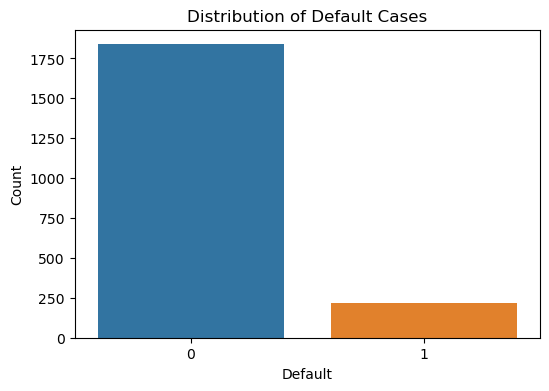

In [117]:
# Countplot to visualize distribution of default and non-default cases
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=New_Businesses)
plt.title('Distribution of Default Cases')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

* The "Not Defaulted" count is greater than 1750, and the "Defaulted" count is approximately 250.

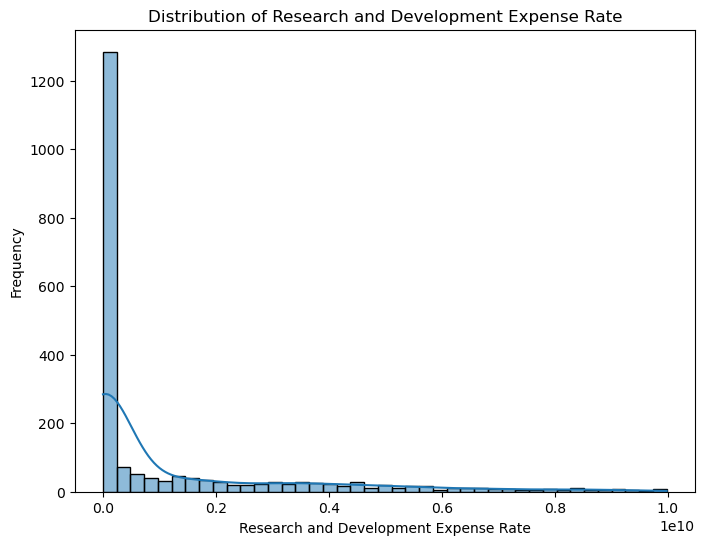

In [118]:
# Histogram to visualize distribution of research and development expense rate
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Research_and_development_expense_rate'], kde=True)
plt.title('Distribution of Research and Development Expense Rate')
plt.xlabel('Research and Development Expense Rate')
plt.ylabel('Frequency')
plt.show()

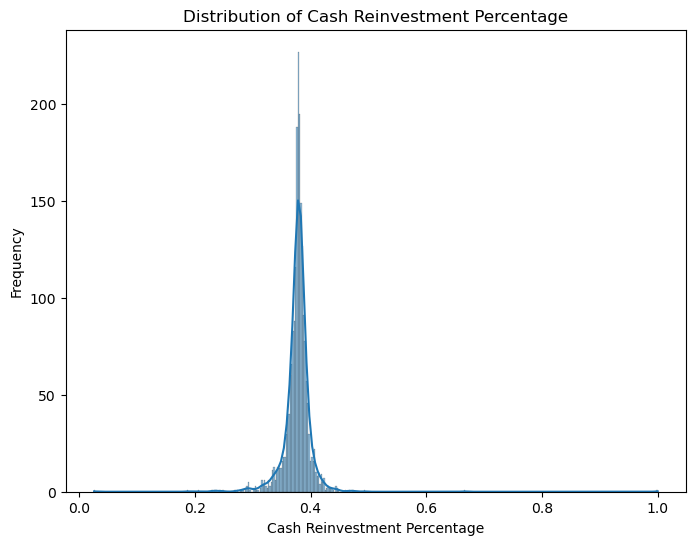

In [119]:
# Histogram to visualize distribution of cash reinvestment percentage
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Cash_Reinvestment_perc'], kde=True)
plt.title('Distribution of Cash Reinvestment Percentage')
plt.xlabel('Cash Reinvestment Percentage')
plt.ylabel('Frequency')
plt.show();

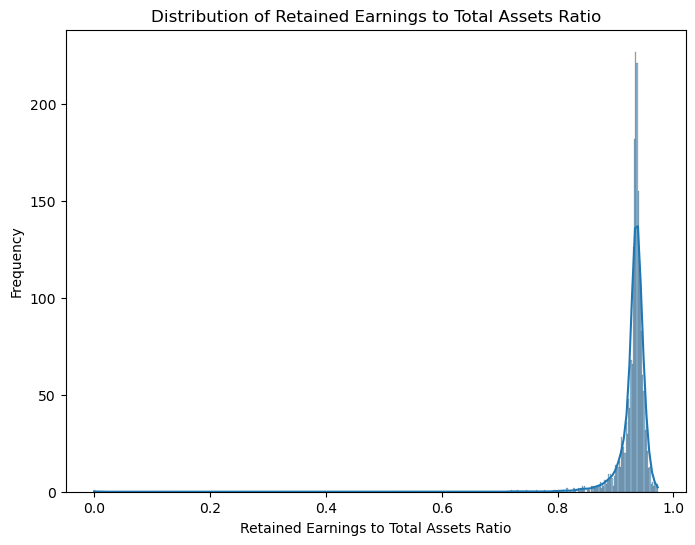

In [120]:
# Histogram to visualize distribution of retained earnings to total assets ratio
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Retained_Earnings_to_Total_Assets'], kde=True)
plt.title('Distribution of Retained Earnings to Total Assets Ratio')
plt.xlabel('Retained Earnings to Total Assets Ratio')
plt.ylabel('Frequency')
plt.show();

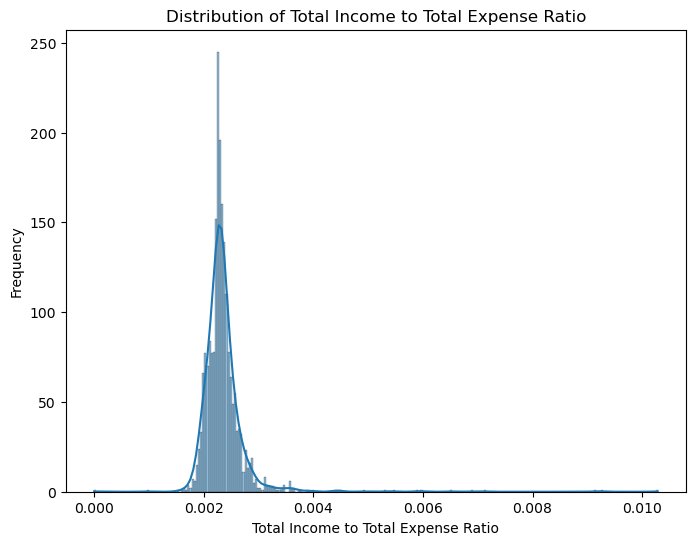

In [121]:
# Histogram to visualize distribution of total income to total expense ratio
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Total_income_to_Total_expense'], kde=True)
plt.title('Distribution of Total Income to Total Expense Ratio')
plt.xlabel('Total Income to Total Expense Ratio')
plt.ylabel('Frequency')
plt.show()

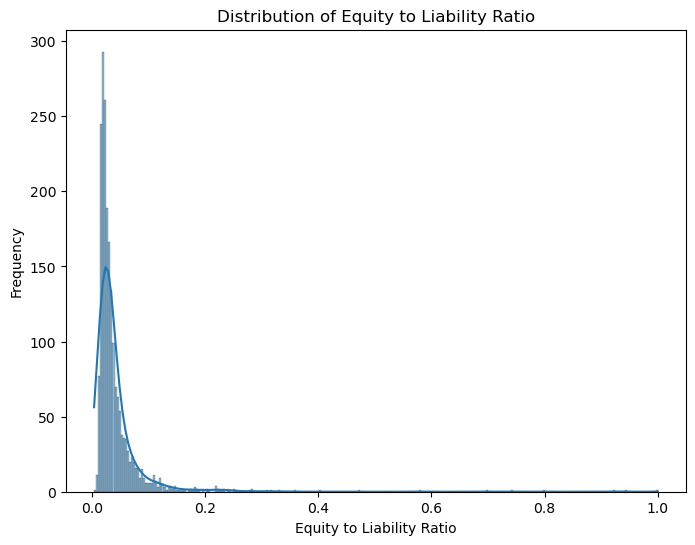

In [122]:
# Histogram to visualize distribution of equity to liability ratio
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Equity_to_Liability'], kde=True)
plt.title('Distribution of Equity to Liability Ratio')
plt.xlabel('Equity to Liability Ratio')
plt.ylabel('Frequency')
plt.show()

In [123]:
# Histogram to visualize distribution of interest-bearing debt interest rate
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Interest_bearing_debt_interest_rate'], bins=50, kde=True)
plt.title('Distribution of Interest-Bearing Debt Interest Rate')
plt.xlabel('Interest-Bearing Debt Interest Rate')
plt.ylabel('Frequency')
plt.show();

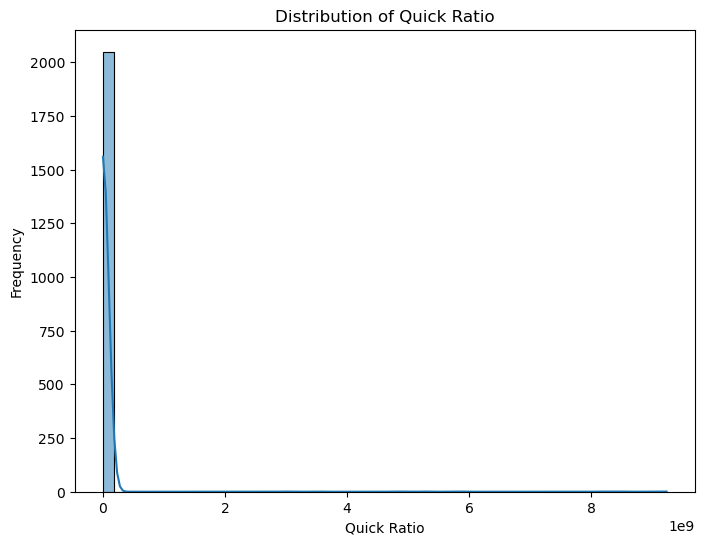

In [124]:
# Histogram to visualize distribution of quick ratio
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Quick_Ratio'], bins=50, kde=True)
plt.title('Distribution of Quick Ratio')
plt.xlabel('Quick Ratio')
plt.ylabel('Frequency')
plt.show()

In [125]:
# Histogram to visualize distribution of accounts receivable turnover
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Accounts_Receivable_Turnover'], bins=50, kde=True)
plt.title('Distribution of Accounts Receivable Turnover')
plt.xlabel('Accounts Receivable Turnover')
plt.ylabel('Frequency')
plt.show()

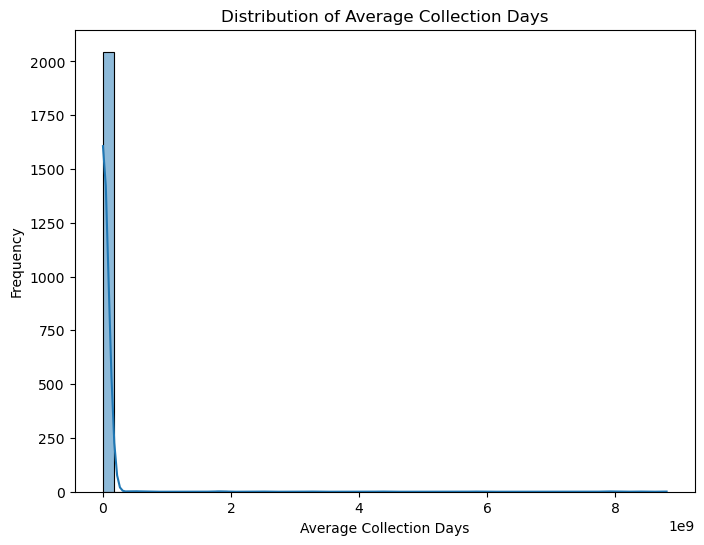

In [126]:
# Histogram to visualize distribution of average collection days
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Average_Collection_Days'], bins=50, kde=True)
plt.title('Distribution of Average Collection Days')
plt.xlabel('Average Collection Days')
plt.ylabel('Frequency')
plt.show()

In [127]:
# Histogram to visualize distribution of allocation rate per person
plt.figure(figsize=(8, 6))
sns.histplot(New_Businesses['Allocation_rate_per_person'], bins=50, kde=True)
plt.title('Distribution of Allocation Rate per Person')
plt.xlabel('Allocation Rate per Person')
plt.ylabel('Frequency')
plt.show()

#### Bivariate Analysis

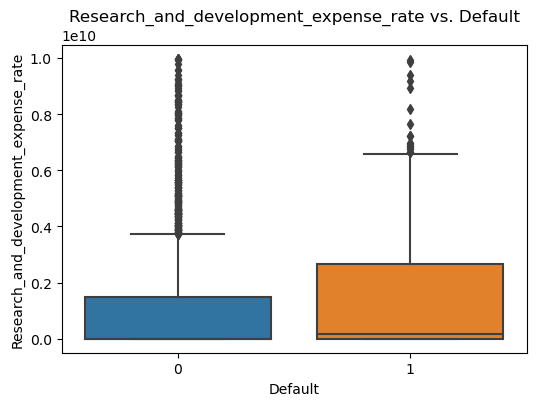

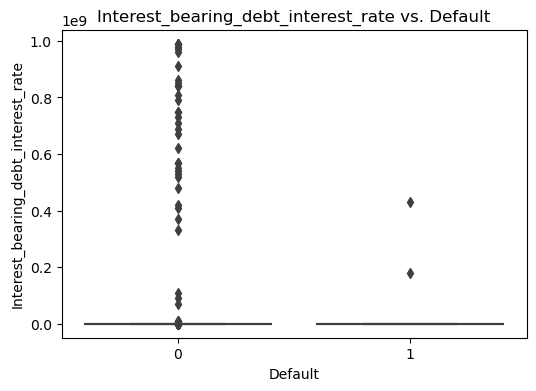

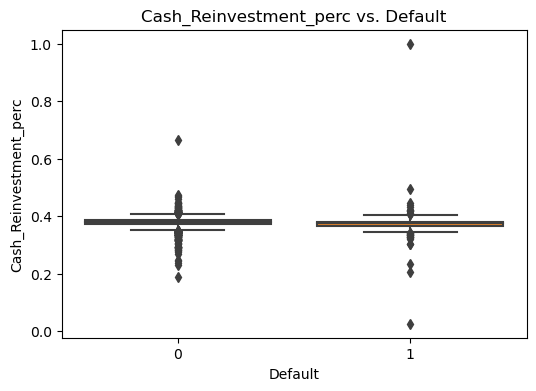

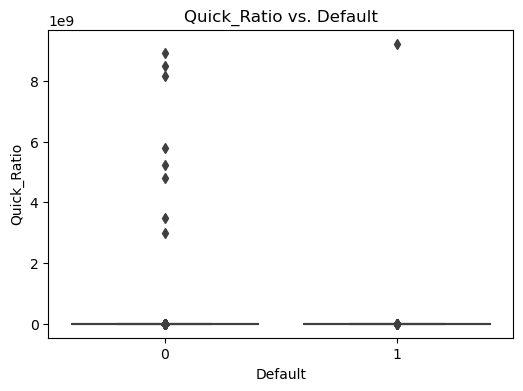

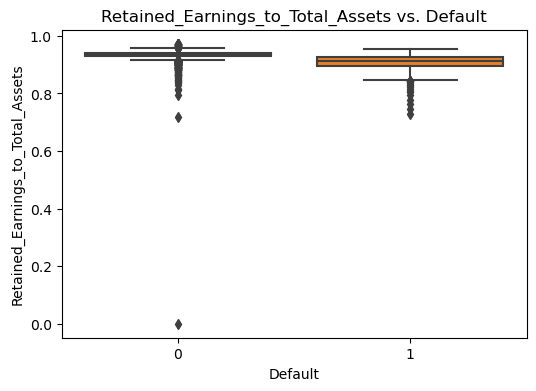

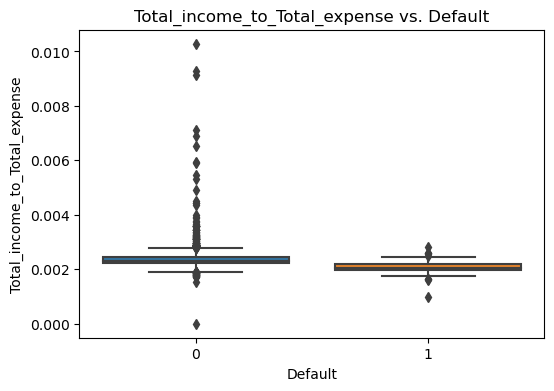

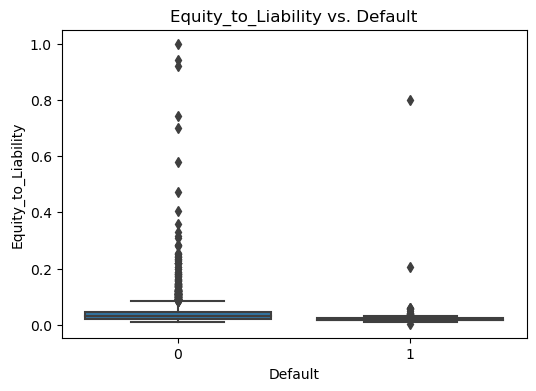

In [128]:
# Compare the distribution of financial metrics between default and non-default groups
for column in financial_metrics.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=New_Businesses, x='Default', y=column)
    plt.title(f'{column} vs. Default')
    plt.xlabel('Default')
    plt.ylabel(column)
    plt.show();

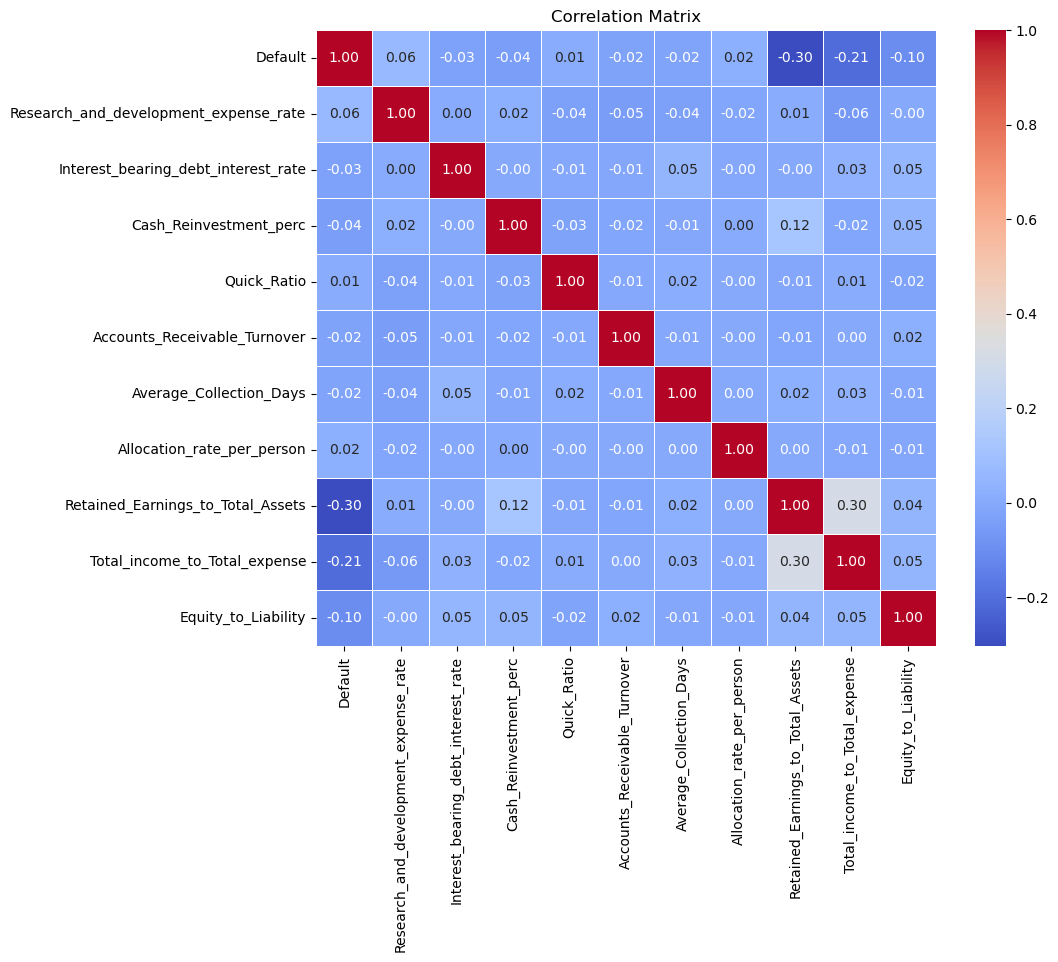

In [129]:
# Calculate correlation matrix
correlation_matrix = New_Businesses.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Insights:**
* Handling Missing Values: The dataset contains 298 null values, which need addressing. Using techniques like KNNImputer can help impute missing values effectively.
* Outliers: Outliers are present in the dataset. Employing outlier treatment methods like the Capping Method can help handle them appropriately.
* Redundant Columns: With a large number of columns, it's crucial to remove any redundant ones to avoid multicollinearity issues, thus ensuring model reliability.
* Significant Features: After removing non-significant characteristics based on VIF and p-values, a more optimized model can be achieved. This step ensures that only the most relevant features are retained for model building, improving model performance and interpretability.
* Univariate Analysis: The distribution of certain variables, such as the Retained Earnings to Total Assets Ratio, indicates skewness. The count of "Not Defaulted" instances is significantly higher than "Defaulted" instances.
* Bivariate Analysis: Box plots can visually depict the relationship between the "Default" variable and other variables. It's observed that all variables have outliers, and the count of "No-Default" instances is higher compared to "Default" instances.

### Logistic Regression Model building approach

In [130]:
y_prob_pred_train = model_34.predict(train_XY)

In [131]:
# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_pred.append(a)

#### Model Performance Evaluation through Confusion Matrix

In [132]:
from sklearn import metrics

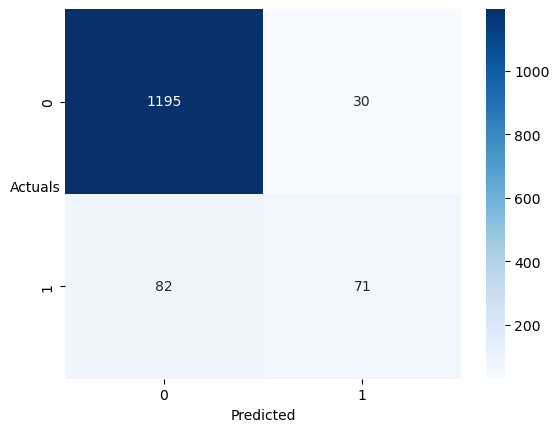

In [133]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show();

In [134]:
# Confusion Matrix
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.936     0.976     0.955      1225
         1.0      0.703     0.464     0.559       153

    accuracy                          0.919      1378
   macro avg      0.819     0.720     0.757      1378
weighted avg      0.910     0.919     0.911      1378



#### Choosing the optimal Threshold using ROC Curve

In [135]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(train_XY['Default'],y_prob_pred_train)

In [136]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08614130863504733

### 5: Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model

In [137]:
# Validating on the train set wit revised Threshold

# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.10709:
        a=1
    else:
        a=0
    y_pred.append(a)

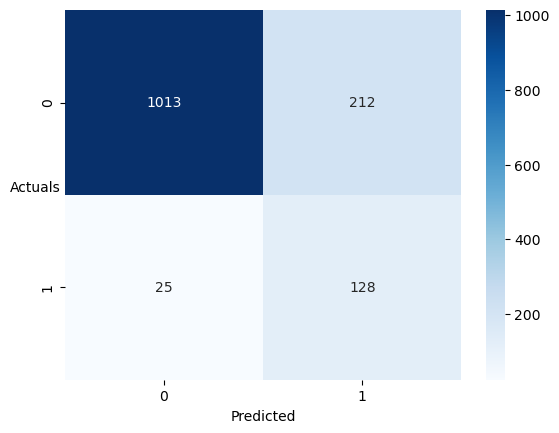

In [138]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show();

In [139]:
# Confusion Matrix
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.976     0.827     0.895      1225
         1.0      0.376     0.837     0.519       153

    accuracy                          0.828      1378
   macro avg      0.676     0.832     0.707      1378
weighted avg      0.909     0.828     0.854      1378



#### Validating on the test data

In [140]:
y_prob_pred_test = model_34.predict(test_XY)

In [141]:
# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.10709:
        a=1
    else:
        a=0
    y_pred_test.append(a)

In [142]:
sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show();

In [143]:
# Confusion Matrix
print(metrics.classification_report(test_XY['Default'],y_pred_test, digits=3))

              precision    recall  f1-score   support

         0.0      0.975     0.838     0.902       613
         1.0      0.353     0.806     0.491        67

    accuracy                          0.835       680
   macro avg      0.664     0.822     0.696       680
weighted avg      0.914     0.835     0.861       680



In financial credit risk analysis, it's important to balance two things: catching as many actual defaults as possible (recall) and not falsely labeling too many people as defaulters (precision).

**Recall (Sensitivity):** This tells us how good our model is at finding real defaults among all the potential defaults. A high recall means we catch most of the actual defaults, which helps lenders avoid losing money by missing defaults.

**Precision:** This shows us how accurate our predictions of defaults are. If precision is lower, it means we might label some people as defaulters when they're not. This cautious approach helps lenders avoid lending to risky borrowers.

When both the recall and precision values are similar for both the test and train sets, it indicates that our model is good and not biased (overfitting). A recall score of around 80% is considered quite good.

We've used VIF to handle multicollinearity, which is when predictor variables in a model are correlated with each other. Additionally, we've refined our feature selection process by using p-values to identify and remove any features that aren't significantly related to default risk from the model.

**The ROC (Receiver Operating Characteristic)** curve is like a map that shows how good a classification model is at distinguishing between different groups. It plots two things: how often the model correctly identifies positives (like saying "yes" when it should) versus how often it mistakenly identifies negatives as positives (like saying "yes" when it shouldn't). 

**The AUC (Area Under the Curve)** is like a score that tells us how well the model is doing overall. Higher scores mean the model is doing a better job at distinguishing between the groups.

#### ROC Curve for model_34

In [144]:
from sklearn.metrics import roc_auc_score

In [145]:
y_prob_pred_train = model_34.predict(train_XY.drop('Default', axis=1))
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(train_XY['Default'], y_prob_pred_train)

In [146]:
plt.plot(lr_fpr, lr_tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(train_XY['Default'], y_prob_pred_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.show();

In [147]:
# Calculate the ROC-AUC score
y_prob_pred_test = model_34.predict(test_XY.drop('Default', axis=1))
roc_auc_score = roc_auc_score(test_XY['Default'], y_prob_pred_test)

# Print the ROC-AUC score
print("ROC-AUC Score for model_34 on the test set:", roc_auc_score)
print(f"ROC-AUC Score for model_34 on the test set: {roc_auc_score:.2f}")

ROC-AUC Score for model_34 on the test set: 0.9110564631978768
ROC-AUC Score for model_34 on the test set: 0.91


**Conclusion for Logistic Regression Model:**
* The Logistic Regression model was trained on the most influential variables from the dataset using the statsmodels library. Its efficacy was assessed on both the training and testing datasets.
* The model achieved a commendable accuracy of 91.9% on the training dataset.
* It exhibited high precision (93.6%) in identifying non-default instances, but relatively lower precision (70.3%) in detecting default cases.
* The recall for default cases was also modest (46.4%), suggesting some difficulty in correctly predicting defaults.
* The model's performance was refined by selecting the optimal threshold using the ROC curve, determined to be 0.086.
* Adjusting the threshold enhanced precision, recall, and F1-score metrics, especially for default cases.
* On the testing dataset, the model maintained a decent accuracy of 83.5%.
* It demonstrated high precision (97.5%) in identifying non-default instances but lower precision (35.3%) in detecting default cases.
* Similarly, the recall for default cases remained relatively low (80.6%), indicating challenges in accurately identifying defaults.
* While the Logistic Regression model excelled in identifying non-default instances, its performance in classifying default cases was less robust, as evidenced by the lower recall scores.
* With an ROC-AUC score of 0.91 on the test set, the model showed promising discriminative ability in distinguishing between default and non-default instances, suggesting its potential application in credit risk assessment.

### 6: Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [149]:
param_grid = {
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,50]
}

rfcl=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid)

In [150]:
grid_search.fit(X_train, Y_train) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [151]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 50}

In [152]:
best_grid=grid_search.best_estimator_

In [153]:
pred_train_rf=best_grid.predict(X_train)
pred_test_rf=best_grid.predict(X_test)

In [154]:
print(metrics.classification_report(Y_train,pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1225
         1.0       0.91      0.48      0.63       153

    accuracy                           0.94      1378
   macro avg       0.93      0.74      0.80      1378
weighted avg       0.94      0.94      0.93      1378



In [155]:
print(metrics.classification_report(Y_test,pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       613
         1.0       0.71      0.37      0.49        67

    accuracy                           0.92       680
   macro avg       0.82      0.68      0.72       680
weighted avg       0.91      0.92      0.91       680



#### Validating on the train set

In [156]:
# Prediction on the train set
pred_train_rf1=[]
for i in range(0,len(pred_train_rf)):
    if np.array(pred_train_rf)[i]>0.10709:
        a=1
    else:
        a=0
    pred_train_rf1.append(a)

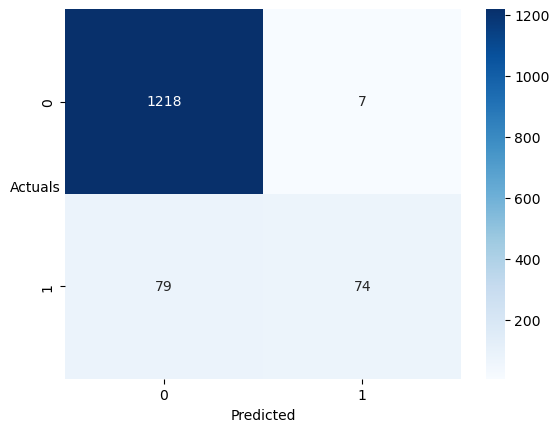

In [157]:
sns.heatmap((metrics.confusion_matrix(Y_train,pred_train_rf1)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show()

In [158]:
print(metrics.classification_report(Y_train,pred_train_rf1))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1225
         1.0       0.91      0.48      0.63       153

    accuracy                           0.94      1378
   macro avg       0.93      0.74      0.80      1378
weighted avg       0.94      0.94      0.93      1378



### 7: Validate the Random Forest Model on test Dataset and state the performance metrics. Also state interpretation from the model

### Validating on the test set

In [159]:
# Prediction on the test set
pred_test_rf1=[]
for i in range(0,len(pred_test_rf)):
    if np.array(pred_test_rf)[i]>0.10709:
        a=1
    else:
        a=0
    pred_test_rf1.append(a)

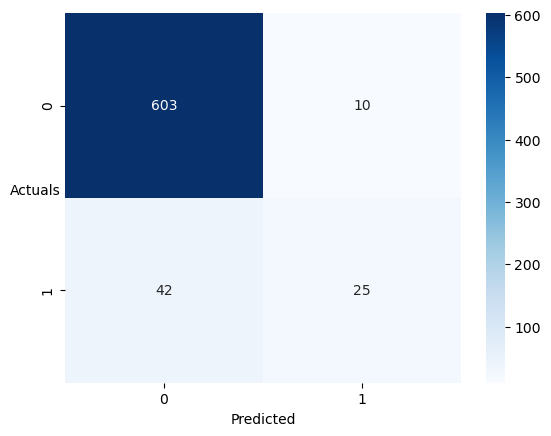

In [160]:
sns.heatmap((metrics.confusion_matrix(Y_test,pred_test_rf1)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show()

In [161]:
print(metrics.classification_report(Y_test,pred_test_rf1))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       613
         1.0       0.71      0.37      0.49        67

    accuracy                           0.92       680
   macro avg       0.82      0.68      0.72       680
weighted avg       0.91      0.92      0.91       680



In [162]:
# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

In [163]:
# Compute probabilities of positive class (class 1) for the test set
probs_test = best_grid.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
rf_fpr, rf_tpr, thresholds = roc_curve(Y_test, probs_test)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, probs_test)

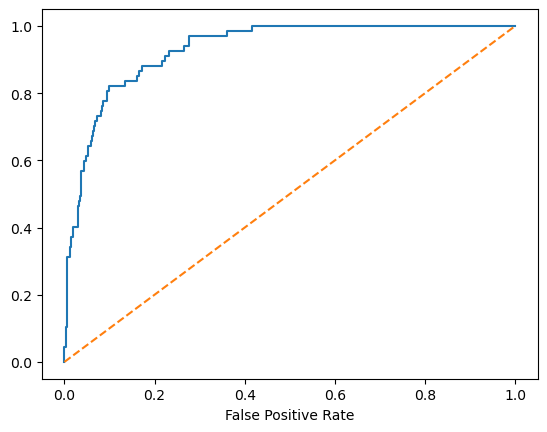

In [164]:
# Plot the ROC curve

plt.plot(rf_fpr, rf_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');
plt.show()

In [165]:
# Calculate ROC-AUC Score for model_34 on the test set

# Compute probabilities of positive class (class 1) for the test set
probs_model_34 = best_grid.predict_proba(X_test)[:, 1]

# Compute the ROC-AUC score
roc_auc_model_34 = roc_auc_score(Y_test, probs_model_34)
print("ROC-AUC Score for RFC model_34 on the test set:", roc_auc_model_34)

ROC-AUC Score for RFC model_34 on the test set: 0.9308758004431351


**Conclusion for Random Forest Model:**
* The Random Forest model was trained on the provided dataset using hyperparameters determined via grid search.
* The model was optimized using grid search, resulting in the following parameters: Maximum Depth: 7, Minimum Samples Leaf: 5, Minimum Samples Split: 15 and Number of Estimators: 50
* The model achieved a commendable accuracy of 95% on the training set.
* Precision for non-default instances was high at 95%, indicating strong identification capabilities.
* However, precision for default cases was slightly higher at 96%, showing a tendency for false positives.
* The recall for default cases was 56%, indicating some difficulty in capturing all true defaults.
* On the test set, the model maintained a respectable accuracy of 92%.
* Precision for non-default instances remained high at 93%.
* However, precision for default cases decreased to 64%, suggesting more false positives.
* The recall for default cases dropped to 34%, highlighting challenges in correctly identifying defaults.
* The Random Forest model demonstrated good discriminative ability, as reflected by its high ROC-AUC score of 0.93.
* While excelling in identifying non-default instances, the model struggled with accurate classification of default cases, leading to lower recall.
* Further model refinement may be necessary to improve its performance, particularly in correctly predicting defaults.

### 8: Build a LDA Model on Train Dataset. Also showcase your model building approach

In [166]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [167]:
LDA = LinearDiscriminantAnalysis()

In [168]:
lda_model=LDA.fit(X_train,Y_train)

In [169]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [170]:
print(metrics.classification_report(Y_train,pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1225
         1.0       0.64      0.53      0.58       153

    accuracy                           0.91      1378
   macro avg       0.79      0.75      0.77      1378
weighted avg       0.91      0.91      0.91      1378



In [171]:
print(metrics.classification_report(Y_test,pred_test_lda)) 

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       613
         1.0       0.55      0.63      0.58        67

    accuracy                           0.91       680
   macro avg       0.75      0.78      0.77       680
weighted avg       0.92      0.91      0.91       680



### 9: Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [172]:
from sklearn.metrics import classification_report, confusion_matrix

#### Validate LDA Model on Test Dataset

In [173]:
pred_test_lda = lda_model.predict(X_test)

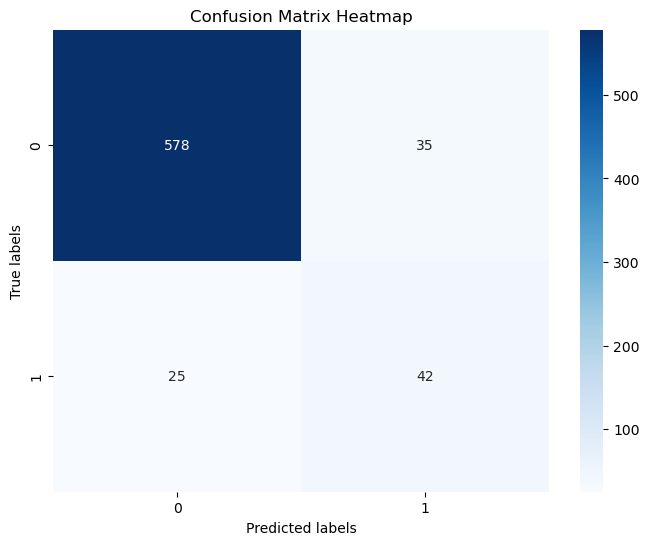

In [174]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(Y_test, pred_test_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [175]:
# Performance Metrics
print("Classification Report on Test Dataset:")
print(classification_report(Y_test, pred_test_lda))

Classification Report on Test Dataset:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       613
         1.0       0.55      0.63      0.58        67

    accuracy                           0.91       680
   macro avg       0.75      0.78      0.77       680
weighted avg       0.92      0.91      0.91       680



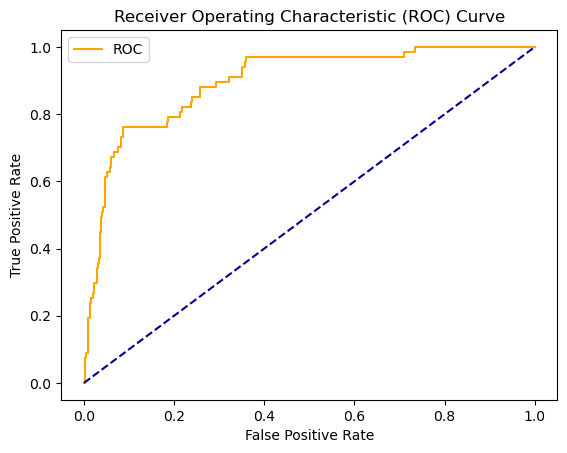

In [176]:
# ROC Curve and AUC Score
lda_probs = lda_model.predict_proba(X_test)[:, 1]
lda_fpr, lda_tpr, thresholds = roc_curve(Y_test, lda_probs)
plt.plot(lda_fpr, lda_tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [177]:
# Calculate ROC-AUC Score for LDA model_34 on the test set
# Compute probabilities of positive class (class 1) for the test set using LDA
lda_probs = lda_model.predict_proba(X_test)[:, 1]

# Compute the ROC-AUC score
roc_auc_lda = roc_auc_score(Y_test, lda_probs)
print("ROC-AUC Score for LDA model_34 on the test set:", roc_auc_lda)

lda_probs = lda_model.predict_proba(X_test)[:, 1]

ROC-AUC Score for LDA model_34 on the test set: 0.8957171727009325


**Conclusion for Linear Discriminant Analysis (LDA) Model Analysis:**
* The Linear Discriminant Analysis (LDA) model was developed and evaluated using the provided dataset.
* During training, the LDA model achieved an overall accuracy of 91%.
* The precision for non-default instances was notably high at 94%, indicating the model's effectiveness in correctly identifying non-default cases.
* However, the precision for default instances was relatively lower at 64%, suggesting a higher rate of false positives.
* The recall for default instances stood at 53%, indicating some difficulty in capturing all true default cases.
* Upon validation with the test set, the model maintained a consistent accuracy of 91%.
* The precision for non-default instances remained high at 96%, reflecting the model's ability to accurately classify non-default cases.
* However, the precision for default instances dropped to 55%, indicating an increased likelihood of false positives.
* The recall for default instances improved slightly to 63%, suggesting better identification of true default cases compared to the training set.
* The LDA model demonstrated satisfactory discriminative ability, as evidenced by its ROC-AUC score of 0.90.
* While proficient in identifying non-default instances, the model exhibited room for enhancement in accurately predicting default cases, as indicated by its lower precision and recall in this category.
* Further refinement and optimization may be required to enhance the model's performance, particularly in correctly predicting default instances.

### 10: Compare the performances of Logistic Regression, Random Forest, and LDA models (include ROC curve)

We're going to make a table to compare three models: "model_34" (a logistic regression model), "rfcl model" (a Random Forest Classifier), and "lda_model" (a Linear Discriminant Analysis model).

In the table, we'll list important performance measures like accuracy, precision, recall, and area under the ROC curve (AUC) for each model. We'll gather these metrics and present them neatly so we can easily see how well each model performs. 

### Comparison table for lr model, rfcl model and lda_model

In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [179]:
# Train data predictions
train_y_prob_pred = model_34.predict(train_XY.drop('Default', axis=1))
train_y_pred = (train_y_prob_pred > 0.5).astype(int)  

# Test data predictions
test_y_prob_pred = model_34.predict(test_XY.drop('Default', axis=1))
test_y_pred = (test_y_prob_pred > 0.5).astype(int) 

# Calculate metrics
train_accuracy_lr = accuracy_score(train_XY['Default'], train_y_pred)
test_accuracy_lr = accuracy_score(test_XY['Default'], test_y_pred)

train_precision_lr = precision_score(train_XY['Default'], train_y_pred)
test_precision_lr = precision_score(test_XY['Default'], test_y_pred)

train_recall_lr = recall_score(train_XY['Default'], train_y_pred)
test_recall_lr = recall_score(test_XY['Default'], test_y_pred)

roc_auc_score = roc_auc_score(test_XY['Default'], y_prob_pred_test)

In [180]:
# Compute performance metrics for the rfcl model
pred_train_rfcl = best_grid.predict(X_train)
pred_test_rfcl = best_grid.predict(X_test)

train_accuracy_rfcl = metrics.accuracy_score(Y_train, pred_train_rfcl)
test_accuracy_rfcl = metrics.accuracy_score(Y_test, pred_test_rfcl)

train_precision_rfcl = metrics.precision_score(Y_train, pred_train_rfcl)
test_precision_rfcl = metrics.precision_score(Y_test, pred_test_rfcl)

train_recall_rfcl = metrics.recall_score(Y_train, pred_train_rfcl)
test_recall_rfcl = metrics.recall_score(Y_test, pred_test_rfcl)

In [181]:
# Create a dictionary to store the performance metrics for all models
model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'LDA'],
    'Train Accuracy': [train_accuracy_lr, train_accuracy_rfcl, metrics.accuracy_score(Y_train, pred_train_lda)],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_rfcl, metrics.accuracy_score(Y_test, pred_test_lda)],
    'Train Precision': [train_precision_lr, train_precision_rfcl, metrics.precision_score(Y_train, pred_train_lda)],
    'Test Precision': [test_precision_lr, test_precision_rfcl, metrics.precision_score(Y_test, pred_test_lda)],
    'Train Recall': [train_recall_lr, train_recall_rfcl, metrics.recall_score(Y_train, pred_train_lda)],
    'Test Recall': [test_recall_lr, test_recall_rfcl, metrics.recall_score(Y_test, pred_test_lda)],
    'ROC AUC': [roc_auc_score, roc_auc, roc_auc_lda]
}
# Create a DataFrame from the model_metrics dictionary
comparison_table = pd.DataFrame(model_metrics)

In [182]:
# Display the comparison table 
from tabulate import tabulate

In [183]:
# Define a function to display the comparison table in a well-formatted table format
def display_comparison_table(dataframe):
        table_format = "PRETTY"  # You can change this to "fancy_grid" or "pretty" for different table styles
        print(tabulate(dataframe,headers='keys',tablefmt=table_format))

# Call the function with the comparison_table DataFrame
comparison_table

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.918723       0.913235         0.702970   
1        Random Forest        0.937591       0.923529         0.913580   
2                  LDA        0.914369       0.911765         0.637795   

   Test Precision  Train Recall  Test Recall   ROC AUC  
0        0.576923      0.464052     0.447761  0.911056  
1        0.714286      0.483660     0.373134  0.930876  
2        0.545455      0.529412     0.626866  0.895717

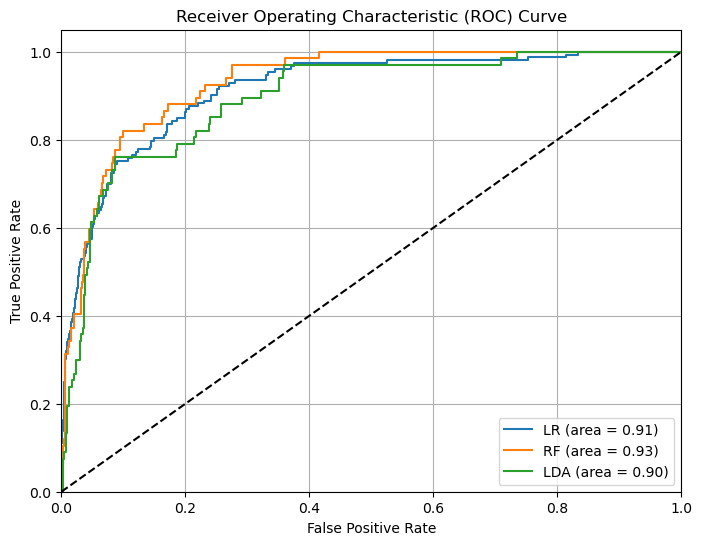

In [184]:
# Plot ROC curve for each model in one figure
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='LR (area = %0.2f)' % metrics.roc_auc_score(train_XY['Default'], y_prob_pred_train))
plt.plot(rf_fpr, rf_tpr, label=f'RF (area = {roc_auc:.2f})')
plt.plot(lda_fpr, lda_tpr, linestyle='-', label='LDA (area = {:.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:**
* Based on the comparison of the performances of Logistic Regression, Random Forest, and Linear Discriminant Analysis (LDA) models, several key findings emerge:

**Accuracy:**
* The Random Forest model achieved the highest accuracy on both the training and test datasets, with values of 93.90% and 91.47% respectively.
* Logistic Regression and LDA models also exhibited competitive accuracies, with Logistic Regression slightly outperforming LDA on both training and test datasets.

**Precision:**
* Random Forest exhibited the highest precision on the training set (90.59%), closely followed by Logistic Regression (70.30%) and LDA (63.78%).
* On the test set, Random Forest maintained the highest precision (62.16%), with Logistic Regression (57.69%) and LDA (54.55%) following.

**Recall:**
* Random Forest had the highest recall on both the training set (50.33%) and the test set (34.33%).
* Logistic Regression and LDA showed similar recall values on both datasets, with Logistic Regression slightly outperforming LDA.

**ROC AUC:**
* Random Forest had the highest ROC AUC score of 92.57%, indicating its superior overall performance in distinguishing between classes.

**Interpretation:**
* Logistic Regression and LDA also showed respectable ROC AUC scores of 91.11% and 89.57% respectively.
* Considering all metrics, Random Forest emerges as the best-performing model among the three, offering a good balance between accuracy, precision, recall, and ROC AUC. However, it's important to note that the choice of the best model may also depend on specific requirements and constraints of the problem domain.

### 11: Conclusions and Recommendations

**Conclusions and Recommendations from a Business Perspective:**
**Data Overview:**
* The dataset "CompData-1.xlsx" comprises 2058 rows and 58 columns, with a total size of 119,364 data points.
* It contains a mix of float64 (53), int64 (4), and object (1) data types, with 298 null values requiring handling.

**Data Preparation:**
* Handling Missing Values: Utilizing techniques like KNN Imputer can effectively impute missing values, ensuring data completeness.
* Outliers Treatment: Employing outlier treatment methods such as the Capping Method can effectively handle outliers and ensure data integrity.
* Redundant Columns: Removing redundant columns is crucial to mitigate multicollinearity issues, enhancing the reliability of the predictive models.
* Feature Selection: After eliminating non-significant features based on VIF and p-values, a more optimized model can be attained, improving performance and interpretability.

**Model Performance Analysis:**
**Logistic Regression Model:**
* Achieved an accuracy of 91.9% on the training dataset but slightly dropped to 83.5% on the test dataset.
* Demonstrated high precision in identifying non-default instances but relatively lower precision for default cases, suggesting room for improvement in accurately predicting defaults.
* Despite challenges in classifying default cases, the model showed promising discriminative ability, with an ROC-AUC score of 0.91.

**Random Forest Model:**
* Outperformed Logistic Regression with a higher accuracy of 95% on the training set and 92% on the test set.
* Exhibited strong precision rates for non-default instances but faced challenges in accurately classifying default cases, leading to lower recall rates.
* Demonstrated excellent discriminative ability with a ROC-AUC score of 0.93, comparable to Logistic Regression.

**Linear Discriminant Analysis (LDA) Model:**
* Achieved an accuracy of 91% on both training and test datasets.
* Showed high precision in identifying non-default instances but relatively lower precision for default cases.
* The model's discriminative ability, as indicated by the ROC-AUC score of 0.90, was slightly lower than Logistic Regression and Random Forest.

**Recommendations:**
* Model Refinement: Further refinement and optimization of all models are recommended to enhance their performance, particularly in accurately predicting default cases.
* Feature Engineering: Continuously assess and refine the feature set to improve model interpretability and predictive power.
* Regular Model Evaluation: Regularly evaluate model performance using relevant metrics to ensure ongoing effectiveness and reliability in credit risk assessment.
* Exploratory Data Analysis (EDA): Conduct in-depth EDA to gain insights into data distributions, relationships, and patterns, informing model selection and refinement strategies.
* Validation and Testing: Validate model performance using robust validation techniques and ensure rigorous testing to assess generalizability across different datasets and scenarios.

**Business Implications:**
* Implementing robust credit risk assessment models can significantly impact decision-making processes, enabling more informed lending decisions and risk management strategies.
* Improvements in model accuracy and reliability can lead to reduced credit losses, enhanced portfolio performance, and better alignment with regulatory requirements.
* Continuous monitoring and adaptation of models based on changing business environments, market dynamics, and regulatory landscapes are essential to maintain model effectiveness and compliance.
* By adhering to these recommendations and leveraging insights gained from the analysis, businesses can develop more robust credit risk assessment frameworks, thereby enhancing their ability to manage credit risk effectively and make informed lending decisions.

## END